# Model Development - Model for volatility Prediction


## What is Volatility?

**Volatility** is a statistical measure of the dispersion of returns for a given security or market index. In simpler terms, it indicates how much the price of an asset fluctuates over a specific period. High volatility means that the price can change dramatically in a short time, while low volatility indicates more stable prices.

Volatility is a critical concept in finance for several reasons:
- **Risk Assessment**: It serves as a proxy for the uncertainty and risk associated with an asset
- **Portfolio Management**: Investors use volatility to construct diversified portfolios and manage risk
- **Trading Strategies**: Many trading strategies are built around volatility patterns, including mean reversion and momentum strategies
- **Market Sentiment**: Spikes in volatility often indicate market stress, uncertainty, or significant events

## Types of Volatility

### 1. Historical Volatility (HV) 
Calculated using past price data, historical volatility measures how much the price of an asset has fluctuated over a specific period in the past. We will use dialy historical volatility calculated from log returns as our target variable.

### 2. Implied Volatility (IV)
Derived from option prices, implied volatility reflects the market's expectation of future volatility. It looks forward and represents what the market thinks will happen.

### 3. Realized Volatility (RV)
This is a more precise measure of historical volatility calculated using high-frequency intraday data, such as minute-by-minute or hour-by-hour prices. It provides a more accurate measure of volatility compared to traditional methods that rely on daily closing prices.

## Why Bitcoin Volatility Matters

Bitcoin and cryptocurrencies are known for their exceptionally high volatility compared to traditional assets:
- **Price Discovery**: Bitcoin is still a relatively young asset class undergoing price discovery
- **24/7 Markets**: Unlike traditional markets, crypto markets never close, leading to continuous price movements
- **Regulatory Uncertainty**: News about regulations can cause dramatic price swings

Understanding and predicting Bitcoin volatility is crucial for:
- **Risk Management**: Setting appropriate position sizes and stop-losses
- **Option Trading**: Pricing crypto derivatives accurately
- **Portfolio Allocation**: Determining how much capital to allocate to crypto assets
- **Market Timing**: Identifying periods of high/low volatility for entry and exit points

## Measuring Volatility: Historical Volatility (HV)

One of the most common and robust volatility measures is **Historical Volatility (HV)**, which is calculated using historical price data to estimate the actual volatility experienced by an asset.

### The Formula for Historical Volatility (HV)

$$ HV = 100 \cdot \sqrt{\frac{252}{N} \sum_{i=1}^{N} R_i^2} $$

Where:
- $HV$ = Historical Volatility (annualized percentage)
- $N$ = Number of trading days in the period (typically 252 for a year, 21 for a month)
- $R_i$ = Continuously compounded daily returns (log returns)
- The factor of 252 annualizes the volatility (assuming 252 trading days per year)
- The factor of 100 converts the result to a percentage

However, since we are working with crypto data that trades 24/7, we may adjust the annualization factor based on the number of days in a year (365).
In that case, the formula becomes:

$$ HV = 100 \cdot \sqrt{\frac{365}{N} \sum_{i=1}^{N} R_i^2} $$

And $N$ for a month would be 30 days instead of 21 trading days.

### Computing Log Returns

The continuously compounded daily returns $R_i$ are calculated as:

$$ R_i = \ln\left(\frac{P_i}{P_{i-1}}\right) $$

Where:
- $P_i$ = Price of the asset on day $i$
- $P_{i-1}$ = Price of the asset on day $i-1$
- $\ln$ = Natural logarithm

**Why use log returns instead of simple returns?**
1. **Time-additivity**: Log returns can be summed across time periods
2. **Symmetry**: Equal magnitude gains and losses have equal absolute log returns
3. **Statistical properties**: Log returns are more likely to be normally distributed
4. **Continuous compounding**: Better represents continuous price changes

### Interpretation of Historical Volatility

- **HV = 20%**: Low volatility - the asset's price is relatively stable
- **HV = 50%**: Moderate volatility - typical for stocks during normal market conditions
- **HV = 80%**: High volatility - common for Bitcoin and cryptocurrencies
- **HV > 100%**: Extreme volatility - often seen during market crashes or euphoric rallies

## Alternative Volatility Estimators

While the standard historical volatility formula is widely used, several alternative estimators can provide more efficient or robust estimates:

### Parkinson Volatility Estimator
Uses high and low prices to estimate volatility, which can be more efficient than close-to-close estimators:

$$ \sigma_{\text{Parkinson}} = \sqrt{\frac{1}{4N \ln(2)} \sum_{i=1}^{N} \left(\ln\frac{H_i}{L_i}\right)^2} $$

Where $H_i$ and $L_i$ are the high and low prices on day $i$.

### Garman-Klass Volatility Estimator
Incorporates open, high, low, and close prices for a more comprehensive measure:

$$ \sigma_{\text{GK}}^2 = \frac{1}{N} \sum_{i=1}^{N} \left[\frac{1}{2}\left(\ln\frac{H_i}{L_i}\right)^2 - (2\ln2-1)\left(\ln\frac{C_i}{O_i}\right)^2\right] $$

Where $O_i$, $H_i$, $L_i$, and $C_i$ are the open, high, low, and close prices on day $i$.

### Rogers-Satchell Volatility Estimator
Designed to handle trending markets better than other estimators:

$$ \sigma_{\text{RS}}^2 = \frac{1}{N} \sum_{i=1}^{N} \left[\ln\frac{H_i}{C_i} \cdot \ln\frac{H_i}{O_i} + \ln\frac{L_i}{C_i} \cdot \ln\frac{L_i}{O_i}\right] $$

## Our goal

This project aims to build a comprehensive volatility prediction model for Bitcoin using machine learning techniques. By leveraging historical price data, technical indicators, and engineered features. 

### First Part: Regression Model for Volatility Prediction

- **Objective**: Develop a regression model to predict the next-month (30 days) historical volatility (HV) of Bitcoin based on past price data and technical indicators.
- **Target Variable**: The target variable for our regression model will be the next-month (30 days) historical volatility (HV) of Bitcoin, calculated using the formula mentioned above based on log returns.

### Second Part: Classification Model for Volatility Prediction
If the first model will not be able to predict volatility with sufficient accuracy, we will pivot to a classification approach where we will classify the next-month volatility into discrete categories (e.g., low, medium, high) based on predefined thresholds. This can provide actionable insights even if precise numerical predictions are challenging.

## Import Libraries, Define Constants and Load Data


In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set global plotting style
sns.set_theme(style="whitegrid")

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.ensemble import (
    RandomForestRegressor,
    RandomForestClassifier,
    AdaBoostClassifier,
    BaggingClassifier,
    StackingClassifier,
    VotingClassifier,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance


import xgboost as xgb
import lightgbm as lgb

import shap

from utils.common_utils import (
    time_series_train_val_test_split,
    plot_forecasts,
    calculate_evaluation_metrics,
    plot_top_models,
)

from utils.volatility_prediction_utils import (
    calculate_parkinson_volatility,
    calculate_garman_klass_volatility,
    calculate_roger_satchel_volatility,
    train_model_with_feature_sets,
    compare_feature_sets_results,
    train_neural_network_with_feature_sets,
    calculate_classification_metrics,
    plot_confusion_matrix,
    train_classifier_with_feature_sets,
)

from utils.model_development_classes import VolatilityLSTM, AttentionLSTM, VolatilityGRU

/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Constants

# Base directories
DATA_DIR = Path("../data/")
FILE_NAME = "bitcoin_data_processed.csv"
DATA_PATH = DATA_DIR / FILE_NAME

# Reproducibility
RANDOM_SEED = 2137

# Data split ratios
TRAIN_SIZE = 0.7
VALIDATION_SIZE = 0.15
TEST_SIZE = 0.15

In [3]:
# Load data
df = pd.read_csv(DATA_PATH)

# Ensure 'Date' column is in datetime format and set as index
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

## Prepare data for building model

### 1. Calculate Historical Volatility and Prepare Data for Modeling

#### Create Historical Volatility using log returns

We will calculate the historical volatility using a 7-day rolling window based on the log returns already present in our dataset. The formula used will annualize the volatility based on 365 days, suitable for the 24/7 trading nature of cryptocurrencies. We will also add other volatility estimators as features to help our model better understand volatility patterns.

In [4]:
# Calculate Historical Volatility using log returns
# We already have log returns calculated

window = 30  # 30-day rolling window
df["Volatility"] = df["Log_Return"].rolling(window=window).std() * np.sqrt(
    365
)  # Annualized volatility

# Calculate and add other volatility estimators as features
df["Parkinson_Volatility"] = calculate_parkinson_volatility(df, window)
df["Garman_Klass_Volatility"] = calculate_garman_klass_volatility(df, window)
df["Roger_Satchel_Volatility"] = calculate_roger_satchel_volatility(df, window)

# Drop NaN values resulting from rolling calculation
print(f"Data shape before dropping NaNs: {df.shape}")
df = df.dropna(subset=["Volatility"])
print(f"Data shape after dropping NaNs: {df.shape}")

print(f"Number of missing values: {df.isnull().sum().sum()}")

Data shape before dropping NaNs: (4130, 38)
Data shape after dropping NaNs: (4101, 38)
Number of missing values: 0


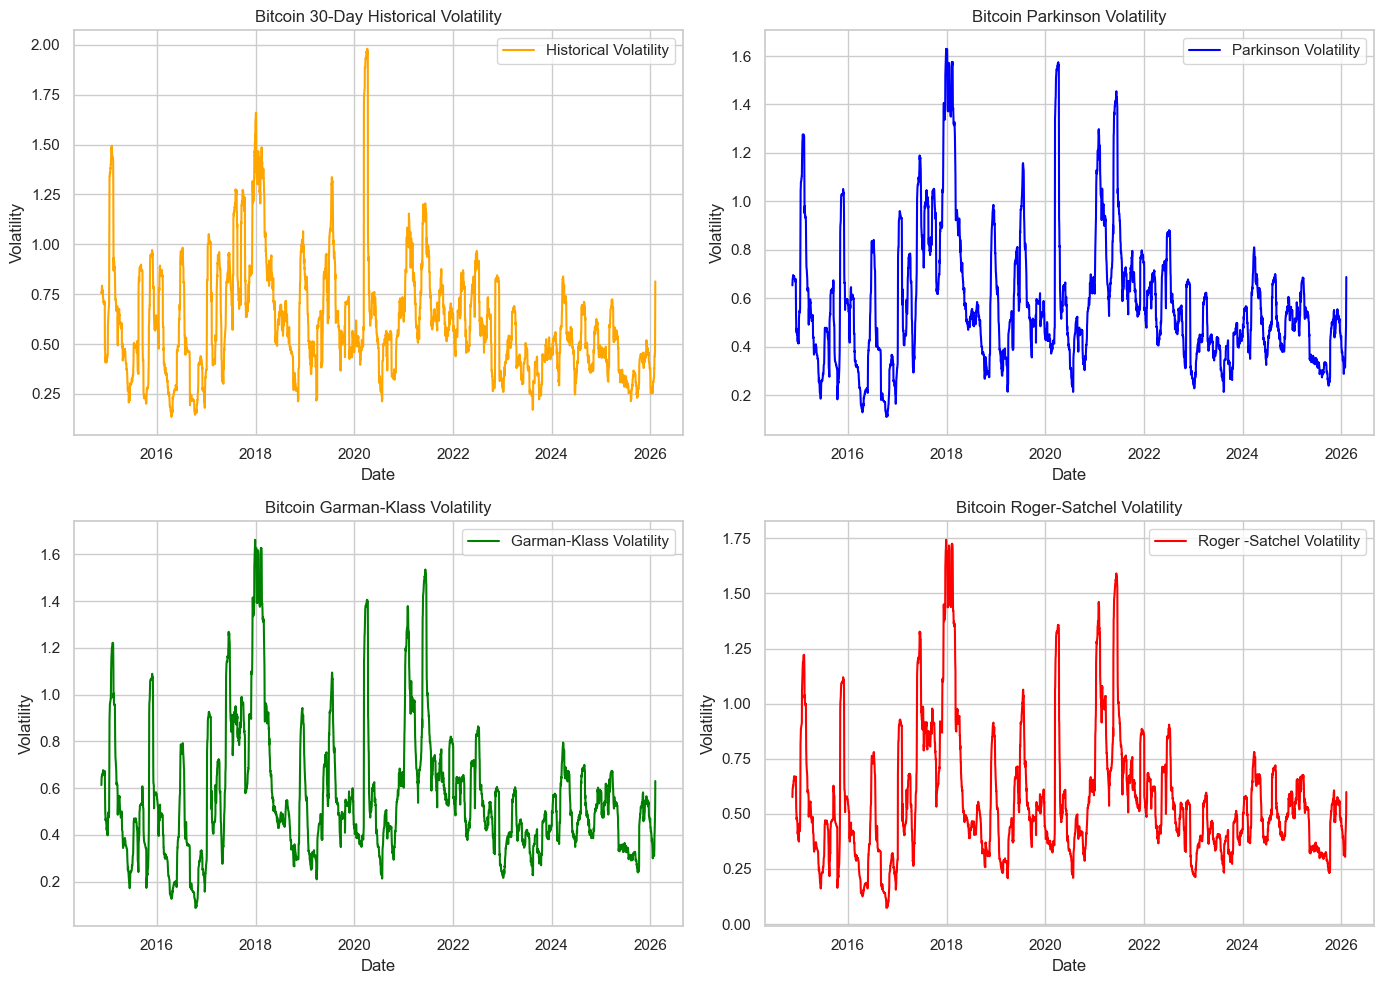

In [5]:
# Plot all volatility estimators in one plot (2x2 grid)

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(df.index, df["Volatility"], label="Historical Volatility", color="orange")
plt.title("Bitcoin 30-Day Historical Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(
    df.index, df["Parkinson_Volatility"], label="Parkinson Volatility", color="blue"
)
plt.title("Bitcoin Parkinson Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()


plt.subplot(2, 2, 3)
plt.plot(
    df.index,
    df["Garman_Klass_Volatility"],
    label="Garman-Klass Volatility",
    color="green",
)
plt.title("Bitcoin Garman-Klass Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(
    df.index,
    df["Roger_Satchel_Volatility"],
    label="Roger -Satchel Volatility",
    color="red",
)
plt.title("Bitcoin Roger-Satchel Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()

plt.tight_layout()
plt.show()

#### Feature Engineering for Volatility Prediction

In our data we already have many useful features calculated such as technical indicators or moving averages. We also added other volatility estimators as features to help our model better understand volatility patterns.

We will add some volatitility specific features such as:
- Lagged volatility values (e.g., 1-day, 7-day, 14-day lags)
- Rolling statistics of volatility (e.g., rolling mean, rolling std dev)
- Changes and momentum of volatility (e.g., volatility returns, volatility momentum)

In [6]:
# Lagged volatility features
df["Volatility_Lag1"] = df["Volatility"].shift(1)
df["Volatility_Lag7"] = df["Volatility"].shift(7)
df["Volatility_Lag14"] = df["Volatility"].shift(14)
df["Volatility_Lag30"] = df["Volatility"].shift(30)

# Moving averages of volatility
df["Volatility_MA_7"] = df["Volatility"].rolling(window=7).mean()
df["Volatility_MA_14"] = df["Volatility"].rolling(window=14).mean()
df["Volatility_MA_30"] = df["Volatility"].rolling(window=30).mean()

# Standard deviation of volatility over different windows
df["Volatility_STD_7"] = df["Volatility"].rolling(window=7).std()
df["Volatility_STD_14"] = df["Volatility"].rolling(window=14).std()
df["Volatility_STD_30"] = df["Volatility"].rolling(window=30).std()

# Volatility changes and momentum
df["Volatility_Change"] = df["Volatility"].pct_change()
df["Volatility_Change_7d"] = df["Volatility"].pct_change(periods=7)
df["Volatility_Change_14d"] = df["Volatility"].pct_change(periods=14)
df["Volatility_Change_30d"] = df["Volatility"].pct_change(periods=30)
df["Volatility_Momentum"] = df["Volatility"] - df["Volatility_MA_30"]

# Ratio features between different volatility estimators
df["Parkinson_to_HV_Ratio"] = df["Parkinson_Volatility"] / (df["Volatility"] + 1e-8)
df["GK_to_HV_Ratio"] = df["Garman_Klass_Volatility"] / (df["Volatility"] + 1e-8)
df["RS_to_HV_Ratio"] = df["Roger_Satchel_Volatility"] / (df["Volatility"] + 1e-8)

# Drop NaN values resulting from feature engineering
print(f"Data shape before dropping NaNs: {df.shape}")
df = df.dropna()
print(f"Data shape after dropping NaNs: {df.shape}")

Data shape before dropping NaNs: (4101, 56)
Data shape after dropping NaNs: (4071, 56)


## Part 1: Regression Model for Volatility Prediction

### 1. Add target variable to our dataset

We will try to forecast volatility for 30 days (1 month) ahead. It will be more useful from practical point of view than trying to predict next day volatility.

In [7]:
forecast_horizon = 30  # Forecasting 30 days ahead
df["Volatility_Future"] = df["Volatility"].shift(-forecast_horizon)

# Drop NaN values resulting from shifting
df = df.dropna(subset=["Volatility_Future"])

### 2. Preparing data

#### Define Feataures Sets

We will define different sets of features to test their predictive power for volatility forecasting. Along with each set we will store information about how many days in the past we need to look to calculate those features. 

In [8]:
df.columns

Index(['Close', 'High', 'Low', 'Open', 'Return', 'Log_Return', 'Price_Diff',
       'Volume', 'Close_Lag1', 'Close_Lag5', 'Close_Lag7', 'Close_Lag30',
       'Return_Lag1', 'Return_Lag5', 'Return_Lag7', 'Return_Lag30', 'SMA_30',
       'Rolling_Mean_Return_30', 'Rolling_Std_Return_30', 'Low_High_Diff',
       'Open_Close_Diff', 'Open_Close_Up', 'Close_Change_5d',
       'Close_Change_10d', 'Close_Change_20d', 'MACD', 'RSI', 'Month',
       'DayOfWeek', 'Day', 'Month_Sin', 'Month_Cos', 'DayOfWeek_Sin',
       'DayOfWeek_Cos', 'Volatility', 'Parkinson_Volatility',
       'Garman_Klass_Volatility', 'Roger_Satchel_Volatility',
       'Volatility_Lag1', 'Volatility_Lag7', 'Volatility_Lag14',
       'Volatility_Lag30', 'Volatility_MA_7', 'Volatility_MA_14',
       'Volatility_MA_30', 'Volatility_STD_7', 'Volatility_STD_14',
       'Volatility_STD_30', 'Volatility_Change', 'Volatility_Change_7d',
       'Volatility_Change_14d', 'Volatility_Change_30d', 'Volatility_Momentum',
       'Parkinson

In [9]:
# FEATURE SETS WITH LOOKBACK DAYS

FEATURE_SETS = {
    "minimal": {
        "features": [
            "Close",
            "Volume",
            "Low_High_Diff",
            "Open_Close_Diff",
            "Open_Close_Up",
            "Month_Sin",
            "Month_Cos",
            "DayOfWeek_Sin",
            "DayOfWeek_Cos",
        ],
        "lookback_days": 1,
    },
    "price_only": {
        "features": [
            "Close",
            "Volume",
            "Return",
            "Log_Return",
            "Price_Diff",
            "Low_High_Diff",
            "Open_Close_Diff",
            "Open_Close_Up",
            "Close_Lag1",
            "Close_Lag5",
            "Close_Lag7",
            "Close_Lag30",
            "Return_Lag1",
            "Return_Lag5",
            "Return_Lag7",
            "Return_Lag30",
            "SMA_30",
            "Rolling_Mean_Return_30",
            "Rolling_Std_Return_30",
            "Close_Change_5d",
            "Close_Change_10d",
            "Close_Change_20d",
            "MACD",
            "RSI",
            "Month_Sin",
            "Month_Cos",
            "DayOfWeek_Sin",
            "DayOfWeek_Cos",
        ],
        "lookback_days": 35,
    },
    "volatility_only": {
        "features": [
            "Volatility",
            "Parkinson_Volatility",
            "Garman_Klass_Volatility",
            "Roger_Satchel_Volatility",
            "Volatility_Lag1",
            "Volatility_Lag7",
            "Volatility_Lag14",
            "Volatility_Lag30",
            "Volatility_MA_7",
            "Volatility_MA_14",
            "Volatility_MA_30",
            "Volatility_STD_7",
            "Volatility_STD_14",
            "Volatility_STD_30",
            "Volatility_Change",
            "Volatility_Change_7d",
            "Volatility_Change_14d",
            "Volatility_Change_30d",
            "Volatility_Momentum",
            "Parkinson_to_HV_Ratio",
            "GK_to_HV_Ratio",
            "RS_to_HV_Ratio",
        ],
        "lookback_days": 61,
    },
    "simple_vol": {
        "features": [
            "Close",
            "Volume",
            "Return",
            "Log_Return",
            "Close_Lag7",
            "Close_Lag30",
            "Return_Lag7",
            "Return_Lag30",
            "SMA_30",
            "RSI",
            "Month_Sin",
            "Month_Cos",
            "DayOfWeek_Sin",
            "DayOfWeek_Cos",
            "Volatility",
            "Volatility_Lag7",
            "Volatility_Lag14",
        ],
        "lookback_days": 45,
    },
    "base": {
        "features": [
            "Close",
            "Volume",
            "Return",
            "Log_Return",
            "Price_Diff",
            "Low_High_Diff",
            "Open_Close_Diff",
            "Open_Close_Up",
            "Close_Lag1",
            "Close_Lag5",
            "Close_Lag7",
            "Close_Lag30",
            "Return_Lag1",
            "Return_Lag5",
            "Return_Lag7",
            "Return_Lag30",
            "SMA_30",
            "Rolling_Mean_Return_30",
            "Rolling_Std_Return_30",
            "Close_Change_5d",
            "Close_Change_10d",
            "Close_Change_20d",
            "MACD",
            "RSI",
            "Month_Sin",
            "Month_Cos",
            "DayOfWeek_Sin",
            "DayOfWeek_Cos",
            "Volatility",
            "Parkinson_Volatility",
            "Garman_Klass_Volatility",
            "Roger_Satchel_Volatility",
            "Parkinson_to_HV_Ratio",
            "GK_to_HV_Ratio",
            "RS_to_HV_Ratio",
        ],
        "lookback_days": 35,
    },
    "base_single_vol": {
        "features": [
            "Close",
            "Volume",
            "Return",
            "Log_Return",
            "Price_Diff",
            "Low_High_Diff",
            "Open_Close_Diff",
            "Open_Close_Up",
            "Close_Lag1",
            "Close_Lag5",
            "Close_Lag7",
            "Close_Lag30",
            "Return_Lag1",
            "Return_Lag5",
            "Return_Lag7",
            "Return_Lag30",
            "SMA_30",
            "Rolling_Mean_Return_30",
            "Rolling_Std_Return_30",
            "Close_Change_5d",
            "Close_Change_10d",
            "Close_Change_20d",
            "MACD",
            "RSI",
            "Month_Sin",
            "Month_Cos",
            "DayOfWeek_Sin",
            "DayOfWeek_Cos",
            "Volatility",
        ],
        "lookback_days": 35,
    },
    "base_with_short_vol": {
        "features": [
            "Close",
            "Volume",
            "Return",
            "Log_Return",
            "Price_Diff",
            "Low_High_Diff",
            "Open_Close_Diff",
            "Open_Close_Up",
            "Close_Lag1",
            "Close_Lag5",
            "Close_Lag7",
            "Close_Lag30",
            "Return_Lag1",
            "Return_Lag5",
            "Return_Lag7",
            "Return_Lag30",
            "SMA_30",
            "Rolling_Mean_Return_30",
            "Rolling_Std_Return_30",
            "Close_Change_5d",
            "Close_Change_10d",
            "Close_Change_20d",
            "MACD",
            "RSI",
            "Month_Sin",
            "Month_Cos",
            "DayOfWeek_Sin",
            "DayOfWeek_Cos",
            "Volatility",
            "Parkinson_Volatility",
            "Garman_Klass_Volatility",
            "Roger_Satchel_Volatility",
            "Volatility_Lag1",
            "Volatility_Lag7",
            "Volatility_MA_7",
            "Volatility_Change",
            "Volatility_Change_7d",
            "Parkinson_to_HV_Ratio",
            "GK_to_HV_Ratio",
            "RS_to_HV_Ratio",
        ],
        "lookback_days": 38,
    },
    "compact_vol": {
        "features": [
            "Close",
            "Volume",
            "Return",
            "Log_Return",
            "Close_Lag7",
            "Close_Lag30",
            "Return_Lag7",
            "Return_Lag30",
            "SMA_30",
            "Rolling_Std_Return_30",
            "MACD",
            "RSI",
            "Month_Sin",
            "Month_Cos",
            "DayOfWeek_Sin",
            "DayOfWeek_Cos",
            "Volatility",
            "Volatility_Lag7",
            "Volatility_Lag14",
            "Volatility_MA_7",
            "Volatility_Change_7d",
        ],
        "lookback_days": 45,
    },
    "base_with_medium_vol": {
        "features": [
            "Close",
            "Volume",
            "Return",
            "Log_Return",
            "Price_Diff",
            "Low_High_Diff",
            "Open_Close_Diff",
            "Open_Close_Up",
            "Close_Lag1",
            "Close_Lag5",
            "Close_Lag7",
            "Close_Lag30",
            "Return_Lag1",
            "Return_Lag5",
            "Return_Lag7",
            "Return_Lag30",
            "SMA_30",
            "Rolling_Mean_Return_30",
            "Rolling_Std_Return_30",
            "Close_Change_5d",
            "Close_Change_10d",
            "Close_Change_20d",
            "MACD",
            "RSI",
            "Month_Sin",
            "Month_Cos",
            "DayOfWeek_Sin",
            "DayOfWeek_Cos",
            "Volatility",
            "Parkinson_Volatility",
            "Garman_Klass_Volatility",
            "Roger_Satchel_Volatility",
            "Volatility_Lag1",
            "Volatility_Lag7",
            "Volatility_Lag14",
            "Volatility_MA_7",
            "Volatility_MA_14",
            "Volatility_Change",
            "Volatility_Change_7d",
            "Volatility_Change_14d",
            "Parkinson_to_HV_Ratio",
            "GK_to_HV_Ratio",
            "RS_to_HV_Ratio",
        ],
        "lookback_days": 45,
    },
    "base_with_long_vol": {
        "features": [
            "Close",
            "Volume",
            "Return",
            "Log_Return",
            "Price_Diff",
            "Low_High_Diff",
            "Open_Close_Diff",
            "Open_Close_Up",
            "Close_Lag1",
            "Close_Lag5",
            "Close_Lag7",
            "Close_Lag30",
            "Return_Lag1",
            "Return_Lag5",
            "Return_Lag7",
            "Return_Lag30",
            "SMA_30",
            "Rolling_Mean_Return_30",
            "Rolling_Std_Return_30",
            "Close_Change_5d",
            "Close_Change_10d",
            "Close_Change_20d",
            "MACD",
            "RSI",
            "Month_Sin",
            "Month_Cos",
            "DayOfWeek_Sin",
            "DayOfWeek_Cos",
            "Volatility",
            "Parkinson_Volatility",
            "Garman_Klass_Volatility",
            "Roger_Satchel_Volatility",
            "Volatility_Lag7",
            "Volatility_Lag14",
            "Volatility_Lag30",
            "Volatility_MA_14",
            "Volatility_MA_30",
            "Volatility_Change_7d",
            "Volatility_Change_14d",
            "Volatility_Change_30d",
            "Volatility_Momentum",
            "Parkinson_to_HV_Ratio",
            "GK_to_HV_Ratio",
            "RS_to_HV_Ratio",
        ],
        "lookback_days": 61,
    },
    "all_features": {
        "features": [
            "Close",
            "Volume",
            "Return",
            "Log_Return",
            "Price_Diff",
            "Low_High_Diff",
            "Open_Close_Diff",
            "Open_Close_Up",
            "Close_Lag1",
            "Close_Lag5",
            "Close_Lag7",
            "Close_Lag30",
            "Return_Lag1",
            "Return_Lag5",
            "Return_Lag7",
            "Return_Lag30",
            "SMA_30",
            "Rolling_Mean_Return_30",
            "Rolling_Std_Return_30",
            "Close_Change_5d",
            "Close_Change_10d",
            "Close_Change_20d",
            "MACD",
            "RSI",
            "Month_Sin",
            "Month_Cos",
            "DayOfWeek_Sin",
            "DayOfWeek_Cos",
            "Volatility",
            "Parkinson_Volatility",
            "Garman_Klass_Volatility",
            "Roger_Satchel_Volatility",
            "Volatility_Lag1",
            "Volatility_Lag7",
            "Volatility_Lag14",
            "Volatility_Lag30",
            "Volatility_MA_7",
            "Volatility_MA_14",
            "Volatility_MA_30",
            "Volatility_Change",
            "Volatility_Change_7d",
            "Volatility_Change_14d",
            "Volatility_Change_30d",
            "Volatility_Momentum",
            "Parkinson_to_HV_Ratio",
            "GK_to_HV_Ratio",
            "RS_to_HV_Ratio",
        ],
        "lookback_days": 61,
    },
}

# Quick access
BASE_FEATURES = FEATURE_SETS["base"]["features"]
ALL_FEATURES = FEATURE_SETS["all_features"]["features"]

In [10]:
# Dictionary to store regression model results
REGRESSION_MODEL_RESULTS = {}

#### Split the data into train, validation and test sets

In [11]:
# Split data into train, validation, and test sets
df_train, df_val, df_test = time_series_train_val_test_split(
    df, train_size=TRAIN_SIZE, val_size=VALIDATION_SIZE
)

print(f"Train set shape: {df_train.shape}")
print(f"Validation set shape: {df_val.shape}")
print(f"Test set shape: {df_test.shape}")

Train set shape: (2828, 57)
Validation set shape: (606, 57)
Test set shape: (607, 57)


In [12]:
# Define features and target variable
X_train = df_train.drop(columns=["Volatility_Future"])
y_train = df_train["Volatility_Future"]

X_val = df_val.drop(columns=["Volatility_Future"])
y_val = df_val["Volatility_Future"]

X_test = df_test.drop(columns=["Volatility_Future"])
y_test = df_test["Volatility_Future"]

### 3. Baseline Models

#### 1. Naive Forecasting Model - future volatility is equal to the most recent observed volatility

In [13]:
# Evaluate Naive Model (predicting next volatility as current volatility)
y_pred_naive = df_val["Volatility"]
metrics_naive = calculate_evaluation_metrics(y_val, y_pred_naive)

print("\nNaive Model Evaluation Metrics:")
for metric, value in metrics_naive.items():
    print(f"  {metric}: {value:.6f}")

REGRESSION_MODEL_RESULTS["Naive"] = {
    "model": "Naive",
    "features": None,
    "train_metrics": None,
    "val_metrics": metrics_naive,
}


Naive Model Evaluation Metrics:
  MAE: 0.172517
  RMSE: 0.224951
  MAPE: 40.601360
  Directional_Accuracy: 46.446281


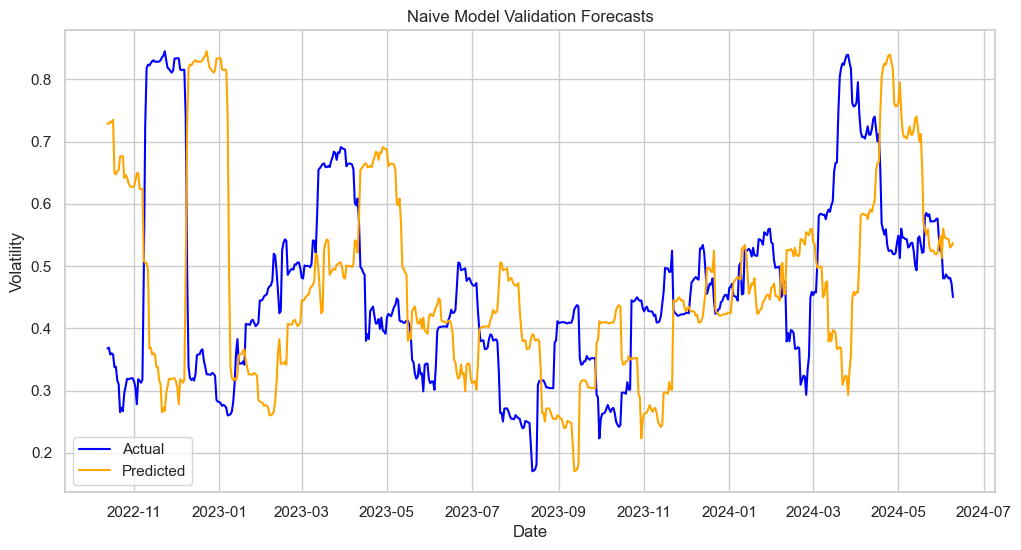

In [14]:
plot_forecasts(
    df_val.index + pd.Timedelta(days=forecast_horizon),
    y_val,
    y_pred_naive,
    title="Naive Model Validation Forecasts",
    y_label="Volatility",
)

#### 2. Historical Mean

This model predicts that future volatility will be equal to the mean volatility observed during the training period.

In [15]:
# Calculate historical mean from training data
historical_mean = df_train["Volatility"].mean()
print(f"Historical Mean Volatility: {historical_mean:.6f}")

# Predict using historical mean
y_pred_mean = np.full(len(y_val), historical_mean)

# Evaluate
metrics_mean = calculate_evaluation_metrics(y_val, y_pred_mean)

print("\nHistorical Mean Model Evaluation Metrics:")
for metric, value in metrics_mean.items():
    print(f"  {metric}: {value:.6f}")

REGRESSION_MODEL_RESULTS["Historical_Mean"] = {
    "model": "Historical Mean",
    "features": None,
    "train_metrics": None,
    "val_metrics": metrics_mean,
}

Historical Mean Volatility: 0.676973

Historical Mean Model Evaluation Metrics:
  MAE: 0.234948
  RMSE: 0.260269
  MAPE: 64.015325
  Directional_Accuracy: 51.404959


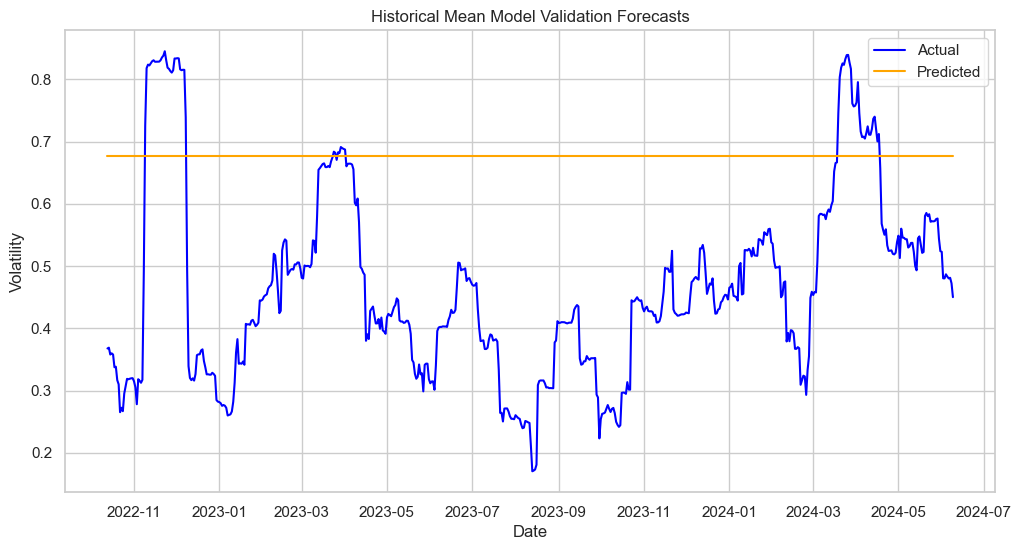

In [16]:
plot_forecasts(
    df_val.index + pd.Timedelta(days=forecast_horizon),
    y_val,
    y_pred_mean,
    title="Historical Mean Model Validation Forecasts",
    y_label="Volatility",
)

#### 3. Moving Average

This model uses the 7-day moving average of volatility as the prediction for future volatility.


In [17]:
# Use the pre-calculated 7-day moving average
y_pred_ma = df_val["Volatility_MA_7"]

# Evaluate
metrics_ma = calculate_evaluation_metrics(y_val, y_pred_ma)

print("Moving Average (7-day) Model Evaluation Metrics:")
for metric, value in metrics_ma.items():
    print(f"  {metric}: {value:.6f}")

REGRESSION_MODEL_RESULTS["Moving_Average"] = {
    "model": "Moving Average (7d)",
    "features": ["Volatility_MA_7"],
    "train_metrics": None,
    "val_metrics": metrics_ma,
}

Moving Average (7-day) Model Evaluation Metrics:
  MAE: 0.172305
  RMSE: 0.222286
  MAPE: 40.786470
  Directional_Accuracy: 48.099174


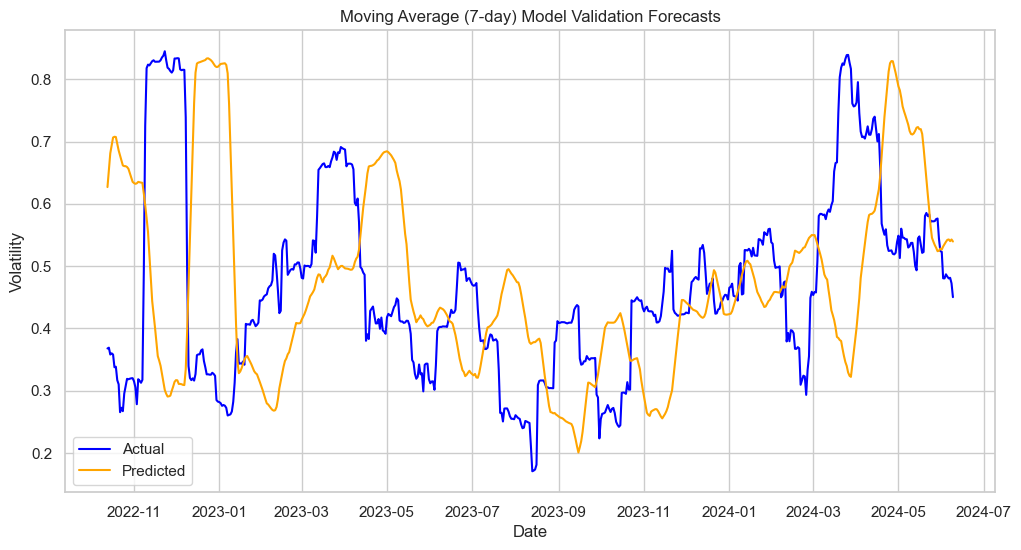

In [18]:
plot_forecasts(
    df_val.index + pd.Timedelta(days=forecast_horizon),
    y_val,
    y_pred_ma,
    title="Moving Average (7-day) Model Validation Forecasts",
    y_label="Volatility",
)

#### 4. Comparison of Baseline Models and Setting a benchmark for further models

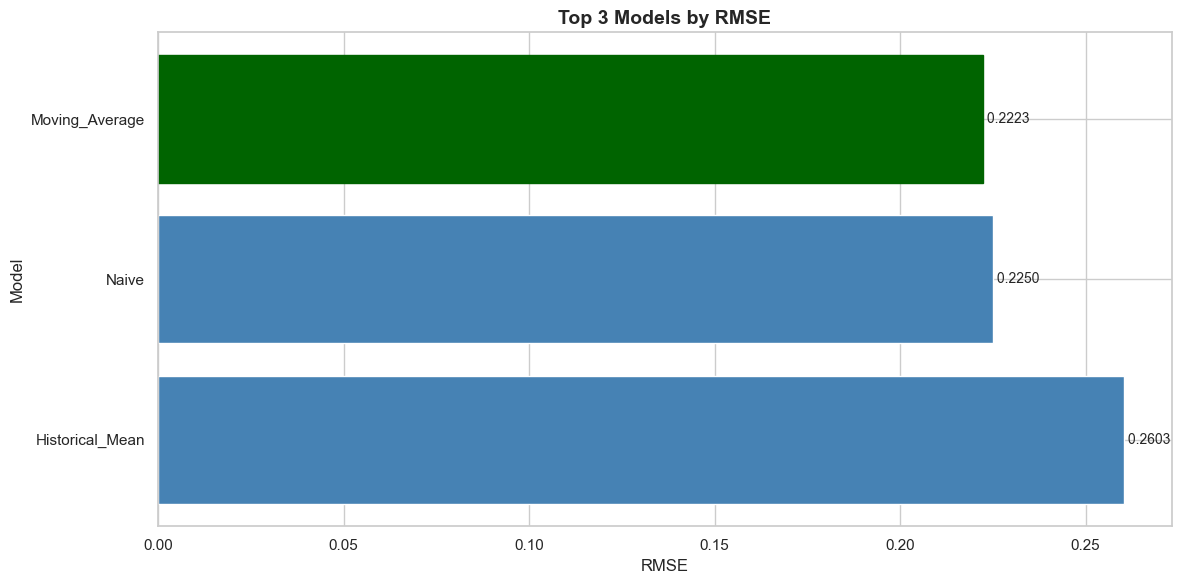


Top 3 Models by RMSE
 1. Moving_Average                 RMSE: 0.2223
 2. Naive                          RMSE: 0.2250
 3. Historical_Mean                RMSE: 0.2603



In [19]:
plot_top_models(REGRESSION_MODEL_RESULTS, top_n=3)

### 4. Machine Learning Models 

#### 1. Linear Regression

In [20]:
# Linear Regression
lr_result = train_model_with_feature_sets(
    model=LinearRegression(),
    model_name="Linear Regression",
    feature_sets=FEATURE_SETS,
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    metric="RMSE",
    verbose=True,
)

# Store best result
REGRESSION_MODEL_RESULTS["Linear_Regression_Best"] = {
    "model": "Linear Regression",
    "feature_set": lr_result["best_feature_set_name"],
    "features": lr_result["best_features"],
    "train_metrics": lr_result["best_metrics"]["train"],
    "val_metrics": lr_result["best_metrics"]["val"],
}


Training Linear Regression with 11 feature sets
Optimizing for: RMSE
Scaling: No

Feature Set: minimal
  Features: 9, Lookback: 1 days
  Training RMSE: 0.295672
  Validation RMSE: 0.263777

Feature Set: price_only
  Features: 28, Lookback: 35 days
  Training RMSE: 0.277923
  Validation RMSE: 0.232710

Feature Set: volatility_only
  Features: 22, Lookback: 61 days
  Training RMSE: 0.260487
  Validation RMSE: 0.218876

Feature Set: simple_vol
  Features: 17, Lookback: 45 days
  Training RMSE: 0.285262
  Validation RMSE: 0.237181

Feature Set: base
  Features: 35, Lookback: 35 days
  Training RMSE: 0.262273
  Validation RMSE: 0.235996

Feature Set: base_single_vol
  Features: 29, Lookback: 35 days
  Training RMSE: 0.278815
  Validation RMSE: 0.235033

Feature Set: base_with_short_vol
  Features: 40, Lookback: 38 days
  Training RMSE: 0.260727
  Validation RMSE: 0.239811

Feature Set: compact_vol
  Features: 21, Lookback: 45 days
  Training RMSE: 0.284489
  Validation RMSE: 0.241551

Feat

In [21]:
# View comparison
comparison_df = compare_feature_sets_results(lr_result["all_results"], metric="RMSE")
print(comparison_df)

# Access best model
best_lr_model = lr_result["best_model"]
best_features = lr_result["best_features"]

             Feature_Set  N_Features  Lookback_Days  Train_RMSE  Val_RMSE  \
0        volatility_only          22             61    0.260487  0.218876   
1     base_with_long_vol          44             61    0.257244  0.223370   
2           all_features          47             61    0.256964  0.223684   
3             price_only          28             35    0.277923  0.232710   
4        base_single_vol          29             35    0.278815  0.235033   
5                   base          35             35    0.262273  0.235996   
6             simple_vol          17             45    0.285262  0.237181   
7   base_with_medium_vol          43             45    0.260551  0.237970   
8    base_with_short_vol          40             38    0.260727  0.239811   
9            compact_vol          21             45    0.284489  0.241551   
10               minimal           9              1    0.295672  0.263777   

    Overfit_Gap  
0     -0.041611  
1     -0.033874  
2     -0.033280  
3  

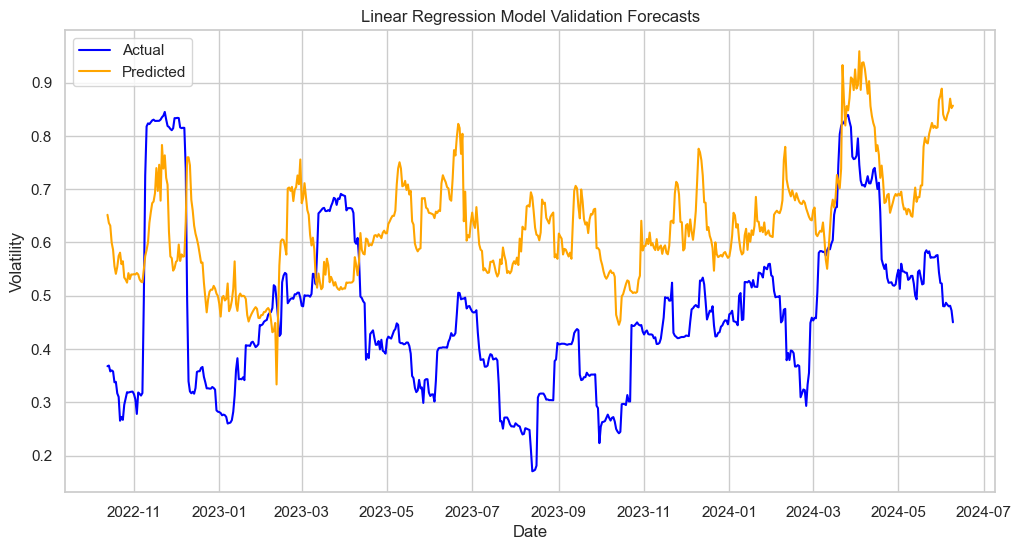

In [22]:
plot_forecasts(
    df_val.index + pd.Timedelta(days=forecast_horizon),
    y_val,
    best_lr_model.predict(X_val[best_features]),
    title="Linear Regression Model Validation Forecasts",
    y_label="Volatility",
)

#### 2. Ridge Regression

In [23]:
# Train Ridge Regression Model

# Ridge Regression is sensitive to feature scaling, so we will standardize the features before training

rr_result = train_model_with_feature_sets(
    model=Ridge(alpha=0.5, random_state=RANDOM_SEED),
    model_name="Ridge Regression",
    feature_sets=FEATURE_SETS,
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    scale=True,
)

# Store best result
REGRESSION_MODEL_RESULTS["Ridge_Regression_Best"] = {
    "model": "Ridge Regression",
    "scaler": rr_result["best_scaler"],
    "features": rr_result["best_features"],
    "train_metrics": rr_result["best_metrics"]["train"],
    "val_metrics": rr_result["best_metrics"]["val"],
}


Training Ridge Regression with 11 feature sets
Optimizing for: RMSE
Scaling: Yes

Feature Set: minimal
  Features: 9, Lookback: 1 days
  Training RMSE: 0.295672
  Validation RMSE: 0.263795

Feature Set: price_only
  Features: 28, Lookback: 35 days
  Training RMSE: 0.275357
  Validation RMSE: 0.231134

Feature Set: volatility_only
  Features: 22, Lookback: 61 days
  Training RMSE: 0.260800
  Validation RMSE: 0.221755

Feature Set: simple_vol
  Features: 17, Lookback: 45 days
  Training RMSE: 0.284846
  Validation RMSE: 0.236885

Feature Set: base
  Features: 35, Lookback: 35 days
  Training RMSE: 0.256998
  Validation RMSE: 0.224937

Feature Set: base_single_vol
  Features: 29, Lookback: 35 days
  Training RMSE: 0.274377
  Validation RMSE: 0.228335

Feature Set: base_with_short_vol
  Features: 40, Lookback: 38 days
  Training RMSE: 0.256436
  Validation RMSE: 0.228188

Feature Set: compact_vol
  Features: 21, Lookback: 45 days
  Training RMSE: 0.277992
  Validation RMSE: 0.229268

Feat

In [24]:
# View comparison
comparison_df = compare_feature_sets_results(rr_result["all_results"], metric="RMSE")
print(comparison_df)

# Access best model and scaler
best_rr_model = rr_result["best_model"]
best_rr_scaler = rr_result["best_scaler"]
best_rr_features = rr_result["best_features"]

             Feature_Set  N_Features  Lookback_Days  Train_RMSE  Val_RMSE  \
0     base_with_long_vol          44             61    0.253421  0.212835   
1           all_features          47             61    0.253291  0.212864   
2        volatility_only          22             61    0.260800  0.221755   
3                   base          35             35    0.256998  0.224937   
4   base_with_medium_vol          43             45    0.256225  0.225777   
5    base_with_short_vol          40             38    0.256436  0.228188   
6        base_single_vol          29             35    0.274377  0.228335   
7            compact_vol          21             45    0.277992  0.229268   
8             price_only          28             35    0.275357  0.231134   
9             simple_vol          17             45    0.284846  0.236885   
10               minimal           9              1    0.295672  0.263795   

    Overfit_Gap  
0     -0.040586  
1     -0.040427  
2     -0.039045  
3  

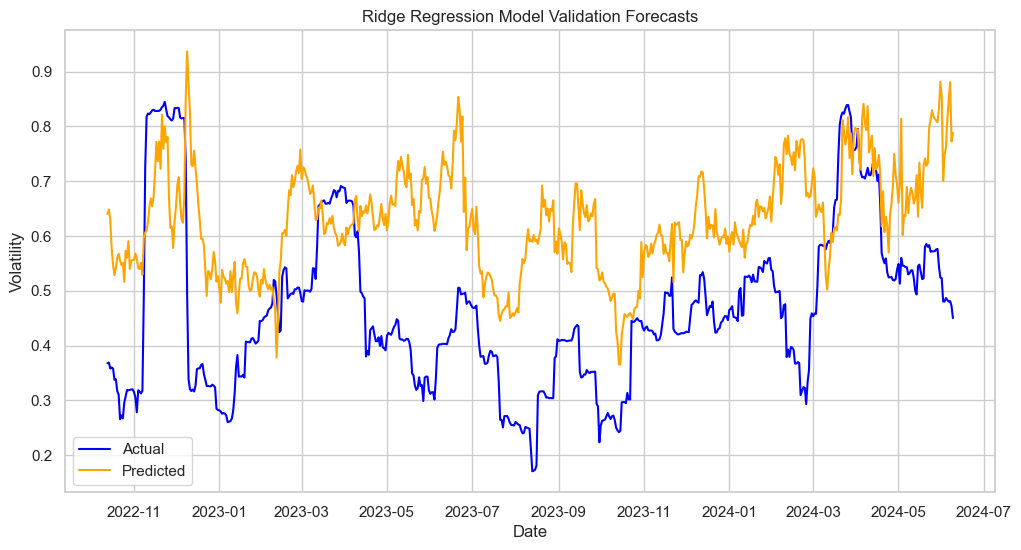

In [25]:
plot_forecasts(
    df_val.index + pd.Timedelta(days=forecast_horizon),
    y_val,
    best_rr_model.predict(best_rr_scaler.transform(X_val[best_rr_features])),
    title="Ridge Regression Model Validation Forecasts",
    y_label="Volatility",
)

#### 3. Lasso Regression

In [26]:
# Train Lasso Regression Model
lasso_result = train_model_with_feature_sets(
    model=Lasso(alpha=0.1, random_state=RANDOM_SEED),
    model_name="Lasso Regression",
    feature_sets=FEATURE_SETS,
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    scale=True,
)

# Store best result
REGRESSION_MODEL_RESULTS["Lasso_Regression_Best"] = {
    "model": "Lasso Regression",
    "scaler": lasso_result["best_scaler"],
    "features": lasso_result["best_features"],
    "train_metrics": lasso_result["best_metrics"]["train"],
    "val_metrics": lasso_result["best_metrics"]["val"],
}


Training Lasso Regression with 11 feature sets
Optimizing for: RMSE
Scaling: Yes

Feature Set: minimal
  Features: 9, Lookback: 1 days
  Training RMSE: 0.308196
  Validation RMSE: 0.261094

Feature Set: price_only
  Features: 28, Lookback: 35 days
  Training RMSE: 0.308196
  Validation RMSE: 0.261094

Feature Set: volatility_only
  Features: 22, Lookback: 61 days
  Training RMSE: 0.295645
  Validation RMSE: 0.246785

Feature Set: simple_vol
  Features: 17, Lookback: 45 days
  Training RMSE: 0.308196
  Validation RMSE: 0.261094

Feature Set: base
  Features: 35, Lookback: 35 days
  Training RMSE: 0.295645
  Validation RMSE: 0.246785

Feature Set: base_single_vol
  Features: 29, Lookback: 35 days
  Training RMSE: 0.308196
  Validation RMSE: 0.261094

Feature Set: base_with_short_vol
  Features: 40, Lookback: 38 days
  Training RMSE: 0.295645
  Validation RMSE: 0.246785

Feature Set: compact_vol
  Features: 21, Lookback: 45 days
  Training RMSE: 0.308196
  Validation RMSE: 0.261094

Feat

In [27]:
# Plot comparison of feature sets for Lasso Regression
comparison_df = compare_feature_sets_results(lasso_result["all_results"], metric="RMSE")
print(comparison_df)

# Access best model and scaler
best_lasso_model = lasso_result["best_model"]
best_lasso_scaler = lasso_result["best_scaler"]
best_lasso_features = lasso_result["best_features"]

             Feature_Set  N_Features  Lookback_Days  Train_RMSE  Val_RMSE  \
0        volatility_only          22             61    0.295645  0.246785   
1                   base          35             35    0.295645  0.246785   
2    base_with_short_vol          40             38    0.295645  0.246785   
3   base_with_medium_vol          43             45    0.295645  0.246785   
4     base_with_long_vol          44             61    0.295645  0.246785   
5           all_features          47             61    0.295645  0.246785   
6                minimal           9              1    0.308196  0.261094   
7             price_only          28             35    0.308196  0.261094   
8             simple_vol          17             45    0.308196  0.261094   
9        base_single_vol          29             35    0.308196  0.261094   
10           compact_vol          21             45    0.308196  0.261094   

    Overfit_Gap  
0     -0.048859  
1     -0.048859  
2     -0.048859  
3  

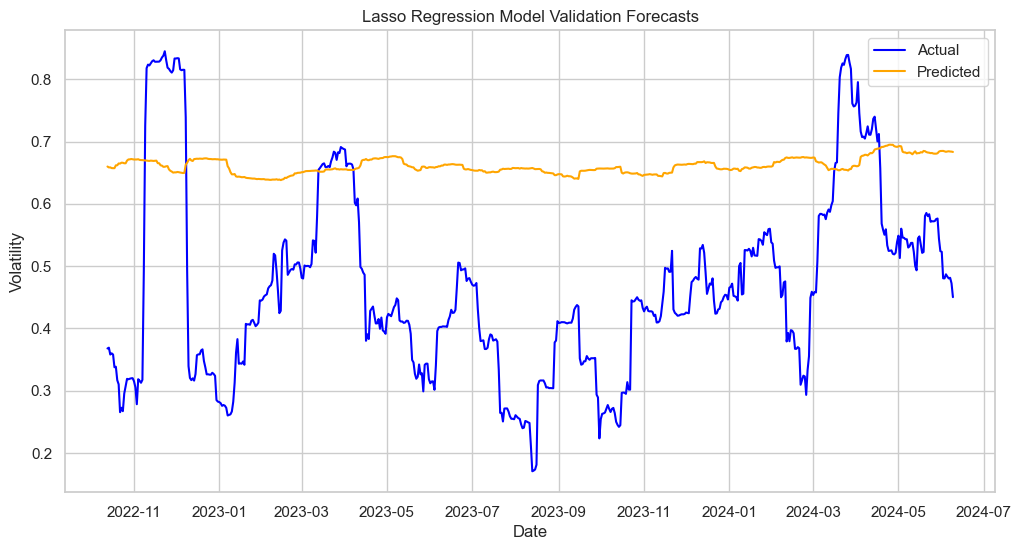

In [28]:
plot_forecasts(
    df_val.index + pd.Timedelta(days=forecast_horizon),
    y_val,
    best_lasso_model.predict(best_lasso_scaler.transform(X_val[best_lasso_features])),
    title="Lasso Regression Model Validation Forecasts",
    y_label="Volatility",
)

#### 4. Random Forest Regression

In [29]:
# Train Random Forest Regressor

rf_result = train_model_with_feature_sets(
    model=RandomForestRegressor(random_state=RANDOM_SEED),
    model_name="Random Forest Regressor",
    feature_sets=FEATURE_SETS,
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    scale=False,
)

# Store best result
REGRESSION_MODEL_RESULTS["Random_Forest_Best"] = {
    "model": "Random Forest Regressor",
    "features": rf_result["best_features"],
    "train_metrics": rf_result["best_metrics"]["train"],
    "val_metrics": rf_result["best_metrics"]["val"],
}


Training Random Forest Regressor with 11 feature sets
Optimizing for: RMSE
Scaling: No

Feature Set: minimal
  Features: 9, Lookback: 1 days
  Training RMSE: 0.050618
  Validation RMSE: 0.327763

Feature Set: price_only
  Features: 28, Lookback: 35 days
  Training RMSE: 0.036358
  Validation RMSE: 0.289185

Feature Set: volatility_only
  Features: 22, Lookback: 61 days
  Training RMSE: 0.047839
  Validation RMSE: 0.320058

Feature Set: simple_vol
  Features: 17, Lookback: 45 days
  Training RMSE: 0.027465
  Validation RMSE: 0.317465

Feature Set: base
  Features: 35, Lookback: 35 days
  Training RMSE: 0.035232
  Validation RMSE: 0.276041

Feature Set: base_single_vol
  Features: 29, Lookback: 35 days
  Training RMSE: 0.036239
  Validation RMSE: 0.283579

Feature Set: base_with_short_vol
  Features: 40, Lookback: 38 days
  Training RMSE: 0.035203
  Validation RMSE: 0.275868

Feature Set: compact_vol
  Features: 21, Lookback: 45 days
  Training RMSE: 0.027469
  Validation RMSE: 0.308863

In [30]:
# View comparison
comparison_df = compare_feature_sets_results(rf_result["all_results"], metric="RMSE")
print(comparison_df)

# Access best model
best_rf_model = rf_result["best_model"]
best_rf_features = rf_result["best_features"]

             Feature_Set  N_Features  Lookback_Days  Train_RMSE  Val_RMSE  \
0    base_with_short_vol          40             38    0.035203  0.275868   
1                   base          35             35    0.035232  0.276041   
2        base_single_vol          29             35    0.036239  0.283579   
3   base_with_medium_vol          43             45    0.034719  0.284475   
4             price_only          28             35    0.036358  0.289185   
5           all_features          47             61    0.032153  0.308246   
6            compact_vol          21             45    0.027469  0.308863   
7     base_with_long_vol          44             61    0.032243  0.309973   
8             simple_vol          17             45    0.027465  0.317465   
9        volatility_only          22             61    0.047839  0.320058   
10               minimal           9              1    0.050618  0.327763   

    Overfit_Gap  
0      0.240665  
1      0.240809  
2      0.247340  
3  

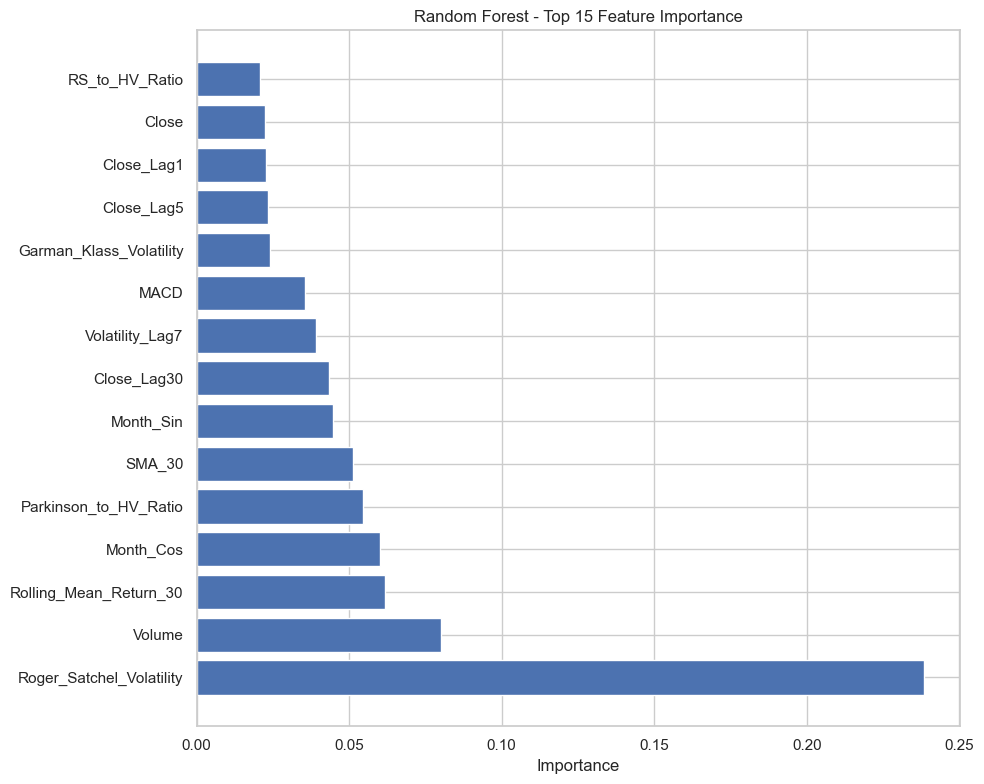

In [31]:
# Feature importance

feature_importance_rf = pd.DataFrame(
    {"feature": best_rf_features, "importance": best_rf_model.feature_importances_}
).sort_values("importance", ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(
    feature_importance_rf["feature"][:15], feature_importance_rf["importance"][:15]
)
plt.xlabel("Importance")
plt.title("Random Forest - Top 15 Feature Importance")
plt.tight_layout()
plt.show()

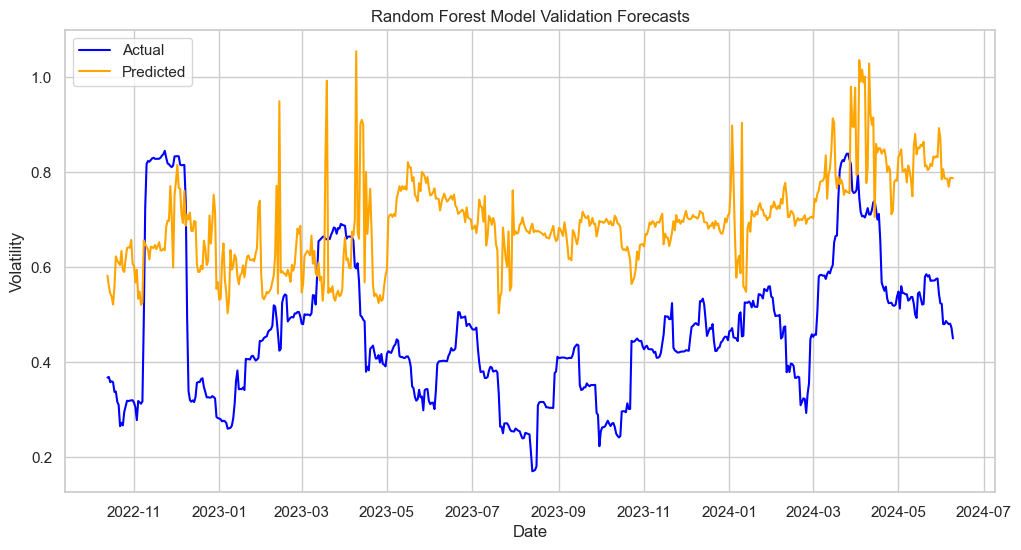

In [32]:
plot_forecasts(
    df_val.index + pd.Timedelta(days=forecast_horizon),
    y_val,
    best_rf_model.predict(X_val[best_rf_features]),
    title="Random Forest Model Validation Forecasts",
    y_label="Volatility",
)

#### 5. Extreme Gradient Boosting (XGBoost) Regression

In [33]:
# Train XGBoost Regressor

xgb_result = train_model_with_feature_sets(
    model=xgb.XGBRegressor(random_state=RANDOM_SEED, objective="reg:squarederror"),
    model_name="XGBoost Regressor",
    feature_sets=FEATURE_SETS,
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    scale=False,
)

# Store best result
REGRESSION_MODEL_RESULTS["XGBoost_Best"] = {
    "model": "XGBoost Regressor",
    "features": xgb_result["best_features"],
    "train_metrics": xgb_result["best_metrics"]["train"],
    "val_metrics": xgb_result["best_metrics"]["val"],
}


Training XGBoost Regressor with 11 feature sets
Optimizing for: RMSE
Scaling: No

Feature Set: minimal
  Features: 9, Lookback: 1 days
  Training RMSE: 0.033843
  Validation RMSE: 0.370666

Feature Set: price_only
  Features: 28, Lookback: 35 days
  Training RMSE: 0.011189
  Validation RMSE: 0.363994

Feature Set: volatility_only
  Features: 22, Lookback: 61 days
  Training RMSE: 0.015691
  Validation RMSE: 0.359466

Feature Set: simple_vol
  Features: 17, Lookback: 45 days
  Training RMSE: 0.010156
  Validation RMSE: 0.373401

Feature Set: base
  Features: 35, Lookback: 35 days
  Training RMSE: 0.009033
  Validation RMSE: 0.317974

Feature Set: base_single_vol
  Features: 29, Lookback: 35 days
  Training RMSE: 0.011411
  Validation RMSE: 0.335943

Feature Set: base_with_short_vol
  Features: 40, Lookback: 38 days
  Training RMSE: 0.007861
  Validation RMSE: 0.301737

Feature Set: compact_vol
  Features: 21, Lookback: 45 days
  Training RMSE: 0.010193
  Validation RMSE: 0.354895

Feat

In [34]:
# View comparison
comparison_df = compare_feature_sets_results(xgb_result["all_results"], metric="RMSE")
print(comparison_df)

# Access best model
best_xgb_model = xgb_result["best_model"]
best_xgb_features = xgb_result["best_features"]

             Feature_Set  N_Features  Lookback_Days  Train_RMSE  Val_RMSE  \
0    base_with_short_vol          40             38    0.007861  0.301737   
1   base_with_medium_vol          43             45    0.007164  0.308141   
2                   base          35             35    0.009033  0.317974   
3           all_features          47             61    0.007026  0.319500   
4     base_with_long_vol          44             61    0.007720  0.329972   
5        base_single_vol          29             35    0.011411  0.335943   
6            compact_vol          21             45    0.010193  0.354895   
7        volatility_only          22             61    0.015691  0.359466   
8             price_only          28             35    0.011189  0.363994   
9                minimal           9              1    0.033843  0.370666   
10            simple_vol          17             45    0.010156  0.373401   

    Overfit_Gap  
0      0.293876  
1      0.300977  
2      0.308940  
3  

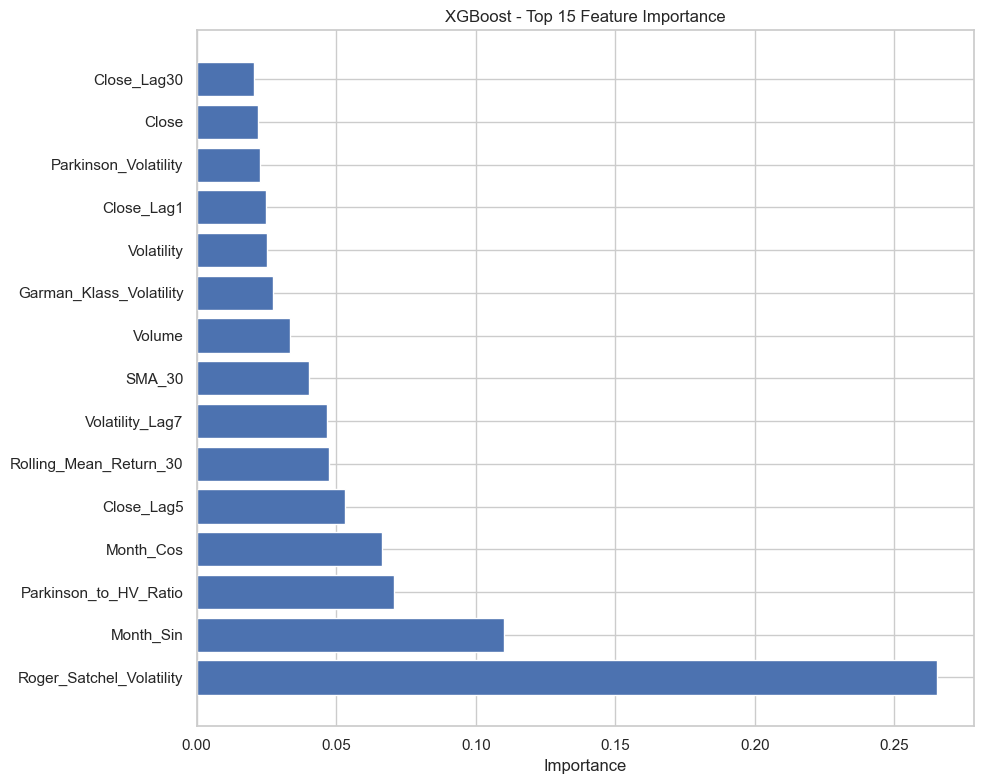

In [35]:
# Feature importance
feature_importance_xgb = pd.DataFrame(
    {"feature": best_xgb_features, "importance": best_xgb_model.feature_importances_}
).sort_values("importance", ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(
    feature_importance_xgb["feature"][:15], feature_importance_xgb["importance"][:15]
)
plt.xlabel("Importance")
plt.title("XGBoost - Top 15 Feature Importance")
plt.tight_layout()
plt.show()

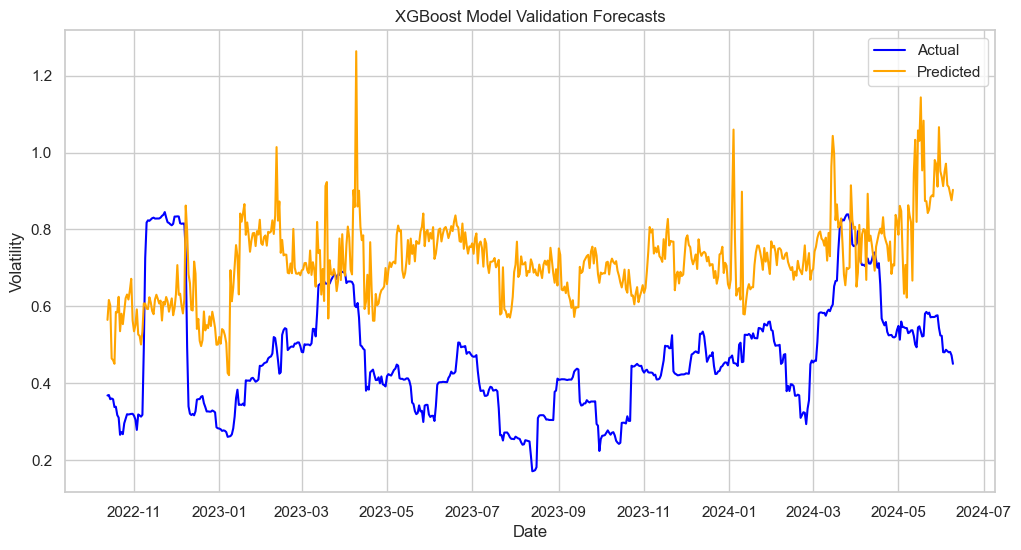

In [36]:
plot_forecasts(
    df_val.index + pd.Timedelta(days=forecast_horizon),
    y_val,
    best_xgb_model.predict(X_val[best_xgb_features]),
    title="XGBoost Model Validation Forecasts",
    y_label="Volatility",
)

#### 6. LightGBM Regression

In [37]:
# Train LGBM Regressor
lgb_result = train_model_with_feature_sets(
    model=lgb.LGBMRegressor(random_state=RANDOM_SEED),
    model_name="LightGBM Regressor",
    feature_sets=FEATURE_SETS,
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    scale=False,
)
# Store best result
REGRESSION_MODEL_RESULTS["LightGBM_Best"] = {
    "model": "LightGBM Regressor",
    "features": lgb_result["best_features"],
    "train_metrics": lgb_result["best_metrics"]["train"],
    "val_metrics": lgb_result["best_metrics"]["val"],
}


Training LightGBM Regressor with 11 feature sets
Optimizing for: RMSE
Scaling: No

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000319 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1058
[LightGBM] [Info] Number of data points in the train set: 2828, number of used features: 9
[LightGBM] [Info] Start training from score 0.677983
Feature Set: minimal
  Features: 9, Lookback: 1 days
  Training RMSE: 0.088662
  Validation RMSE: 0.341528

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000335 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5903
[LightGBM] [Info] Number of data points in the train set: 2828, number of used features: 28
[LightGBM] [Info] Start training from score 0.677983
Feature Set: price_only
  Features: 28, Lookback: 35 days
  Training RMSE: 0.045506
  Validation RMSE: 0.322120

[LightGBM] [In

In [38]:
# Compare feature sets
comparison_df = compare_feature_sets_results(lgb_result["all_results"], metric="RMSE")
print(comparison_df)

# Access best model
best_lgb_model = lgb_result["best_model"]
best_lgb_features = lgb_result["best_features"]

             Feature_Set  N_Features  Lookback_Days  Train_RMSE  Val_RMSE  \
0    base_with_short_vol          40             38    0.033991  0.299102   
1                   base          35             35    0.038408  0.299633   
2     base_with_long_vol          44             61    0.029654  0.310526   
3   base_with_medium_vol          43             45    0.033315  0.315727   
4             price_only          28             35    0.045506  0.322120   
5        volatility_only          22             61    0.058487  0.323540   
6           all_features          47             61    0.028864  0.325737   
7        base_single_vol          29             35    0.043325  0.338923   
8                minimal           9              1    0.088662  0.341528   
9            compact_vol          21             45    0.038652  0.342633   
10            simple_vol          17             45    0.042193  0.354336   

    Overfit_Gap  
0      0.265111  
1      0.261225  
2      0.280872  
3  

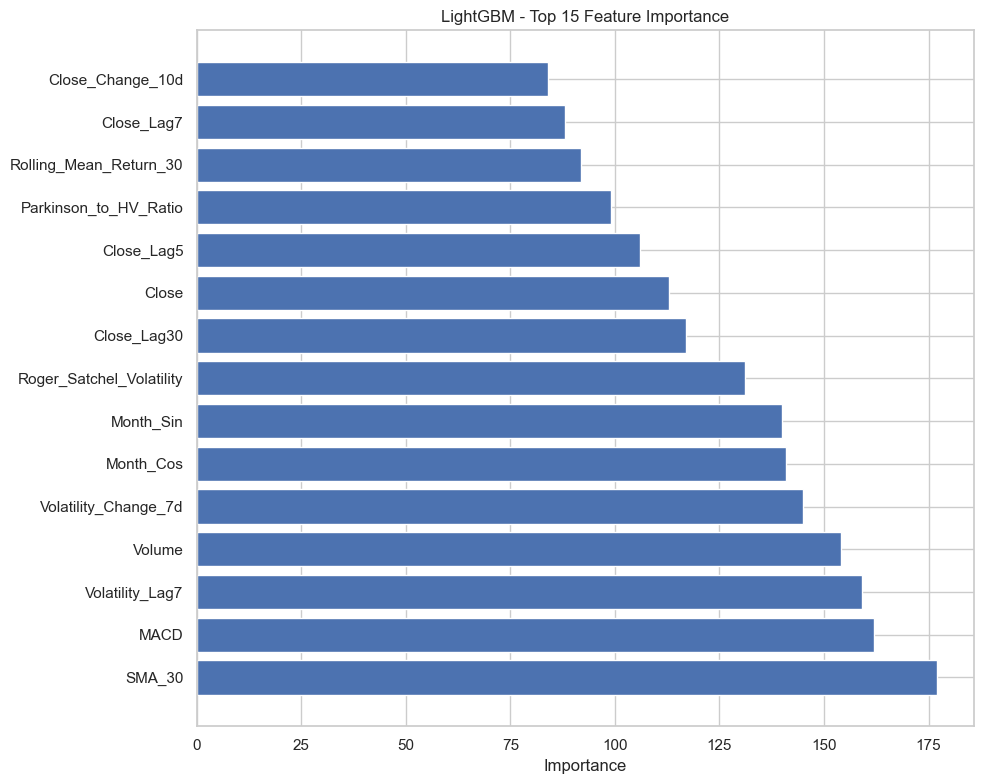

In [39]:
# Feature importance
feature_importance_lgb = pd.DataFrame(
    {"feature": best_lgb_features, "importance": best_lgb_model.feature_importances_}
).sort_values("importance", ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(
    feature_importance_lgb["feature"][:15], feature_importance_lgb["importance"][:15]
)
plt.xlabel("Importance")
plt.title("LightGBM - Top 15 Feature Importance")
plt.tight_layout()
plt.show()

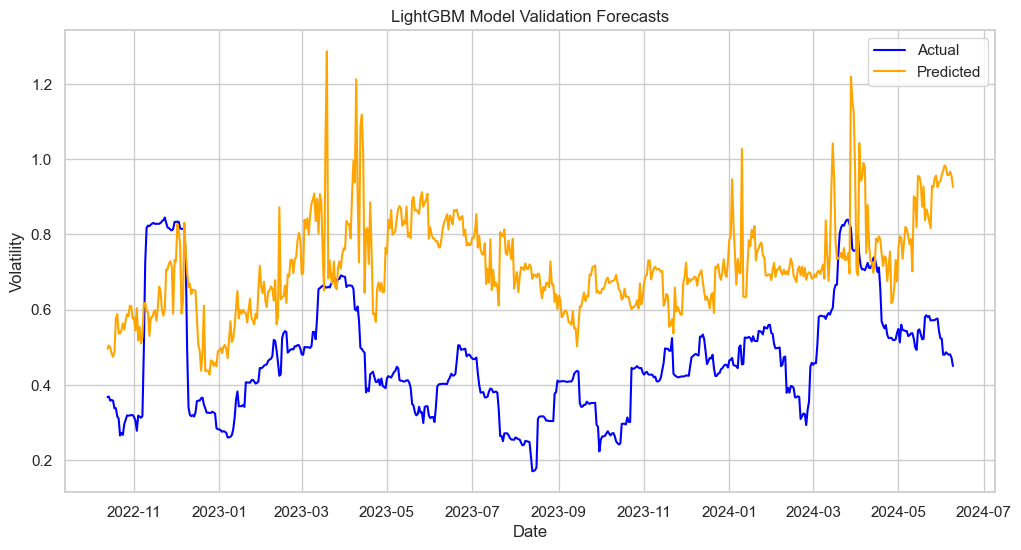

In [40]:
plot_forecasts(
    df_val.index + pd.Timedelta(days=forecast_horizon),
    y_val,
    best_lgb_model.predict(X_val[best_lgb_features]),
    title="LightGBM Model Validation Forecasts",
    y_label="Volatility",
)

### 5. Deep Learning Models

#### 1. LSTM Neural Network

In [41]:
# Train LSTM

sequence_length = 7  # Using 7 days of historical data to predict future volatility
# As a result, we need to remember taht if we want to fetch data, we need to have `lookback_days` + `sequence_length - 1` days of data available for the model to make a prediction.
hidden_size = 64
num_layers = 2
dropout = 0.2
batch_size = 32
epochs = 100
learning_rate = 0.001
patience = 5

lstm_result = train_neural_network_with_feature_sets(
    model_class=VolatilityLSTM,
    model_name="LSTM",
    feature_sets=FEATURE_SETS,
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    sequence_length=sequence_length,
    hidden_size=hidden_size,
    num_layers=num_layers,
    dropout=dropout,
    batch_size=batch_size,
    epochs=epochs,
    learning_rate=learning_rate,
    patience=patience,
    metric="RMSE",
    verbose=True,
)

# Store best result
REGRESSION_MODEL_RESULTS["LSTM_Best"] = {
    "model": "LSTM",
    "features": lstm_result["best_features"],
    "train_metrics": lstm_result["best_metrics"]["train"],
    "val_metrics": lstm_result["best_metrics"]["val"],
    "parameters": {
        "sequence_length": sequence_length,
        "hidden_size": hidden_size,
        "num_layers": num_layers,
        "dropout": dropout,
        "batch_size": batch_size,
        "epochs": epochs,
        "learning_rate": learning_rate,
        "patience": patience,
    },
}


Training LSTM with 11 feature sets
Sequence length: 7, Device: mps
Optimizing for: RMSE

  Early stopping at epoch 10
Feature Set: minimal
  Features: 9, Lookback: 1 days
  Training RMSE: 0.205197
  Validation RMSE: 0.342812

  Early stopping at epoch 6
Feature Set: price_only
  Features: 28, Lookback: 35 days
  Training RMSE: 0.144409
  Validation RMSE: 0.343122

  Early stopping at epoch 6
Feature Set: volatility_only
  Features: 22, Lookback: 61 days
  Training RMSE: 0.219157
  Validation RMSE: 0.323482

  Early stopping at epoch 6
Feature Set: simple_vol
  Features: 17, Lookback: 45 days
  Training RMSE: 0.143238
  Validation RMSE: 0.343141

  Early stopping at epoch 6
Feature Set: base
  Features: 35, Lookback: 35 days
  Training RMSE: 0.127408
  Validation RMSE: 0.345759

  Early stopping at epoch 9
Feature Set: base_single_vol
  Features: 29, Lookback: 35 days
  Training RMSE: 0.123417
  Validation RMSE: 0.341036

  Early stopping at epoch 6
Feature Set: base_with_short_vol
  F

In [42]:
# Compare feature sets
comparison_df = compare_feature_sets_results(lstm_result["all_results"], metric="RMSE")
print(comparison_df)

# Access best model
best_lstm_model = lstm_result["best_model"]
best_lstm_features = lstm_result["best_features"]
best_lstm_scaler = lstm_result["best_scaler"]

             Feature_Set  N_Features  Lookback_Days  Train_RMSE  Val_RMSE  \
0        volatility_only          22             61    0.219157  0.323482   
1    base_with_short_vol          40             38    0.093565  0.324259   
2        base_single_vol          29             35    0.123417  0.341036   
3                minimal           9              1    0.205197  0.342812   
4             price_only          28             35    0.144409  0.343122   
5             simple_vol          17             45    0.143238  0.343141   
6                   base          35             35    0.127408  0.345759   
7   base_with_medium_vol          43             45    0.119281  0.393031   
8     base_with_long_vol          44             61    0.110813  0.401019   
9            compact_vol          21             45    0.134715  0.420881   
10          all_features          47             61    0.096187  0.433514   

    Overfit_Gap  
0      0.104326  
1      0.230694  
2      0.217619  
3  

#### 2. GRU Neural Network

In [43]:
# Train GRU Model

gru_result = train_neural_network_with_feature_sets(
    model_class=VolatilityGRU,
    model_name="GRU",
    feature_sets=FEATURE_SETS,
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    sequence_length=sequence_length,
    hidden_size=hidden_size,
    num_layers=num_layers,
    dropout=dropout,
    batch_size=batch_size,
    epochs=epochs,
    learning_rate=learning_rate,
    patience=patience,
    metric="RMSE",
    verbose=True,
)

# Store best result
REGRESSION_MODEL_RESULTS["GRU_Best"] = {
    "model": "GRU",
    "features": gru_result["best_features"],
    "train_metrics": gru_result["best_metrics"]["train"],
    "val_metrics": gru_result["best_metrics"]["val"],
    "parameters": {
        "sequence_length": sequence_length,
        "hidden_size": hidden_size,
        "num_layers": num_layers,
        "dropout": dropout,
        "batch_size": batch_size,
        "epochs": epochs,
        "learning_rate": learning_rate,
        "patience": patience,
    },
}


Training GRU with 11 feature sets
Sequence length: 7, Device: mps
Optimizing for: RMSE

  Early stopping at epoch 7
Feature Set: minimal
  Features: 9, Lookback: 1 days
  Training RMSE: 0.244591
  Validation RMSE: 0.284708

  Early stopping at epoch 6
Feature Set: price_only
  Features: 28, Lookback: 35 days
  Training RMSE: 0.182170
  Validation RMSE: 0.283018

  Early stopping at epoch 9
Feature Set: volatility_only
  Features: 22, Lookback: 61 days
  Training RMSE: 0.234194
  Validation RMSE: 0.257562

  Early stopping at epoch 7
Feature Set: simple_vol
  Features: 17, Lookback: 45 days
  Training RMSE: 0.206582
  Validation RMSE: 0.390190

  Early stopping at epoch 6
Feature Set: base
  Features: 35, Lookback: 35 days
  Training RMSE: 0.152296
  Validation RMSE: 0.244919

  Early stopping at epoch 7
Feature Set: base_single_vol
  Features: 29, Lookback: 35 days
  Training RMSE: 0.173762
  Validation RMSE: 0.321863

  Early stopping at epoch 7
Feature Set: base_with_short_vol
  Fea

In [44]:
# Compare feature sets
comparison_df = compare_feature_sets_results(gru_result["all_results"], metric="RMSE")
print(comparison_df)

# Access best model
best_gru_model = gru_result["best_model"]
best_gru_features = gru_result["best_features"]
best_gru_scaler = gru_result["best_scaler"]

             Feature_Set  N_Features  Lookback_Days  Train_RMSE  Val_RMSE  \
0                   base          35             35    0.152296  0.244919   
1        volatility_only          22             61    0.234194  0.257562   
2            compact_vol          21             45    0.172922  0.266579   
3    base_with_short_vol          40             38    0.146765  0.280638   
4             price_only          28             35    0.182170  0.283018   
5                minimal           9              1    0.244591  0.284708   
6        base_single_vol          29             35    0.173762  0.321863   
7   base_with_medium_vol          43             45    0.147295  0.336672   
8     base_with_long_vol          44             61    0.140096  0.386488   
9             simple_vol          17             45    0.206582  0.390190   
10          all_features          47             61    0.121185  0.455390   

    Overfit_Gap  
0      0.092624  
1      0.023369  
2      0.093657  
3  

#### 3. Attention LSTM Neural Network

In [45]:
# Train Attention LSTM Model
attention_lstm_result = train_neural_network_with_feature_sets(
    model_class=AttentionLSTM,
    model_name="Attention LSTM",
    feature_sets=FEATURE_SETS,
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    sequence_length=sequence_length,
    hidden_size=hidden_size,
    num_layers=num_layers,
    dropout=dropout,
    batch_size=batch_size,
    epochs=epochs,
    learning_rate=learning_rate,
    patience=patience,
    metric="RMSE",
    verbose=True,
)
# Store best result
REGRESSION_MODEL_RESULTS["Attention_LSTM_Best"] = {
    "model": "Attention LSTM",
    "features": attention_lstm_result["best_features"],
    "train_metrics": attention_lstm_result["best_metrics"]["train"],
    "val_metrics": attention_lstm_result["best_metrics"]["val"],
    "parameters": {
        "sequence_length": sequence_length,
        "hidden_size": hidden_size,
        "num_layers": num_layers,
        "dropout": dropout,
        "batch_size": batch_size,
        "epochs": epochs,
        "learning_rate": learning_rate,
        "patience": patience,
    },
}


Training Attention LSTM with 11 feature sets
Sequence length: 7, Device: mps
Optimizing for: RMSE

  Early stopping at epoch 10
Feature Set: minimal
  Features: 9, Lookback: 1 days
  Training RMSE: 0.202056
  Validation RMSE: 0.298830

  Early stopping at epoch 6
Feature Set: price_only
  Features: 28, Lookback: 35 days
  Training RMSE: 0.151514
  Validation RMSE: 0.304412

  Early stopping at epoch 11
Feature Set: volatility_only
  Features: 22, Lookback: 61 days
  Training RMSE: 0.203705
  Validation RMSE: 0.295608

  Early stopping at epoch 6
Feature Set: simple_vol
  Features: 17, Lookback: 45 days
  Training RMSE: 0.166080
  Validation RMSE: 0.369169

  Early stopping at epoch 6
Feature Set: base
  Features: 35, Lookback: 35 days
  Training RMSE: 0.126849
  Validation RMSE: 0.385808

  Early stopping at epoch 6
Feature Set: base_single_vol
  Features: 29, Lookback: 35 days
  Training RMSE: 0.154139
  Validation RMSE: 0.308170

  Early stopping at epoch 6
Feature Set: base_with_sh

In [46]:
# Compare feature sets
comparison_df = compare_feature_sets_results(
    attention_lstm_result["all_results"], metric="RMSE"
)
print(comparison_df)

# Access best model
best_attention_lstm_model = attention_lstm_result["best_model"]
best_attention_lstm_features = attention_lstm_result["best_features"]
best_attention_lstm_scaler = attention_lstm_result["best_scaler"]

             Feature_Set  N_Features  Lookback_Days  Train_RMSE  Val_RMSE  \
0            compact_vol          21             45    0.155072  0.263658   
1        volatility_only          22             61    0.203705  0.295608   
2                minimal           9              1    0.202056  0.298830   
3             price_only          28             35    0.151514  0.304412   
4        base_single_vol          29             35    0.154139  0.308170   
5    base_with_short_vol          40             38    0.126298  0.328284   
6             simple_vol          17             45    0.166080  0.369169   
7           all_features          47             61    0.086694  0.369887   
8     base_with_long_vol          44             61    0.089534  0.372871   
9                   base          35             35    0.126849  0.385808   
10  base_with_medium_vol          43             45    0.075991  0.396919   

    Overfit_Gap  
0      0.108585  
1      0.091903  
2      0.096774  
3  

### 6. Model Evaluation and Comparison

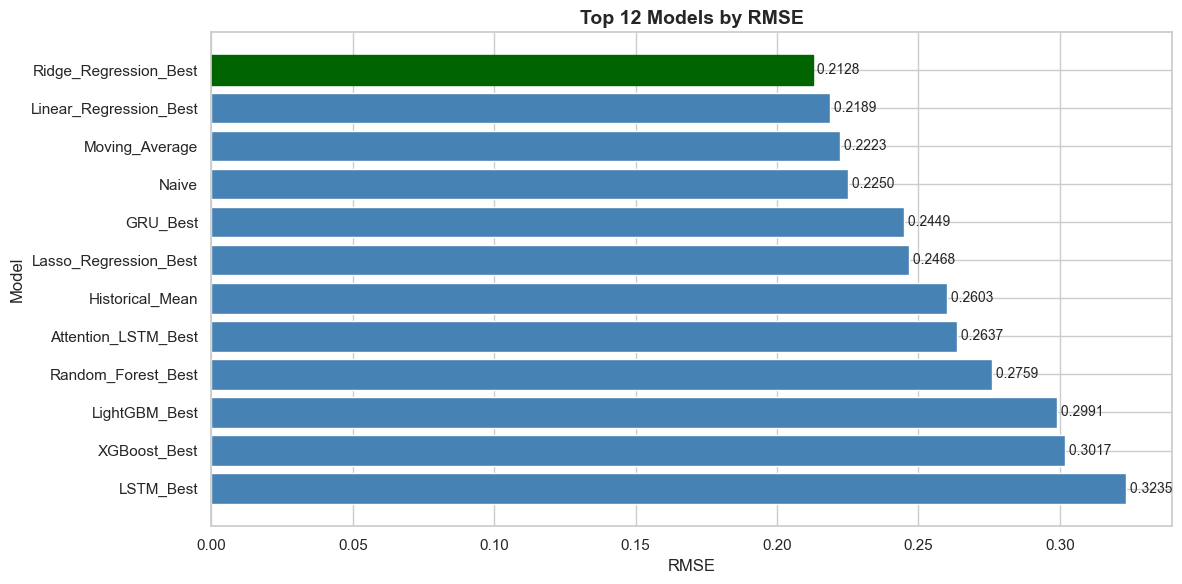


Top 12 Models by RMSE
 1. Ridge_Regression_Best          RMSE: 0.2128
 2. Linear_Regression_Best         RMSE: 0.2189
 3. Moving_Average                 RMSE: 0.2223
 4. Naive                          RMSE: 0.2250
 5. GRU_Best                       RMSE: 0.2449
 6. Lasso_Regression_Best          RMSE: 0.2468
 7. Historical_Mean                RMSE: 0.2603
 8. Attention_LSTM_Best            RMSE: 0.2637
 9. Random_Forest_Best             RMSE: 0.2759
10. LightGBM_Best                  RMSE: 0.2991
11. XGBoost_Best                   RMSE: 0.3017
12. LSTM_Best                      RMSE: 0.3235



In [47]:
plot_top_models(REGRESSION_MODEL_RESULTS, top_n=12)

### 7. Hyperparameter Tuning for the Best Model

#### 7.1 Find best hyperparameters for best regression model using validation set

Best model on validation set is Ridge Regression. We will try with different alpha values and solvers to find the best configuration for our data.

In [48]:
# Identify the overall best regression model based on validation RMSE
best_regression_model_results = REGRESSION_MODEL_RESULTS["Ridge_Regression_Best"]
best_regression_model_features = best_regression_model_results["features"]
print(f"Best Regression Model: {best_regression_model_results['model']}")
print(f"Best Regression Model Features: {best_regression_model_features}")

Best Regression Model: Ridge Regression
Best Regression Model Features: ['Close', 'Volume', 'Return', 'Log_Return', 'Price_Diff', 'Low_High_Diff', 'Open_Close_Diff', 'Open_Close_Up', 'Close_Lag1', 'Close_Lag5', 'Close_Lag7', 'Close_Lag30', 'Return_Lag1', 'Return_Lag5', 'Return_Lag7', 'Return_Lag30', 'SMA_30', 'Rolling_Mean_Return_30', 'Rolling_Std_Return_30', 'Close_Change_5d', 'Close_Change_10d', 'Close_Change_20d', 'MACD', 'RSI', 'Month_Sin', 'Month_Cos', 'DayOfWeek_Sin', 'DayOfWeek_Cos', 'Volatility', 'Parkinson_Volatility', 'Garman_Klass_Volatility', 'Roger_Satchel_Volatility', 'Volatility_Lag7', 'Volatility_Lag14', 'Volatility_Lag30', 'Volatility_MA_14', 'Volatility_MA_30', 'Volatility_Change_7d', 'Volatility_Change_14d', 'Volatility_Change_30d', 'Volatility_Momentum', 'Parkinson_to_HV_Ratio', 'GK_to_HV_Ratio', 'RS_to_HV_Ratio']


In [49]:
alphas = [0.01, 0.1, 1, 10, 100]
solvers = ["svd", "cholesky", "lsqr", "auto"]

best_rmse = float("inf")
best_params = {}

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[best_regression_model_features])
X_val_scaled = scaler.transform(X_val[best_regression_model_features])

for alpha in alphas:
    for solver in solvers:
        ridge = Ridge(alpha=alpha, solver=solver, random_state=RANDOM_SEED)
        ridge.fit(X_train_scaled, y_train)
        y_val_pred = ridge.predict(X_val_scaled)
        rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

        if rmse < best_rmse:
            best_rmse = rmse
            best_params = {"alpha": alpha, "solver": solver}

        print(f"Alpha: {alpha}, Solver: {solver}, Val RMSE: {rmse:.6f}")

print(f"Best alpha: {best_params['alpha']}")
print(f"Best solver: {best_params['solver']}")
print(f"Best val RMSE: {best_rmse:.6f}")

Alpha: 0.01, Solver: svd, Val RMSE: 0.211976
Alpha: 0.01, Solver: cholesky, Val RMSE: 0.211976
Alpha: 0.01, Solver: lsqr, Val RMSE: 0.213553
Alpha: 0.01, Solver: auto, Val RMSE: 0.211976
Alpha: 0.1, Solver: svd, Val RMSE: 0.212368
Alpha: 0.1, Solver: cholesky, Val RMSE: 0.212368
Alpha: 0.1, Solver: lsqr, Val RMSE: 0.213477
Alpha: 0.1, Solver: auto, Val RMSE: 0.212368
Alpha: 1, Solver: svd, Val RMSE: 0.212977
Alpha: 1, Solver: cholesky, Val RMSE: 0.212977
Alpha: 1, Solver: lsqr, Val RMSE: 0.212232
Alpha: 1, Solver: auto, Val RMSE: 0.212977
Alpha: 10, Solver: svd, Val RMSE: 0.211626
Alpha: 10, Solver: cholesky, Val RMSE: 0.211626
Alpha: 10, Solver: lsqr, Val RMSE: 0.211647
Alpha: 10, Solver: auto, Val RMSE: 0.211626
Alpha: 100, Solver: svd, Val RMSE: 0.205415
Alpha: 100, Solver: cholesky, Val RMSE: 0.205415
Alpha: 100, Solver: lsqr, Val RMSE: 0.205432
Alpha: 100, Solver: auto, Val RMSE: 0.205415
Best alpha: 100
Best solver: svd
Best val RMSE: 0.205415


#### 7.2 Train and Evaluate final model with best hyperparameters

In [50]:
final_regression_model = Ridge(
    alpha=best_params["alpha"], solver=best_params["solver"], random_state=RANDOM_SEED
)

final_regression_model.fit(X_train_scaled, y_train)
y_train_pred = final_regression_model.predict(X_train_scaled)
y_val_pred = final_regression_model.predict(X_val_scaled)

train_metrics_final = calculate_evaluation_metrics(y_train, y_train_pred)
val_metrics_final = calculate_evaluation_metrics(y_val, y_val_pred)

print("\nFinal Ridge Regression Model Evaluation Metrics:")
print("Train Metrics:")
for metric, value in train_metrics_final.items():
    print(f"  {metric}: {value:.6f}")
print("Validation Metrics:")
for metric, value in val_metrics_final.items():
    print(f"  {metric}: {value:.6f}")


Final Ridge Regression Model Evaluation Metrics:
Train Metrics:
  MAE: 0.190441
  RMSE: 0.259000
  MAPE: 34.856026
  Directional_Accuracy: 48.213654
Validation Metrics:
  MAE: 0.181966
  RMSE: 0.205415
  MAPE: 48.267066
  Directional_Accuracy: 50.082645


### 8. Save the best model and its parameters for future use

In [51]:
# Store final model results
model_data = {
    "model": final_regression_model,
    "features": best_regression_model_features,
    "alpha": best_params["alpha"],
    "solver": best_params["solver"],
    "scaler": scaler,
}

# Save the final model and its metadata
path = "volatility_models/final_regression_model.pkl"
os.makedirs(os.path.dirname(path), exist_ok=True)

with open(path, "wb") as f:
    pickle.dump(model_data, f)

#### Conclusions


##### 1. Superiority of Linear Regularization

The analysis reveals that **Ridge Regression** is the top-performing model (RMSE: 0.2074 on validation set). The fact that it outperformed standard Linear Regression suggests that **multicollinearity** (features that are too closely related) or noise was present in the dataset. Ridge’s ability to apply  regularization successfully smoothed out this noise, providing the most robust generalization.

##### 2. The "Complexity Penalty"

A significant finding is the inverse relationship between model complexity and accuracy. High-capacity models, specifically **Attention LSTM** and **XGBoost**, yielded the highest error rates. This indicates that Bitcoin volatility likely exhibits a high "signal-to-noise" ratio, where complex architectures attempt to find patterns in stochastic (random) noise, leading to **overfitting**.

##### 3. Benchmark Comparison (Naive & Moving Average)

The **Naive** and **Moving Average** benchmarks performed exceptionally well, ranking 3rd and 4th respectively. This serves as a critical baseline:

* Any model ranking below the **Naive** model (RMSE: 0.2261) is failing to add predictive value beyond simply assuming "tomorrow will look like today."
* **7 out of 12 models failed this benchmark**, highlighting the difficulty of "beating the market" using algorithmic approaches.

##### 4. Failure of Gradient Boosting and Recurrent Networks

Tree-based ensembles (**XGBoost, LightGBM**) and Deep Learning models (**LSTM, GRU**) were suboptimal for this specific time-series task.

* **Ensembles:** Likely struggled with the non-stationary nature of Bitcoin data.
* **Recurrent Networks:** Likely lacked a sufficient volume of high-quality training sequences to justify their parameter depth.

## Part 2: Classification Model for Volatility Prediction

After establishing that regression-based volatility prediction faces challenges, we now focus on a classification approach to categorize Bitcoin's volatility into discrete, actionable classes: Low, Medium, and High.

### 1. Analyze the distribution of volatility in the dataset and define thresholds for low, medium, and high volatility classes

At first we need to define thresholds for volatility levels. We will analyze the distribution of volatility in our train data to set appropriate cutoffs for low, medium, and high volatility. We use train in order to avoid data leakage.

In [52]:
# Dictionary to store classification model results
CLASSIFICATION_MODEL_RESULTS = {}

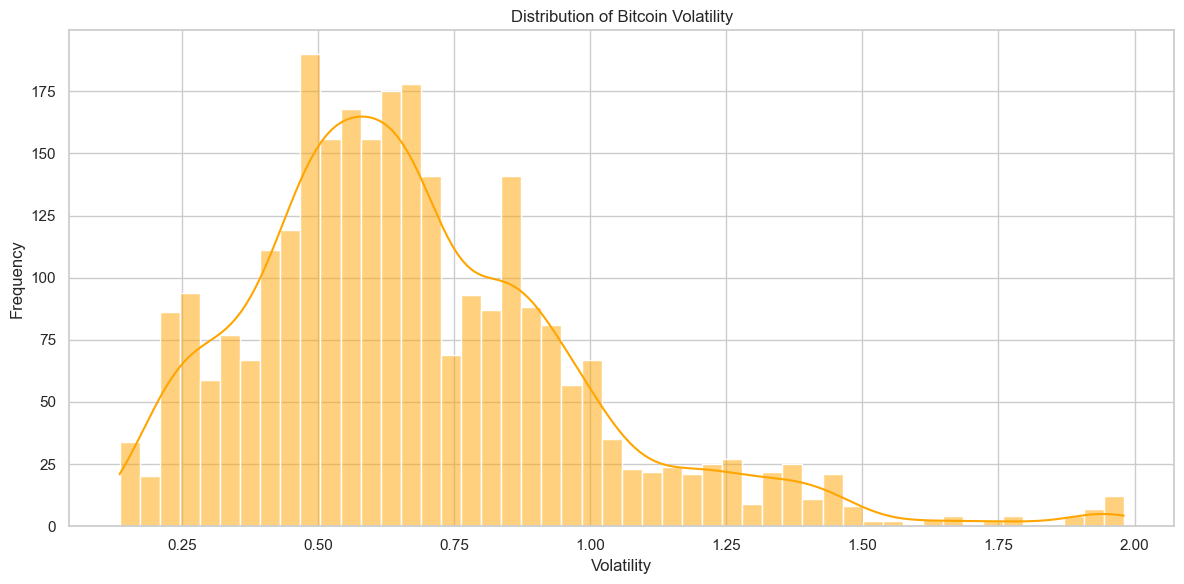

In [53]:
# Analyze distribution of volatility in our data

plt.figure(figsize=(12, 6))
sns.histplot(df_train["Volatility"], bins=50, kde=True, color="orange")
plt.title("Distribution of Bitcoin Volatility")
plt.xlabel("Volatility")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

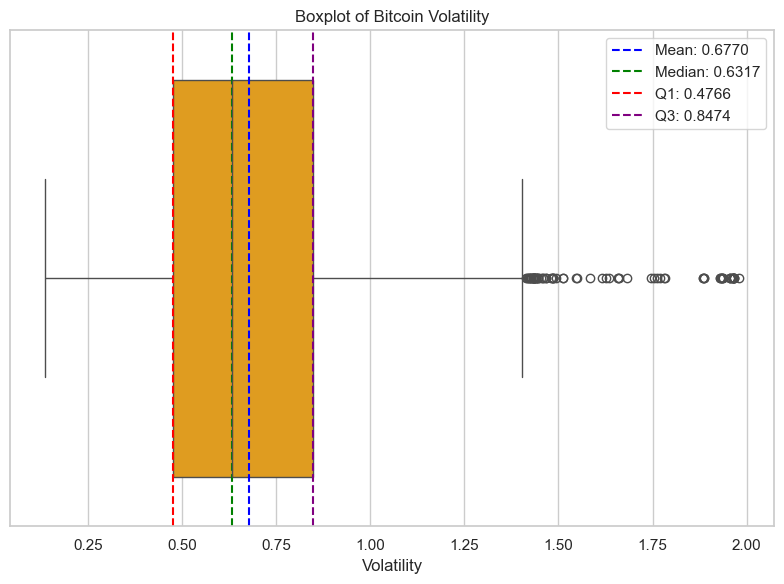

In [54]:
# Boxplot to visualize volatility distribution and identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_train["Volatility"], color="orange")
plt.title("Boxplot of Bitcoin Volatility")

# Add lines for mean, median, and quantiles
mean_volatility = df_train["Volatility"].mean()
median_volatility = df_train["Volatility"].median()
q1_volatility = df_train["Volatility"].quantile(0.25)
q3_volatility = df_train["Volatility"].quantile(0.75)

plt.axvline(
    mean_volatility, color="blue", linestyle="--", label=f"Mean: {mean_volatility:.4f}"
)
plt.axvline(
    median_volatility,
    color="green",
    linestyle="--",
    label=f"Median: {median_volatility:.4f}",
)
plt.axvline(
    q1_volatility, color="red", linestyle="--", label=f"Q1: {q1_volatility:.4f}"
)
plt.axvline(
    q3_volatility, color="purple", linestyle="--", label=f"Q3: {q3_volatility:.4f}"
)
plt.legend()

plt.xlabel("Volatility")
plt.tight_layout()
plt.show()

Based on the percentiles of the volatility distribution in the training set, we can set the following thresholds:

- **Low Volatility**: 0-0.40
- **Normal Volatility**: 0.40-0.65
- **High Volatility**: >0.65

I choose these thresholds based not only on the distribution of volatility in the training set but also on practical considerations and some articles.

There is nice article:

- [Understanding Volatility in Cryptocurrencies](https://www.postfinance.ch/en/blog/investing-in-simple-terms/understanding-volatility-cryptocurrencies.html)



In [55]:
THRESHOLDS = {
    "Low": 0.40,
    "Normal": 0.65,
    "High": np.inf,
}  # Thresholds based distribution analysis and online research on typical Bitcoin volatility levels


def classify_volatility(vol: float) -> str:
    """
    Classify volatility into 'Low', 'Normal', or 'High' based on predefined thresholds.
     Args:
        vol (float): The volatility value to classify.
    Returns:
        str: The volatility class ('Low', 'Normal', or 'High').
    """
    if vol <= THRESHOLDS["Low"]:
        return "Low"
    elif vol <= THRESHOLDS["Normal"]:
        return "Normal"
    else:
        return "High"


df_train = df_train.copy()
df_val = df_val.copy()
df_test = df_test.copy()

# Create classification target variable
df_train["Volatility_Class"] = df_train["Volatility"].apply(classify_volatility)
df_val["Volatility_Class"] = df_val["Volatility"].apply(classify_volatility)
df_test["Volatility_Class"] = df_test["Volatility"].apply(classify_volatility)

In [56]:
# Apply to validation set
df_val["Volatility_Class"] = df_val["Volatility"].apply(classify_volatility)
print("Volatility Class Distribution in Validation Set:")
print(df_val["Volatility_Class"].value_counts() / len(df_val))

Volatility Class Distribution in Validation Set:
Volatility_Class
Normal    0.500000
Low       0.334983
High      0.165017
Name: count, dtype: float64


In [57]:
# Apply to test set
df_test["Volatility_Class"] = df_test["Volatility"].apply(classify_volatility)

### 2. Create a new target variable `Volatility_Future_Class` based on the defined thresholds

In [58]:
# Define mapping for class labels
MAPPING = {"Low": 0, "Normal": 1, "High": 2}

In [59]:
# Map current volatility classes to numbers - new feature
df_train["Volatility_Class_Num"] = df_train["Volatility_Class"].map(MAPPING)
df_val["Volatility_Class_Num"] = df_val["Volatility_Class"].map(MAPPING)
df_test["Volatility_Class_Num"] = df_test["Volatility_Class"].map(MAPPING)

# Create new target variable for future volatility class
df_train["Volatility_Future_Class"] = df_train["Volatility_Future"].apply(
    classify_volatility
)
df_val["Volatility_Future_Class"] = df_val["Volatility_Future"].apply(
    classify_volatility
)
df_test["Volatility_Future_Class"] = df_test["Volatility_Future"].apply(
    classify_volatility
)

# Drop previous target variable to avoid confusion
df_train = df_train.drop(columns=["Volatility_Future"])
df_val = df_val.drop(columns=["Volatility_Future"])
df_test = df_test.drop(columns=["Volatility_Future"])

In [60]:
# Create encoded target variables for classification and features
X_train = df_train.drop(columns=["Volatility_Future_Class"])
X_val = df_val.drop(columns=["Volatility_Future_Class"])
X_test = df_test.drop(columns=["Volatility_Future_Class"])


y_train_class = df_train["Volatility_Future_Class"].map(MAPPING)
y_val_class = df_val["Volatility_Future_Class"].map(MAPPING)
y_test_class = df_test["Volatility_Future_Class"].map(MAPPING)

In [61]:
# Print class distribution
print("\n" + "=" * 80)
print("CLASSIFICATION TARGET DISTRIBUTION")
print("=" * 80)
print("\nTraining Set:")
print(pd.Series(y_train_class).value_counts(normalize=True).sort_index())
print(f"\nClass mapping: {MAPPING}")

print("\nValidation Set:")
print(pd.Series(y_val_class).value_counts(normalize=True).sort_index())

print("\nTest Set:")
print(pd.Series(y_test_class).value_counts(normalize=True).sort_index())


CLASSIFICATION TARGET DISTRIBUTION

Training Set:
Volatility_Future_Class
0    0.160891
1    0.370226
2    0.468883
Name: proportion, dtype: float64

Class mapping: {'Low': 0, 'Normal': 1, 'High': 2}

Validation Set:
Volatility_Future_Class
0    0.334983
1    0.516502
2    0.148515
Name: proportion, dtype: float64

Test Set:
Volatility_Future_Class
0    0.441516
1    0.479407
2    0.079077
Name: proportion, dtype: float64


We can see that the distribution of volatility classes is unbalanced and different in train, validation and test sets. This is expected as volatility is a non-stationary variable and can change over time. We will need to take this into account when training our classification models. We may set class weight to "balanced" to give more importance to minority classes.

#### Update feature sets - include the current volatility class as a feature

In [62]:
# FEATURE SETS WITH LOOKBACK DAYS

FEATURE_SETS = {
    "minimal": {
        "features": [
            "Close",
            "Volume",
            "Low_High_Diff",
            "Open_Close_Diff",
            "Open_Close_Up",
            "Month_Sin",
            "Month_Cos",
            "DayOfWeek_Sin",
            "DayOfWeek_Cos",
        ],
        "lookback_days": 1,
    },
    "price_only": {
        "features": [
            "Close",
            "Volume",
            "Return",
            "Log_Return",
            "Price_Diff",
            "Low_High_Diff",
            "Open_Close_Diff",
            "Open_Close_Up",
            "Close_Lag1",
            "Close_Lag5",
            "Close_Lag7",
            "Close_Lag30",
            "Return_Lag1",
            "Return_Lag5",
            "Return_Lag7",
            "Return_Lag30",
            "SMA_30",
            "Rolling_Mean_Return_30",
            "Rolling_Std_Return_30",
            "Close_Change_5d",
            "Close_Change_10d",
            "Close_Change_20d",
            "MACD",
            "RSI",
            "Month_Sin",
            "Month_Cos",
            "DayOfWeek_Sin",
            "DayOfWeek_Cos",
        ],
        "lookback_days": 35,
    },
    "volatility_only": {
        "features": [
            "Volatility",
            "Volatility_Class_Num",
            "Parkinson_Volatility",
            "Garman_Klass_Volatility",
            "Roger_Satchel_Volatility",
            "Volatility_Lag1",
            "Volatility_Lag7",
            "Volatility_Lag14",
            "Volatility_Lag30",
            "Volatility_MA_7",
            "Volatility_MA_14",
            "Volatility_MA_30",
            "Volatility_STD_7",
            "Volatility_STD_14",
            "Volatility_STD_30",
            "Volatility_Change",
            "Volatility_Change_7d",
            "Volatility_Change_14d",
            "Volatility_Change_30d",
            "Volatility_Momentum",
        ],
        "lookback_days": 61,
    },
    "short_volatility_only": {
        "features": [
            "Volatility",
            "Volatility_Class_Num",
            "Parkinson_Volatility",
            "Garman_Klass_Volatility",
            "Roger_Satchel_Volatility",
            "Volatility_Lag1",
            "Volatility_Lag7",
            "Volatility_Lag14",
            "Volatility_MA_7",
            "Volatility_MA_14",
            "Volatility_STD_7",
            "Volatility_STD_14",
            "Volatility_Change",
            "Volatility_Change_7d",
            "Volatility_Change_14d",
        ],
        "lookback_days": 45,
    },
    "simple_vol": {
        "features": [
            "Close",
            "Volume",
            "Return",
            "Log_Return",
            "Close_Lag7",
            "Close_Lag30",
            "Return_Lag7",
            "Return_Lag30",
            "SMA_30",
            "RSI",
            "Month_Sin",
            "Month_Cos",
            "DayOfWeek_Sin",
            "DayOfWeek_Cos",
            "Volatility",
            "Volatility_Class_Num",
            "Volatility_Lag7",
            "Volatility_Lag14",
        ],
        "lookback_days": 45,
    },
    "base": {
        "features": [
            "Close",
            "Volume",
            "Return",
            "Log_Return",
            "Price_Diff",
            "Low_High_Diff",
            "Open_Close_Diff",
            "Open_Close_Up",
            "Close_Lag1",
            "Close_Lag5",
            "Close_Lag7",
            "Close_Lag30",
            "Return_Lag1",
            "Return_Lag5",
            "Return_Lag7",
            "Return_Lag30",
            "SMA_30",
            "Rolling_Mean_Return_30",
            "Rolling_Std_Return_30",
            "Close_Change_5d",
            "Close_Change_10d",
            "Close_Change_20d",
            "MACD",
            "RSI",
            "Month_Sin",
            "Month_Cos",
            "DayOfWeek_Sin",
            "DayOfWeek_Cos",
            "Volatility",
            "Volatility_Class_Num",
            "Parkinson_Volatility",
            "Garman_Klass_Volatility",
            "Roger_Satchel_Volatility",
        ],
        "lookback_days": 35,
    },
    "base_single_vol": {
        "features": [
            "Close",
            "Volume",
            "Return",
            "Log_Return",
            "Price_Diff",
            "Low_High_Diff",
            "Open_Close_Diff",
            "Open_Close_Up",
            "Close_Lag1",
            "Close_Lag5",
            "Close_Lag7",
            "Close_Lag30",
            "Return_Lag1",
            "Return_Lag5",
            "Return_Lag7",
            "Return_Lag30",
            "SMA_30",
            "Rolling_Mean_Return_30",
            "Rolling_Std_Return_30",
            "Close_Change_5d",
            "Close_Change_10d",
            "Close_Change_20d",
            "MACD",
            "RSI",
            "Month_Sin",
            "Month_Cos",
            "DayOfWeek_Sin",
            "DayOfWeek_Cos",
            "Volatility",
            "Volatility_Class_Num",
        ],
        "lookback_days": 35,
    },
    "base_with_short_vol": {
        "features": [
            "Close",
            "Volume",
            "Return",
            "Log_Return",
            "Price_Diff",
            "Low_High_Diff",
            "Open_Close_Diff",
            "Open_Close_Up",
            "Close_Lag1",
            "Close_Lag5",
            "Close_Lag7",
            "Close_Lag30",
            "Return_Lag1",
            "Return_Lag5",
            "Return_Lag7",
            "Return_Lag30",
            "SMA_30",
            "Rolling_Mean_Return_30",
            "Rolling_Std_Return_30",
            "Close_Change_5d",
            "Close_Change_10d",
            "Close_Change_20d",
            "MACD",
            "RSI",
            "Month_Sin",
            "Month_Cos",
            "DayOfWeek_Sin",
            "DayOfWeek_Cos",
            "Volatility",
            "Volatility_Class_Num",
            "Parkinson_Volatility",
            "Garman_Klass_Volatility",
            "Roger_Satchel_Volatility",
            "Volatility_Lag1",
            "Volatility_Lag7",
            "Volatility_MA_7",
            "Volatility_STD_7",
            "Volatility_Change",
            "Volatility_Change_7d",
        ],
        "lookback_days": 38,
    },
    "compact_vol": {
        "features": [
            "Close",
            "Volume",
            "Return",
            "Log_Return",
            "Close_Lag7",
            "Close_Lag30",
            "Return_Lag7",
            "Return_Lag30",
            "SMA_30",
            "Rolling_Std_Return_30",
            "MACD",
            "RSI",
            "Month_Sin",
            "Month_Cos",
            "DayOfWeek_Sin",
            "DayOfWeek_Cos",
            "Volatility",
            "Volatility_Class_Num",
            "Volatility_Lag7",
            "Volatility_Lag14",
            "Volatility_MA_7",
            "Volatility_MA_14",
            "Volatility_STD_7",
            "Volatility_STD_14",
            "Volatility_Change_7d",
            "Volatility_Change_14d",
        ],
        "lookback_days": 45,
    },
    "base_with_medium_vol": {
        "features": [
            "Close",
            "Volume",
            "Return",
            "Log_Return",
            "Price_Diff",
            "Low_High_Diff",
            "Open_Close_Diff",
            "Open_Close_Up",
            "Close_Lag1",
            "Close_Lag5",
            "Close_Lag7",
            "Close_Lag30",
            "Return_Lag1",
            "Return_Lag5",
            "Return_Lag7",
            "Return_Lag30",
            "SMA_30",
            "Rolling_Mean_Return_30",
            "Rolling_Std_Return_30",
            "Close_Change_5d",
            "Close_Change_10d",
            "Close_Change_20d",
            "MACD",
            "RSI",
            "Month_Sin",
            "Month_Cos",
            "DayOfWeek_Sin",
            "DayOfWeek_Cos",
            "Volatility",
            "Volatility_Class_Num",
            "Parkinson_Volatility",
            "Garman_Klass_Volatility",
            "Roger_Satchel_Volatility",
            "Volatility_Lag1",
            "Volatility_Lag7",
            "Volatility_Lag14",
            "Volatility_MA_7",
            "Volatility_MA_14",
            "Volatility_STD_7",
            "Volatility_STD_14",
            "Volatility_Change",
            "Volatility_Change_7d",
            "Volatility_Change_14d",
        ],
        "lookback_days": 45,
    },
    "base_with_long_vol": {
        "features": [
            "Close",
            "Volume",
            "Return",
            "Log_Return",
            "Price_Diff",
            "Low_High_Diff",
            "Open_Close_Diff",
            "Open_Close_Up",
            "Close_Lag1",
            "Close_Lag5",
            "Close_Lag7",
            "Close_Lag30",
            "Return_Lag1",
            "Return_Lag5",
            "Return_Lag7",
            "Return_Lag30",
            "SMA_30",
            "Rolling_Mean_Return_30",
            "Rolling_Std_Return_30",
            "Close_Change_5d",
            "Close_Change_10d",
            "Close_Change_20d",
            "MACD",
            "RSI",
            "Month_Sin",
            "Month_Cos",
            "DayOfWeek_Sin",
            "DayOfWeek_Cos",
            "Volatility",
            "Volatility_Class_Num",
            "Parkinson_Volatility",
            "Garman_Klass_Volatility",
            "Roger_Satchel_Volatility",
            "Volatility_Lag7",
            "Volatility_Lag14",
            "Volatility_Lag30",
            "Volatility_MA_14",
            "Volatility_MA_30",
            "Volatility_STD_7",
            "Volatility_STD_14",
            "Volatility_STD_30",
            "Volatility_Change",
            "Volatility_Change_7d",
            "Volatility_Change_14d",
            "Volatility_Change_30d",
            "Volatility_Momentum",
        ],
        "lookback_days": 61,
    },
    "all_features": {
        "features": [
            "Close",
            "Volume",
            "Return",
            "Log_Return",
            "Price_Diff",
            "Low_High_Diff",
            "Open_Close_Diff",
            "Open_Close_Up",
            "Close_Lag1",
            "Close_Lag5",
            "Close_Lag7",
            "Close_Lag30",
            "Return_Lag1",
            "Return_Lag5",
            "Return_Lag7",
            "Return_Lag30",
            "SMA_30",
            "Rolling_Mean_Return_30",
            "Rolling_Std_Return_30",
            "Close_Change_5d",
            "Close_Change_10d",
            "Close_Change_20d",
            "MACD",
            "RSI",
            "Month_Sin",
            "Month_Cos",
            "DayOfWeek_Sin",
            "DayOfWeek_Cos",
            "Volatility",
            "Volatility_Class_Num",
            "Parkinson_Volatility",
            "Garman_Klass_Volatility",
            "Roger_Satchel_Volatility",
            "Volatility_Lag1",
            "Volatility_Lag7",
            "Volatility_Lag14",
            "Volatility_Lag30",
            "Volatility_MA_7",
            "Volatility_MA_14",
            "Volatility_MA_30",
            "Volatility_STD_7",
            "Volatility_STD_14",
            "Volatility_STD_30",
            "Volatility_Change",
            "Volatility_Change_7d",
            "Volatility_Change_14d",
            "Volatility_Change_30d",
            "Volatility_Momentum",
        ],
        "lookback_days": 61,
    },
}

### 3. Building Baseline Models

#### 1. Baseline 1: Majority Class Classifier

In [63]:
from sklearn.dummy import DummyClassifier

# Baseline 1 - Majority Class Classifier
majority_baseline = DummyClassifier(strategy="most_frequent", random_state=RANDOM_SEED)
majority_baseline.fit(X_train, y_train_class)

y_pred_train_majority = majority_baseline.predict(X_train)
y_pred_val_majority = majority_baseline.predict(X_val)

metrics_train_majority = calculate_classification_metrics(
    y_train_class, y_pred_train_majority, mapping=MAPPING
)
metrics_val_majority = calculate_classification_metrics(
    y_val_class, y_pred_val_majority, mapping=MAPPING
)

print("\nBaseline 1: Majority Class Classifier")
print(
    f"  Always predicts class: {majority_baseline.classes_[0]} ({list(MAPPING.keys())[list(MAPPING.values()).index(majority_baseline.classes_[0])]})"
)
print("\nValidation Set Metrics:")
for metric, value in metrics_val_majority.items():
    print(f"  Val {metric}: {value:.4f}")

CLASSIFICATION_MODEL_RESULTS["Baseline_Majority"] = {
    "model": "Majority Class Baseline",
    "feature_set": "None",
    "features": [],
    "train_metrics": metrics_train_majority,
    "val_metrics": metrics_val_majority,
}


Baseline 1: Majority Class Classifier
  Always predicts class: 0 (Low)

Validation Set Metrics:
  Val Accuracy: 0.1485
  Val Precision_Macro: 0.0495
  Val Recall_Macro: 0.3333
  Val F1_Macro: 0.0862
  Val Precision_Weighted: 0.0221
  Val Recall_Weighted: 0.1485
  Val F1_Weighted: 0.0384
  Val Precision_Low: 0.0000
  Val Recall_Low: 0.0000
  Val F1_Low: 0.0000
  Val Precision_Normal: 0.0000
  Val Recall_Normal: 0.0000
  Val F1_Normal: 0.0000
  Val Precision_High: 0.1485
  Val Recall_High: 1.0000
  Val F1_High: 0.2586


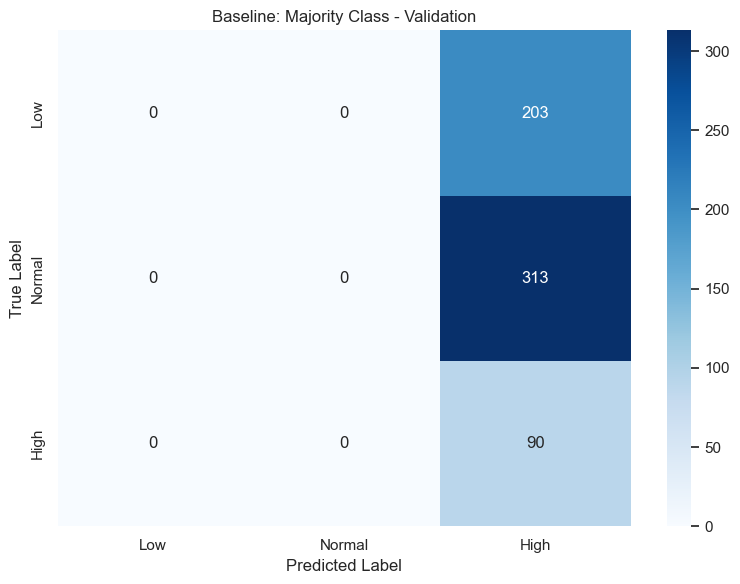


Classification Report:
              precision    recall  f1-score   support

         Low       0.00      0.00      0.00       203
      Normal       0.00      0.00      0.00       313
        High       0.15      1.00      0.26        90

    accuracy                           0.15       606
   macro avg       0.05      0.33      0.09       606
weighted avg       0.02      0.15      0.04       606



/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with 

In [64]:
plot_confusion_matrix(
    y_val_class,
    y_pred_val_majority,
    mapping=MAPPING,
    title="Baseline: Majority Class - Validation",
)

#### 2. Baseline 2: Stratified Random Classifier

In [65]:
# Baseline 2: Stratified Random (Random predictions matching class distribution)

stratified_baseline = DummyClassifier(strategy="stratified", random_state=RANDOM_SEED)
stratified_baseline.fit(X_train, y_train_class)

y_pred_train_strat = stratified_baseline.predict(X_train)
y_pred_val_strat = stratified_baseline.predict(X_val)

metrics_train_strat = calculate_classification_metrics(
    y_train_class, y_pred_train_strat, mapping=MAPPING
)
metrics_val_strat = calculate_classification_metrics(
    y_val_class, y_pred_val_strat, mapping=MAPPING
)

print("\nBaseline 2: Stratified Random Classifier")
print(f"  Predicts classes randomly but respects training set class distribution")
print(f" Validation Metrics:")
for metric, value in metrics_val_strat.items():
    print(f"  Val {metric}: {value:.4f}")

CLASSIFICATION_MODEL_RESULTS["Baseline_Stratified"] = {
    "model": "Stratified Random Baseline",
    "feature_set": "None",
    "features": [],
    "train_metrics": metrics_train_strat,
    "val_metrics": metrics_val_strat,
}


Baseline 2: Stratified Random Classifier
  Predicts classes randomly but respects training set class distribution
 Validation Metrics:
  Val Accuracy: 0.3185
  Val Precision_Macro: 0.3406
  Val Recall_Macro: 0.3371
  Val F1_Macro: 0.2973
  Val Precision_Weighted: 0.4090
  Val Recall_Weighted: 0.3185
  Val F1_Weighted: 0.3350
  Val Precision_Low: 0.3529
  Val Recall_Low: 0.1773
  Val F1_Low: 0.2361
  Val Precision_Normal: 0.5204
  Val Recall_Normal: 0.3674
  Val F1_Normal: 0.4307
  Val Precision_High: 0.1484
  Val Recall_High: 0.4667
  Val F1_High: 0.2252


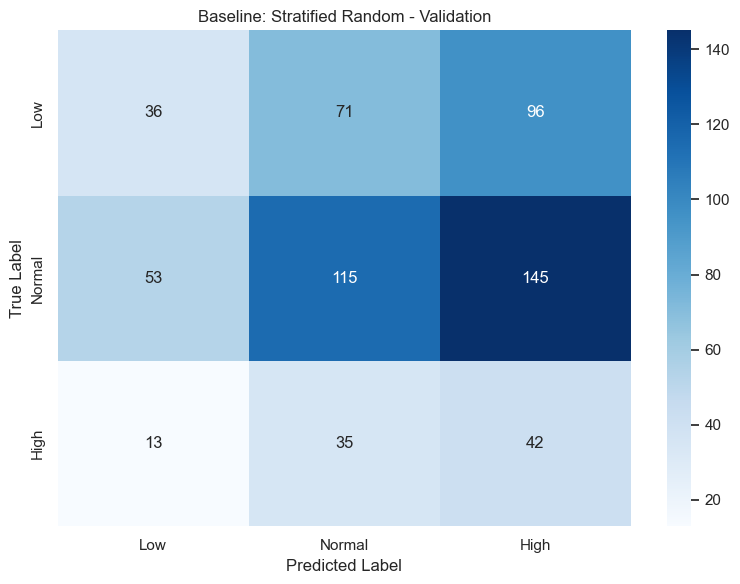


Classification Report:
              precision    recall  f1-score   support

         Low       0.35      0.18      0.24       203
      Normal       0.52      0.37      0.43       313
        High       0.15      0.47      0.23        90

    accuracy                           0.32       606
   macro avg       0.34      0.34      0.30       606
weighted avg       0.41      0.32      0.33       606



In [66]:
plot_confusion_matrix(
    y_val_class,
    y_pred_val_strat,
    mapping=MAPPING,
    title="Baseline: Stratified Random - Validation",
)

#### 3. Baseline 3: Current Volatility Class (Naive Persistence)

In [67]:
# BASELINE 3: PERSISTENCE (Predict same class as current volatility)

# Predict that future volatility class = current volatility class
y_pred_train_persist = df_train["Volatility_Class_Num"]
y_pred_val_persist = df_val["Volatility_Class_Num"]

metrics_train_persist = calculate_classification_metrics(
    y_train_class, y_pred_train_persist, mapping=MAPPING
)
metrics_val_persist = calculate_classification_metrics(
    y_val_class, y_pred_val_persist, mapping=MAPPING
)

print("\nBaseline 3: Persistence (Naive) Classifier")
print(f"  Assumes future class = current class")

print("\nValidation Set Metrics:")
for metric, value in metrics_val_persist.items():
    print(f"  Val {metric}: {value:.4f}")

CLASSIFICATION_MODEL_RESULTS["Baseline_Persistence"] = {
    "model": "Persistence Baseline",
    "feature_set": "Current Volatility",
    "features": ["Volatility"],
    "train_metrics": metrics_train_persist,
    "val_metrics": metrics_val_persist,
}


Baseline 3: Persistence (Naive) Classifier
  Assumes future class = current class

Validation Set Metrics:
  Val Accuracy: 0.3746
  Val Precision_Macro: 0.2923
  Val Recall_Macro: 0.2881
  Val F1_Macro: 0.2901
  Val Precision_Weighted: 0.3827
  Val Recall_Weighted: 0.3746
  Val F1_Weighted: 0.3786
  Val Precision_Low: 0.3054
  Val Recall_Low: 0.3054
  Val F1_Low: 0.3054
  Val Precision_Normal: 0.5314
  Val Recall_Normal: 0.5144
  Val F1_Normal: 0.5227
  Val Precision_High: 0.0400
  Val Recall_High: 0.0444
  Val F1_High: 0.0421


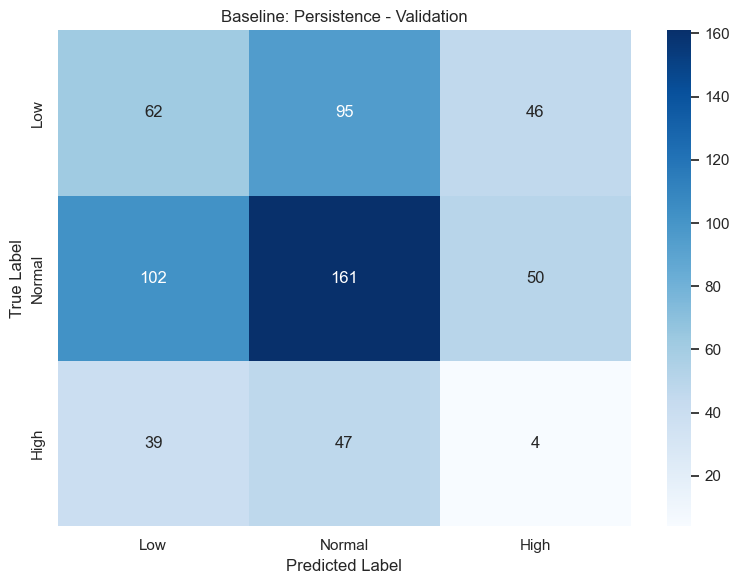


Classification Report:
              precision    recall  f1-score   support

         Low       0.31      0.31      0.31       203
      Normal       0.53      0.51      0.52       313
        High       0.04      0.04      0.04        90

    accuracy                           0.37       606
   macro avg       0.29      0.29      0.29       606
weighted avg       0.38      0.37      0.38       606



In [68]:
plot_confusion_matrix(
    y_val_class,
    y_pred_val_persist,
    mapping=MAPPING,
    title="Baseline: Persistence - Validation",
)

#### 4. Comparison of Baseline Models and Setting a benchmark for further models

                     Model  Train_Accuracy  Val_Accuracy  Train_F1_Macro  Val_F1_Macro  Val_F1_Low  Val_F1_Normal  Val_F1_High
Stratified Random Baseline        0.375530      0.318482        0.325033      0.297326    0.236066       0.430712     0.225201
      Persistence Baseline        0.468175      0.374587        0.441215      0.290084    0.305419       0.522727     0.042105
   Majority Class Baseline        0.468883      0.148515        0.212807      0.086207    0.000000       0.000000     0.258621

BEST BASELINE: Stratified Random Baseline
   Val F1 Macro: 0.2973
   Val Accuracy: 0.3185


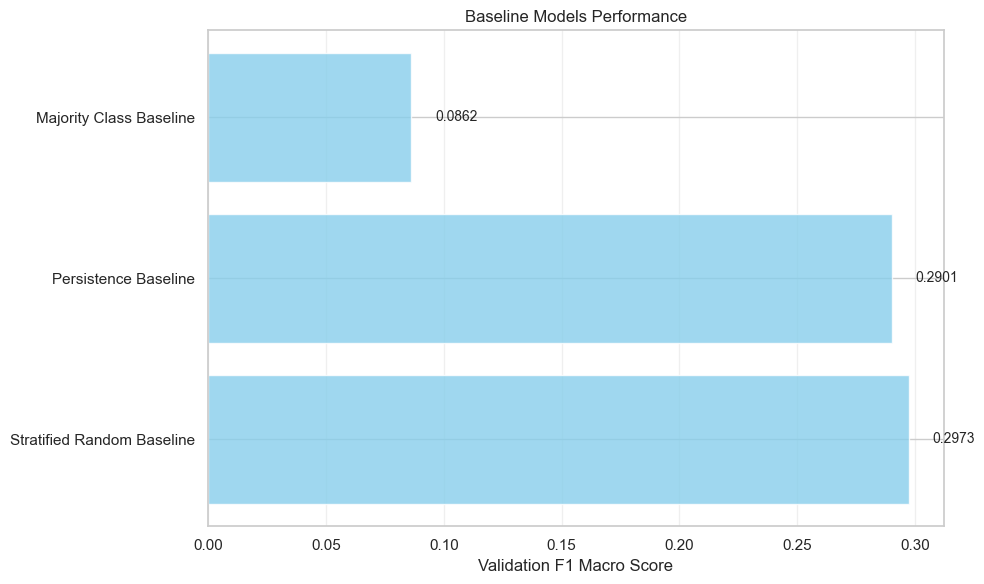

In [69]:
baseline_models = ["Baseline_Majority", "Baseline_Stratified", "Baseline_Persistence"]

baseline_data = []
for model_name in baseline_models:
    if model_name in CLASSIFICATION_MODEL_RESULTS:
        result = CLASSIFICATION_MODEL_RESULTS[model_name]
        baseline_data.append(
            {
                "Model": result["model"],
                "Train_Accuracy": result["train_metrics"]["Accuracy"],
                "Val_Accuracy": result["val_metrics"]["Accuracy"],
                "Train_F1_Macro": result["train_metrics"]["F1_Macro"],
                "Val_F1_Macro": result["val_metrics"]["F1_Macro"],
                "Val_F1_Low": result["val_metrics"]["F1_Low"],
                "Val_F1_Normal": result["val_metrics"]["F1_Normal"],
                "Val_F1_High": result["val_metrics"]["F1_High"],
            }
        )

baseline_df = pd.DataFrame(baseline_data).sort_values("Val_F1_Macro", ascending=False)
print(baseline_df.to_string(index=False))

print(f"\nBEST BASELINE: {baseline_df.iloc[0]['Model']}")
print(f"   Val F1 Macro: {baseline_df.iloc[0]['Val_F1_Macro']:.4f}")
print(f"   Val Accuracy: {baseline_df.iloc[0]['Val_Accuracy']:.4f}")

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))

models = baseline_df["Model"]
val_f1 = baseline_df["Val_F1_Macro"]

bars = ax.barh(models, val_f1, color="skyblue", alpha=0.8)
ax.set_xlabel("Validation F1 Macro Score")
ax.set_title("Baseline Models Performance")
ax.grid(axis="x", alpha=0.3)

# Add value labels
for i, (bar, val) in enumerate(zip(bars, val_f1)):
    ax.text(val + 0.01, i, f"{val:.4f}", va="center", fontsize=10)

plt.tight_layout()
plt.show()

### 4. Building Machine Learning Classification Models

#### 1. Logistic Regression

In [70]:
X_train

Close          High           Low          Open    Return  \
Date                                                                           
2014-12-16    327.062012    345.859009    327.062012    345.673004 -0.052941   
2014-12-17    319.776001    333.954010    315.152008    326.855011 -0.022277   
2014-12-18    311.395996    323.709015    304.231995    319.785004 -0.026206   
2014-12-19    317.842987    318.532990    306.769012    311.178986  0.020704   
2014-12-20    329.955994    330.325012    316.044006    317.618988  0.038110   
...                  ...           ...           ...           ...       ...   
2022-09-08  19329.833984  19417.351562  19076.714844  19289.941406  0.002048   
2022-09-09  21381.152344  21439.410156  19310.962891  19328.140625  0.106122   
2022-09-10  21680.539062  21760.275391  21168.722656  21376.912109  0.014002   
2022-09-11  21769.255859  21770.552734  21406.945312  21678.542969  0.004092   
2022-09-12  22370.449219  22439.181641  21603.896484  21770.148438  0.027617   

            Log_Return   Price_Diff       Volume    Close_Lag1    Close_Lag5  \
Date                                                                           
2014-12-16   -0.054394   -18.282990     30864900    345.345001    350.506012   
2014-12-17   -0.022529    -7.286011     37567900    327.062012    352.541992   
2014-12-18   -0.026555    -8.380005     39173000    319.776001    347.376007   
2014-12-19    0.020492     6.446991     23823100    311.395996    351.631989   
2014-12-20    0.037402    12.113007     20856700    317.842987    345.345001   
...                ...          ...          ...           ...           ...   
2022-09-08    0.002046    39.509766  32194477850  19290.324219  19832.087891   
2022-09-09    0.100860  2051.318359  48469528171  19329.833984  19986.712891   
2022-09-10    0.013905   299.386719  36913738894  21381.152344  19812.371094   
2022-09-11    0.004084    88.716797  34493951963  21680.539062  18837.667969   
2022-09-12    0.027242   601.193359  50212088965  21769.255859  19290.324219   

            ...  Volatility_Change  Volatility_Change_7d  \
Date        ...                                            
2014-12-16  ...           0.047266             -0.386971   
2014-12-17  ...           0.008493             -0.382570   
2014-12-18  ...          -0.008515             -0.389171   
2014-12-19  ...           0.010107             -0.092166   
2014-12-20  ...          -0.052746             -0.141766   
...         ...                ...                   ...   
2022-09-08  ...          -0.007832              0.003005   
2022-09-09  ...           0.192533              0.195859   
2022-09-10  ...           0.004400              0.201625   
2022-09-11  ...          -0.006443              0.219737   
2022-09-12  ...           0.013978              0.238768   

            Volatility_Change_14d  Volatility_Change_30d  Volatility_Momentum  \
Date                                                                            
2014-12-16              -0.394147              -0.435076            -0.260283   
2014-12-17              -0.392541              -0.427822            -0.245879   
2014-12-18              -0.400130              -0.438605            -0.238403   
2014-12-19              -0.391886              -0.432598            -0.223080   
2014-12-20              -0.419746              -0.481812            -0.233198   
...                           ...                    ...                  ...   
2022-09-08              -0.033360              -0.092056            -0.004401   
2022-09-09               0.209525               0.113614             0.097116   
2022-09-10               0.269972               0.152220             0.097101   
2022-09-11               0.255244               0.176481             0.089739   
2022-09-12               0.226518               0.195641             0.095154   

            Parkinson_to_HV_Ratio  GK_to_HV_Ratio  RS_to_HV_Ratio  \
Date                             

In [71]:
# Train Logistic Regression Classifier With Class Weights
lr_class_result = train_classifier_with_feature_sets(
    model=LogisticRegression(
        max_iter=1000,
        random_state=RANDOM_SEED,
        class_weight="balanced",  # Automatically handles imbalance
    ),
    model_name="Logistic Regression (Balanced)",
    feature_sets=FEATURE_SETS,
    X_train=X_train,
    y_train=y_train_class,
    X_val=X_val,
    y_val=y_val_class,
    mapping=MAPPING,
    metric="F1_Macro",  # Macro F1 is good for imbalanced data
    scale=True,
    verbose=True,
)
# Store best result
CLASSIFICATION_MODEL_RESULTS["Logistic_Regression"] = {
    "model": "Logistic Regression",
    "scaler": lr_class_result["best_scaler"],
    "feature_set": lr_class_result["best_feature_set_name"],
    "features": lr_class_result["best_features"],
    "train_metrics": lr_class_result["best_metrics"]["train"],
    "val_metrics": lr_class_result["best_metrics"]["val"],
}

# Print validation metrics for Logistic Regression
print("\nLogistic Regression Best Model Validation Metrics:")
for metric, value in lr_class_result["best_metrics"]["val"].items():
    print(f"  {metric}: {value:.6f}")


Training Logistic Regression (Balanced) with 12 feature sets
Optimizing for: F1_Macro
Scaling: Yes

Feature Set: minimal
  Features: 9, Lookback: 1 days
  Training F1_Macro: 0.4628
  Validation F1_Macro: 0.2708
  Val Accuracy: 0.3845

Feature Set: price_only
  Features: 28, Lookback: 35 days
  Training F1_Macro: 0.5300
  Validation F1_Macro: 0.2827
  Val Accuracy: 0.4571

Feature Set: volatility_only
  Features: 20, Lookback: 61 days
  Training F1_Macro: 0.5606
  Validation F1_Macro: 0.4923
  Val Accuracy: 0.5083

Feature Set: short_volatility_only
  Features: 15, Lookback: 45 days
  Training F1_Macro: 0.5387
  Validation F1_Macro: 0.3773
  Val Accuracy: 0.3911

Feature Set: simple_vol
  Features: 18, Lookback: 45 days
  Training F1_Macro: 0.5025
  Validation F1_Macro: 0.3205
  Val Accuracy: 0.4670

Feature Set: base
  Features: 33, Lookback: 35 days
  Training F1_Macro: 0.5991
  Validation F1_Macro: 0.2977
  Val Accuracy: 0.4455

Feature Set: base_single_vol
  Features: 30, Lookback:

In [72]:
compare_feature_sets_results(
    lr_class_result["all_results"], metric="F1_Macro", task="classification"
)

Feature_Set  N_Features  Lookback_Days  Train_F1_Macro  \
0         volatility_only          20             61        0.560574   
1   short_volatility_only          15             45        0.538749   
2             compact_vol          26             45        0.527631   
3              simple_vol          18             45        0.502471   
4            all_features          48             61        0.609548   
5      base_with_long_vol          46             61        0.604755   
6                    base          33             35        0.599124   
7     base_with_short_vol          39             38        0.598388   
8    base_with_medium_vol          43             45        0.597994   
9              price_only          28             35        0.529964   
10        base_single_vol          30             35        0.551679   
11                minimal           9              1        0.462827   

    Val_F1_Macro  Overfit_Gap  
0       0.492274    -0.068300  
1       0.377299    -0.161450  
2       0.325297    -0.202334  
3       0.320499    -0.181972  
4       0.314208    -0.295340  
5       0.303254    -0.301501  
6       0.297704    -0.301420  
7       0.291769    -0.306619  
8       0.291716    -0.306278  
9       0.282675    -0.247288  
10      0.273996    -0.277683  
11      0.270840    -0.191988

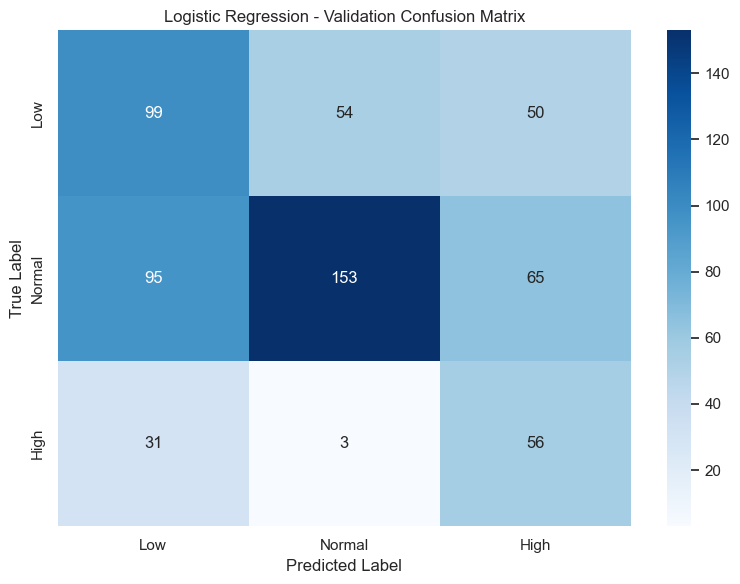


Classification Report:
              precision    recall  f1-score   support

         Low       0.44      0.49      0.46       203
      Normal       0.73      0.49      0.59       313
        High       0.33      0.62      0.43        90

    accuracy                           0.51       606
   macro avg       0.50      0.53      0.49       606
weighted avg       0.57      0.51      0.52       606



In [73]:
# Plot confusion matrix
plot_confusion_matrix(
    y_val_class,
    lr_class_result["best_model"].predict(
        lr_class_result["best_scaler"].transform(
            X_val[lr_class_result["best_features"]]
        )
    ),
    mapping=MAPPING,
    title="Logistic Regression - Validation Confusion Matrix",
)

#### 2. Random Forest Classifier

In [74]:
# Train Random Forest Classifier With Class Weights

rf_class_result = train_classifier_with_feature_sets(
    model=RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        random_state=RANDOM_SEED,
        n_jobs=-1,
        class_weight="balanced",  # Handles imbalance
    ),
    model_name="Random Forest Classifier (Balanced)",
    feature_sets=FEATURE_SETS,
    X_train=X_train,
    y_train=y_train_class,
    X_val=X_val,
    y_val=y_val_class,
    mapping=MAPPING,
    metric="F1_Macro",
    scale=False,
    verbose=True,
)
# Store best result
CLASSIFICATION_MODEL_RESULTS["Random_Forest_Classifier"] = {
    "model": "Random Forest Classifier",
    "feature_set": rf_class_result["best_feature_set_name"],
    "features": rf_class_result["best_features"],
    "train_metrics": rf_class_result["best_metrics"]["train"],
    "val_metrics": rf_class_result["best_metrics"]["val"],
}
# Print validation metrics for Random Forest Classifier
print("\nRandom Forest Classifier Best Model Validation Metrics:")
for metric, value in rf_class_result["best_metrics"]["val"].items():
    print(f"  {metric}: {value:.6f}")


Training Random Forest Classifier (Balanced) with 12 feature sets
Optimizing for: F1_Macro
Scaling: No

Feature Set: minimal
  Features: 9, Lookback: 1 days
  Training F1_Macro: 0.9422
  Validation F1_Macro: 0.1684
  Val Accuracy: 0.2162

Feature Set: price_only
  Features: 28, Lookback: 35 days
  Training F1_Macro: 0.9855
  Validation F1_Macro: 0.1153
  Val Accuracy: 0.1452

Feature Set: volatility_only
  Features: 20, Lookback: 61 days
  Training F1_Macro: 0.9646
  Validation F1_Macro: 0.2848
  Val Accuracy: 0.2822

Feature Set: short_volatility_only
  Features: 15, Lookback: 45 days
  Training F1_Macro: 0.9571
  Validation F1_Macro: 0.2480
  Val Accuracy: 0.2508

Feature Set: simple_vol
  Features: 18, Lookback: 45 days
  Training F1_Macro: 0.9837
  Validation F1_Macro: 0.1421
  Val Accuracy: 0.1832

Feature Set: base
  Features: 33, Lookback: 35 days
  Training F1_Macro: 0.9846
  Validation F1_Macro: 0.1748
  Val Accuracy: 0.2343

Feature Set: base_single_vol
  Features: 30, Lookb

In [75]:
comparison_df = compare_feature_sets_results(
    rf_class_result["all_results"], metric="F1_Macro", task="classification"
)
comparison_df

Feature_Set  N_Features  Lookback_Days  Train_F1_Macro  \
0         volatility_only          20             61        0.964635   
1   short_volatility_only          15             45        0.957140   
2     base_with_short_vol          39             38        0.988755   
3                    base          33             35        0.984642   
4             compact_vol          26             45        0.990210   
5    base_with_medium_vol          43             45        0.989244   
6                 minimal           9              1        0.942199   
7            all_features          48             61        0.986366   
8              simple_vol          18             45        0.983739   
9      base_with_long_vol          46             61        0.986978   
10             price_only          28             35        0.985511   
11        base_single_vol          30             35        0.983205   

    Val_F1_Macro  Overfit_Gap  
0       0.284801    -0.679835  
1       0.248017    -0.709123  
2       0.183896    -0.804859  
3       0.174805    -0.809837  
4       0.173200    -0.817010  
5       0.170680    -0.818564  
6       0.168399    -0.773800  
7       0.154958    -0.831408  
8       0.142112    -0.841627  
9       0.136568    -0.850409  
10      0.115347    -0.870165  
11      0.108335    -0.874871

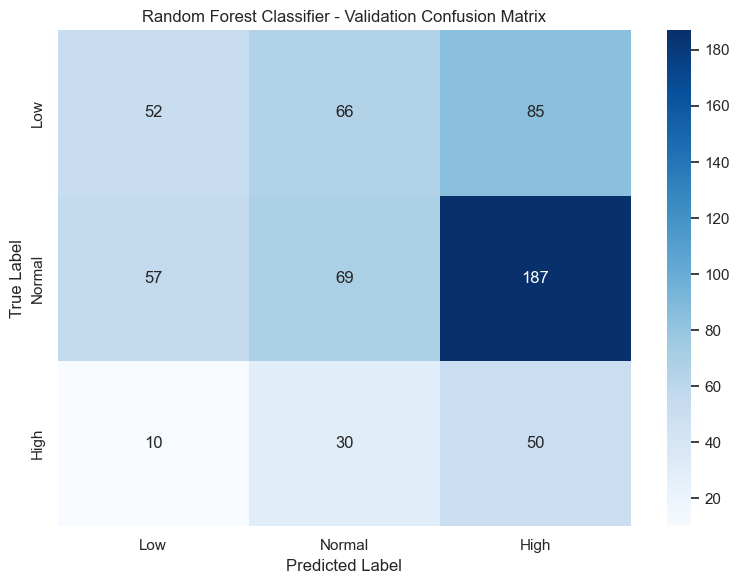


Classification Report:
              precision    recall  f1-score   support

         Low       0.44      0.26      0.32       203
      Normal       0.42      0.22      0.29       313
        High       0.16      0.56      0.24        90

    accuracy                           0.28       606
   macro avg       0.34      0.34      0.28       606
weighted avg       0.39      0.28      0.29       606



In [76]:
plot_confusion_matrix(
    y_val_class,
    rf_class_result["best_model"].predict(X_val[rf_class_result["best_features"]]),
    mapping=MAPPING,
    title="Random Forest Classifier - Validation Confusion Matrix",
)

#### 3. XGBoost Classifier

In [77]:
# Train XGBoost Classifier

xgb_class_result = train_classifier_with_feature_sets(
    model=xgb.XGBClassifier(
        random_state=RANDOM_SEED,
        n_jobs=-1,
        eval_metric="mlogloss",
    ),
    model_name="XGBoost Classifier (Weighted)",
    feature_sets=FEATURE_SETS,
    X_train=X_train,
    y_train=y_train_class,
    X_val=X_val,
    y_val=y_val_class,
    mapping=MAPPING,
    metric="F1_Macro",
    scale=False,
    verbose=True,
)
# Store best result
CLASSIFICATION_MODEL_RESULTS["XGBoost_Classifier"] = {
    "model": "XGBoost Classifier",
    "feature_set": xgb_class_result["best_feature_set_name"],
    "features": xgb_class_result["best_features"],
    "train_metrics": xgb_class_result["best_metrics"]["train"],
    "val_metrics": xgb_class_result["best_metrics"]["val"],
}
# Print validation metrics for XGBoost Classifier
print("\nXGBoost Classifier Best Model Validation Metrics:")
for metric, value in xgb_class_result["best_metrics"]["val"].items():
    print(f"  {metric}: {value:.6f}")


Training XGBoost Classifier (Weighted) with 12 feature sets
Optimizing for: F1_Macro
Scaling: No

Feature Set: minimal
  Features: 9, Lookback: 1 days
  Training F1_Macro: 0.9989
  Validation F1_Macro: 0.1490
  Val Accuracy: 0.1881

Feature Set: price_only
  Features: 28, Lookback: 35 days
  Training F1_Macro: 1.0000
  Validation F1_Macro: 0.1492
  Val Accuracy: 0.1914

Feature Set: volatility_only
  Features: 20, Lookback: 61 days
  Training F1_Macro: 1.0000
  Validation F1_Macro: 0.2738
  Val Accuracy: 0.2624

Feature Set: short_volatility_only
  Features: 15, Lookback: 45 days
  Training F1_Macro: 1.0000
  Validation F1_Macro: 0.2707
  Val Accuracy: 0.2739

Feature Set: simple_vol
  Features: 18, Lookback: 45 days
  Training F1_Macro: 1.0000
  Validation F1_Macro: 0.1637
  Val Accuracy: 0.2046

Feature Set: base
  Features: 33, Lookback: 35 days
  Training F1_Macro: 1.0000
  Validation F1_Macro: 0.1801
  Val Accuracy: 0.2343

Feature Set: base_single_vol
  Features: 30, Lookback: 3

In [78]:
comparison_df = compare_feature_sets_results(
    xgb_class_result["all_results"], metric="F1_Macro", task="classification"
)
comparison_df

Feature_Set  N_Features  Lookback_Days  Train_F1_Macro  \
0         volatility_only          20             61         1.00000   
1   short_volatility_only          15             45         1.00000   
2    base_with_medium_vol          43             45         1.00000   
3                    base          33             35         1.00000   
4            all_features          48             61         1.00000   
5      base_with_long_vol          46             61         1.00000   
6              simple_vol          18             45         1.00000   
7              price_only          28             35         1.00000   
8                 minimal           9              1         0.99886   
9             compact_vol          26             45         1.00000   
10    base_with_short_vol          39             38         1.00000   
11        base_single_vol          30             35         1.00000   

    Val_F1_Macro  Overfit_Gap  
0       0.273775    -0.726225  
1       0.270650    -0.729350  
2       0.182805    -0.817195  
3       0.180110    -0.819890  
4       0.179028    -0.820972  
5       0.176993    -0.823007  
6       0.163732    -0.836268  
7       0.149191    -0.850809  
8       0.148998    -0.849862  
9       0.147562    -0.852438  
10      0.146226    -0.853774  
11      0.145510    -0.854490

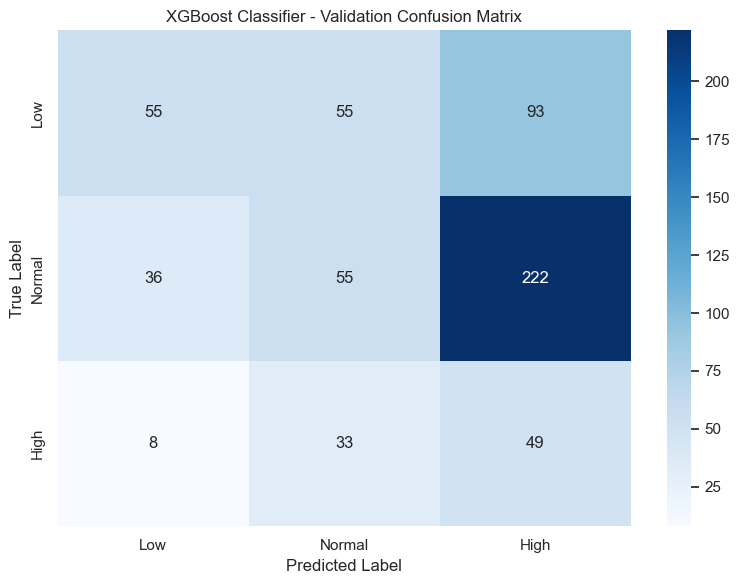


Classification Report:
              precision    recall  f1-score   support

         Low       0.56      0.27      0.36       203
      Normal       0.38      0.18      0.24       313
        High       0.13      0.54      0.22        90

    accuracy                           0.26       606
   macro avg       0.36      0.33      0.27       606
weighted avg       0.40      0.26      0.28       606



In [79]:
# Plot confusion matrix
plot_confusion_matrix(
    y_val_class,
    xgb_class_result["best_model"].predict(X_val[xgb_class_result["best_features"]]),
    mapping=MAPPING,
    title="XGBoost Classifier - Validation Confusion Matrix",
)

#### 4. LGB Classifier

In [80]:
lgb_class_result = train_classifier_with_feature_sets(
    model=lgb.LGBMClassifier(random_state=RANDOM_SEED, n_jobs=-1, verbose=-1),
    model_name="LightGBM Classifier",
    feature_sets=FEATURE_SETS,
    X_train=X_train,
    y_train=y_train_class,
    X_val=X_val,
    y_val=y_val_class,
    mapping=MAPPING,
    metric="F1_Macro",
    scale=False,
    verbose=True,
)

CLASSIFICATION_MODEL_RESULTS["LightGBM"] = {
    "model": "LightGBM Classifier",
    "feature_set": lgb_class_result["best_feature_set_name"],
    "features": lgb_class_result["best_features"],
    "train_metrics": lgb_class_result["best_metrics"]["train"],
    "val_metrics": lgb_class_result["best_metrics"]["val"],
}
# Print validation metrics for LightGBM Classifier
print("\nLightGBM Classifier Best Model Validation Metrics:")
for metric, value in lgb_class_result["best_metrics"]["val"].items():
    print(f"  {metric}: {value:.6f}")


Training LightGBM Classifier with 12 feature sets
Optimizing for: F1_Macro
Scaling: No

Feature Set: minimal
  Features: 9, Lookback: 1 days
  Training F1_Macro: 0.9907
  Validation F1_Macro: 0.1434
  Val Accuracy: 0.1782

Feature Set: price_only
  Features: 28, Lookback: 35 days
  Training F1_Macro: 1.0000
  Validation F1_Macro: 0.1325
  Val Accuracy: 0.1650

Feature Set: volatility_only
  Features: 20, Lookback: 61 days
  Training F1_Macro: 1.0000
  Validation F1_Macro: 0.2677
  Val Accuracy: 0.2541

Feature Set: short_volatility_only
  Features: 15, Lookback: 45 days
  Training F1_Macro: 0.9994
  Validation F1_Macro: 0.2846
  Val Accuracy: 0.2904

Feature Set: simple_vol
  Features: 18, Lookback: 45 days
  Training F1_Macro: 1.0000
  Validation F1_Macro: 0.1117
  Val Accuracy: 0.1403

Feature Set: base
  Features: 33, Lookback: 35 days
  Training F1_Macro: 1.0000
  Validation F1_Macro: 0.1436
  Val Accuracy: 0.1815

Feature Set: base_single_vol
  Features: 30, Lookback: 35 days
  T

In [81]:
comparison_df = compare_feature_sets_results(
    lgb_class_result["all_results"], metric="F1_Macro", task="classification"
)
comparison_df

Feature_Set  N_Features  Lookback_Days  Train_F1_Macro  \
0   short_volatility_only          15             45        0.999430   
1         volatility_only          20             61        1.000000   
2      base_with_long_vol          46             61        1.000000   
3            all_features          48             61        1.000000   
4    base_with_medium_vol          43             45        1.000000   
5     base_with_short_vol          39             38        1.000000   
6                    base          33             35        1.000000   
7                 minimal           9              1        0.990728   
8              price_only          28             35        1.000000   
9             compact_vol          26             45        1.000000   
10        base_single_vol          30             35        1.000000   
11             simple_vol          18             45        1.000000   

    Val_F1_Macro  Overfit_Gap  
0       0.284569    -0.714861  
1       0.267676    -0.732324  
2       0.165230    -0.834770  
3       0.160044    -0.839956  
4       0.158201    -0.841799  
5       0.148595    -0.851405  
6       0.143577    -0.856423  
7       0.143383    -0.847345  
8       0.132472    -0.867528  
9       0.115089    -0.884911  
10      0.113873    -0.886127  
11      0.111665    -0.888335

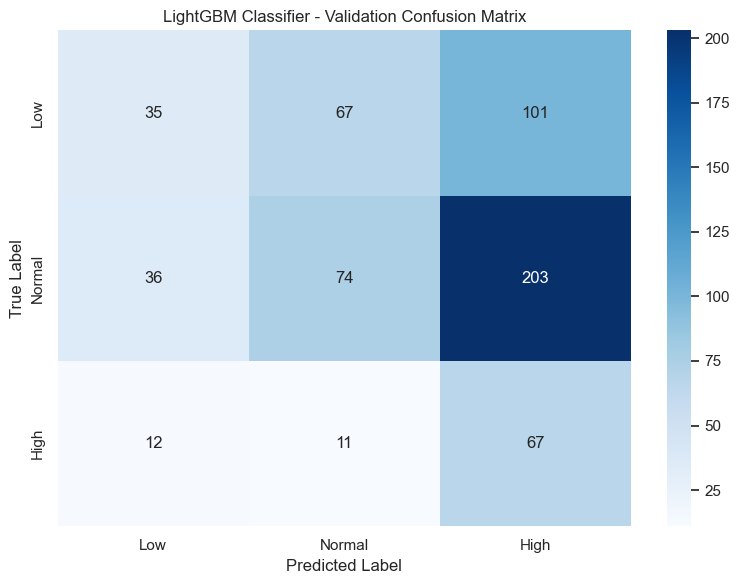


Classification Report:
              precision    recall  f1-score   support

         Low       0.42      0.17      0.24       203
      Normal       0.49      0.24      0.32       313
        High       0.18      0.74      0.29        90

    accuracy                           0.29       606
   macro avg       0.36      0.38      0.28       606
weighted avg       0.42      0.29      0.29       606



In [82]:
# Confusion matrix
plot_confusion_matrix(
    y_val_class,
    lgb_class_result["best_model"].predict(X_val[lgb_class_result["best_features"]]),
    mapping=MAPPING,
    title="LightGBM Classifier - Validation Confusion Matrix",
)

As our dataset is quite small, and in the previous experiment we saw that deep learning models were not able to perform well, we will not try to build deep learning classification models. We will focus on traditional machine learning algorithms that are more suitable for small datasets. We will try with bagging, stacking, voting and AdaBoost classifiers.

#### 5. Voting Classifier

##### Soft Voting

In [83]:
base_models = [
    (
        "lr",
        LogisticRegression(
            class_weight="balanced", max_iter=1000, random_state=RANDOM_SEED
        ),
    ),
    (
        "rf",
        RandomForestClassifier(
            class_weight="balanced", random_state=RANDOM_SEED, n_jobs=-1
        ),
    ),
    ("xgb", xgb.XGBClassifier(random_state=RANDOM_SEED, n_jobs=-1)),
]

# Create voting classifier
voting_soft = VotingClassifier(
    estimators=base_models,
    voting="soft",  # Use predicted probabilities
    n_jobs=-1,
)

# Train with best feature set
voting_result = train_classifier_with_feature_sets(
    model=voting_soft,
    model_name="Voting Classifier (Soft)",
    feature_sets=FEATURE_SETS,
    X_train=X_train,
    y_train=y_train_class,
    X_val=X_val,
    y_val=y_val_class,
    mapping=MAPPING,
    metric="F1_Macro",
    scale=True,  # Will scale for all models
    verbose=True,
)

CLASSIFICATION_MODEL_RESULTS["Voting_Soft"] = {
    "model": "Voting Classifier (Soft)",
    "scaler": voting_result["best_scaler"],
    "feature_set": voting_result["best_feature_set_name"],
    "features": voting_result["best_features"],
    "train_metrics": voting_result["best_metrics"]["train"],
    "val_metrics": voting_result["best_metrics"]["val"],
}
# Print validation metrics for Voting Classifier
print("\nVoting Classifier Best Model Validation Metrics:")
for metric, value in voting_result["best_metrics"]["val"].items():
    print(f"  {metric}: {value:.6f}")


Training Voting Classifier (Soft) with 12 feature sets
Optimizing for: F1_Macro
Scaling: Yes

Feature Set: minimal
  Features: 9, Lookback: 1 days
  Training F1_Macro: 1.0000
  Validation F1_Macro: 0.1519
  Val Accuracy: 0.1947

Feature Set: price_only
  Features: 28, Lookback: 35 days
  Training F1_Macro: 1.0000
  Validation F1_Macro: 0.1498
  Val Accuracy: 0.1964

Feature Set: volatility_only
  Features: 20, Lookback: 61 days
  Training F1_Macro: 1.0000
  Validation F1_Macro: 0.2742
  Val Accuracy: 0.2657

Feature Set: short_volatility_only
  Features: 15, Lookback: 45 days
  Training F1_Macro: 1.0000
  Validation F1_Macro: 0.2751
  Val Accuracy: 0.2772

Feature Set: simple_vol
  Features: 18, Lookback: 45 days
  Training F1_Macro: 1.0000
  Validation F1_Macro: 0.1219
  Val Accuracy: 0.1535

Feature Set: base
  Features: 33, Lookback: 35 days
  Training F1_Macro: 1.0000
  Validation F1_Macro: 0.1859
  Val Accuracy: 0.2492

Feature Set: base_single_vol
  Features: 30, Lookback: 35 da

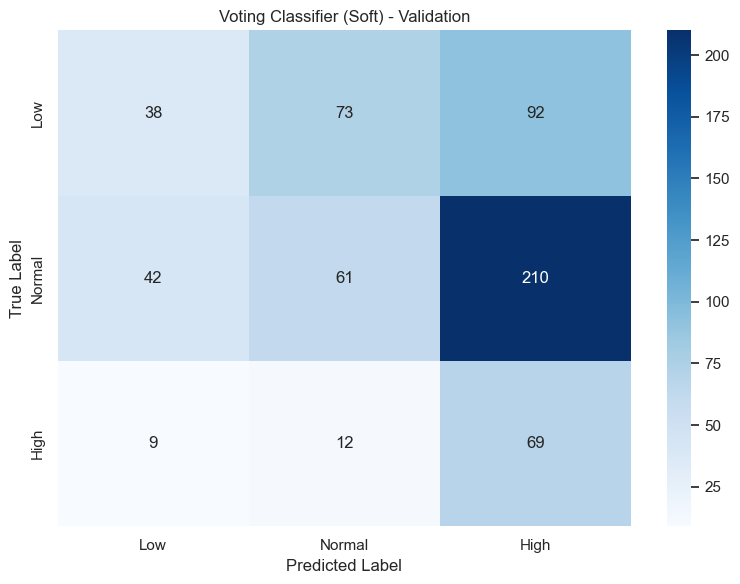


Classification Report:
              precision    recall  f1-score   support

         Low       0.43      0.19      0.26       203
      Normal       0.42      0.19      0.27       313
        High       0.19      0.77      0.30        90

    accuracy                           0.28       606
   macro avg       0.34      0.38      0.28       606
weighted avg       0.39      0.28      0.27       606



In [84]:
# Confusion matrix
plot_confusion_matrix(
    y_val_class,
    voting_result["best_model"].predict(
        voting_result["best_scaler"].transform(X_val[voting_result["best_features"]])
    ),
    mapping=MAPPING,
    title="Voting Classifier (Soft) - Validation",
)

##### Hard Voting

In [85]:
voting_hard = VotingClassifier(
    estimators=base_models,
    voting="hard",  # Use majority vote
    n_jobs=-1,
)

voting_hard_result = train_classifier_with_feature_sets(
    model=voting_hard,
    model_name="Voting Classifier (Hard)",
    feature_sets=FEATURE_SETS,
    X_train=X_train,
    y_train=y_train_class,
    X_val=X_val,
    y_val=y_val_class,
    mapping=MAPPING,
    metric="F1_Macro",
    scale=True,
    verbose=True,
)

CLASSIFICATION_MODEL_RESULTS["Voting_Hard"] = {
    "model": "Voting Classifier (Hard)",
    "scaler": voting_hard_result["best_scaler"],
    "feature_set": voting_hard_result["best_feature_set_name"],
    "features": voting_hard_result["best_features"],
    "train_metrics": voting_hard_result["best_metrics"]["train"],
    "val_metrics": voting_hard_result["best_metrics"]["val"],
}

# Print validation metrics for Voting Classifier
print("\nVoting Classifier (Hard) Best Model Validation Metrics:")
for metric, value in voting_hard_result["best_metrics"]["val"].items():
    print(f"  {metric}: {value:.6f}")


Training Voting Classifier (Hard) with 12 feature sets
Optimizing for: F1_Macro
Scaling: Yes

Feature Set: minimal
  Features: 9, Lookback: 1 days
  Training F1_Macro: 0.9997
  Validation F1_Macro: 0.1362
  Val Accuracy: 0.1766

Feature Set: price_only
  Features: 28, Lookback: 35 days
  Training F1_Macro: 1.0000
  Validation F1_Macro: 0.1447
  Val Accuracy: 0.1898

Feature Set: volatility_only
  Features: 20, Lookback: 61 days
  Training F1_Macro: 1.0000
  Validation F1_Macro: 0.3046
  Val Accuracy: 0.2970

Feature Set: short_volatility_only
  Features: 15, Lookback: 45 days
  Training F1_Macro: 1.0000
  Validation F1_Macro: 0.2569
  Val Accuracy: 0.2591

Feature Set: simple_vol
  Features: 18, Lookback: 45 days
  Training F1_Macro: 1.0000
  Validation F1_Macro: 0.1412
  Val Accuracy: 0.1766

Feature Set: base
  Features: 33, Lookback: 35 days
  Training F1_Macro: 1.0000
  Validation F1_Macro: 0.1791
  Val Accuracy: 0.2426

Feature Set: base_single_vol
  Features: 30, Lookback: 35 da

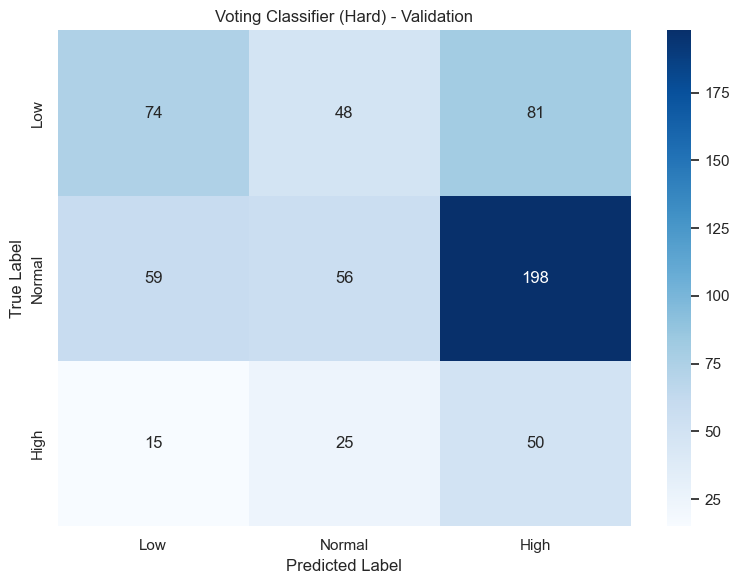


Classification Report:
              precision    recall  f1-score   support

         Low       0.50      0.36      0.42       203
      Normal       0.43      0.18      0.25       313
        High       0.15      0.56      0.24        90

    accuracy                           0.30       606
   macro avg       0.36      0.37      0.30       606
weighted avg       0.41      0.30      0.31       606



In [86]:
# Confusion matrix
plot_confusion_matrix(
    y_val_class,
    voting_hard_result["best_model"].predict(
        voting_hard_result["best_scaler"].transform(
            X_val[voting_hard_result["best_features"]]
        )
    ),
    mapping=MAPPING,
    title="Voting Classifier (Hard) - Validation",
)

#### 6. Stacking Classifier

In [87]:
# Base models (Level 0)
base_estimators = [
    (
        "lr_l1",
        LogisticRegression(
            class_weight="balanced",
            max_iter=1000,
            random_state=RANDOM_SEED,
        ),
    ),
    (
        "rf",
        RandomForestClassifier(
            class_weight="balanced", random_state=RANDOM_SEED, n_jobs=-1
        ),
    ),
    ("xgb", xgb.XGBClassifier(random_state=RANDOM_SEED, n_jobs=-1)),
    (
        "lgb",
        lgb.LGBMClassifier(
            class_weight="balanced", random_state=RANDOM_SEED, verbose=-1, n_jobs=-1
        ),
    ),
]

# Meta-model (Level 1) - simple logistic regression
final_estimator = LogisticRegression(
    C=0.5, class_weight="balanced", max_iter=1000, random_state=RANDOM_SEED
)

# Create stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_estimators,
    final_estimator=final_estimator,
    cv=5,  # Use 5-fold CV for training meta-model
    stack_method="predict_proba",  # Use probabilities from base models
    n_jobs=-1,
)

stacking_result = train_classifier_with_feature_sets(
    model=stacking_clf,
    model_name="Stacking Classifier",
    feature_sets=FEATURE_SETS,
    X_train=X_train,
    y_train=y_train_class,
    X_val=X_val,
    y_val=y_val_class,
    mapping=MAPPING,
    metric="F1_Macro",
    scale=True,
    verbose=True,
)

CLASSIFICATION_MODEL_RESULTS["Stacking"] = {
    "model": "Stacking Classifier",
    "scaler": stacking_result["best_scaler"],
    "feature_set": stacking_result["best_feature_set_name"],
    "features": stacking_result["best_features"],
    "train_metrics": stacking_result["best_metrics"]["train"],
    "val_metrics": stacking_result["best_metrics"]["val"],
}
# Print validation metrics for Stacking Classifier
print("\nStacking Classifier Best Model Validation Metrics:")
for metric, value in stacking_result["best_metrics"]["val"].items():
    print(f"  {metric}: {value:.6f}")


Training Stacking Classifier with 12 feature sets
Optimizing for: F1_Macro
Scaling: Yes



/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
 

Feature Set: minimal
  Features: 9, Lookback: 1 days
  Training F1_Macro: 0.1924
  Validation F1_Macro: 0.3180
  Val Accuracy: 0.4026



/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
 

Feature Set: price_only
  Features: 28, Lookback: 35 days
  Training F1_Macro: 0.3441
  Validation F1_Macro: 0.1437
  Val Accuracy: 0.1584



/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
 

Feature Set: volatility_only
  Features: 20, Lookback: 61 days
  Training F1_Macro: 0.2935
  Validation F1_Macro: 0.4568
  Val Accuracy: 0.4884



/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
 

Feature Set: short_volatility_only
  Features: 15, Lookback: 45 days
  Training F1_Macro: 0.3748
  Validation F1_Macro: 0.4115
  Val Accuracy: 0.4554



/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
 

Feature Set: simple_vol
  Features: 18, Lookback: 45 days
  Training F1_Macro: 0.3407
  Validation F1_Macro: 0.2625
  Val Accuracy: 0.2904



/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
 

Feature Set: base
  Features: 33, Lookback: 35 days
  Training F1_Macro: 0.3626
  Validation F1_Macro: 0.2449
  Val Accuracy: 0.2475



/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
 

Feature Set: base_single_vol
  Features: 30, Lookback: 35 days
  Training F1_Macro: 0.3442
  Validation F1_Macro: 0.1532
  Val Accuracy: 0.1634



/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
 

Feature Set: base_with_short_vol
  Features: 39, Lookback: 38 days
  Training F1_Macro: 0.3654
  Validation F1_Macro: 0.1873
  Val Accuracy: 0.2162



/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
 

Feature Set: compact_vol
  Features: 26, Lookback: 45 days
  Training F1_Macro: 0.3443
  Validation F1_Macro: 0.2290
  Val Accuracy: 0.2343



/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
 

Feature Set: base_with_medium_vol
  Features: 43, Lookback: 45 days
  Training F1_Macro: 0.3775
  Validation F1_Macro: 0.2585
  Val Accuracy: 0.2508



/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
 

Feature Set: base_with_long_vol
  Features: 46, Lookback: 61 days
  Training F1_Macro: 0.3754
  Validation F1_Macro: 0.2195
  Val Accuracy: 0.2459



/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
 

Feature Set: all_features
  Features: 48, Lookback: 61 days
  Training F1_Macro: 0.3947
  Validation F1_Macro: 0.2485
  Val Accuracy: 0.2888

BEST FEATURE SET: volatility_only
  Features: 20
  Lookback: 61 days
  Validation F1_Macro: 0.4568
  Validation Accuracy: 0.4884


Stacking Classifier Best Model Validation Metrics:
  Accuracy: 0.488449
  Precision_Macro: 0.453981
  Recall_Macro: 0.486407
  F1_Macro: 0.456829
  Precision_Weighted: 0.507871
  Recall_Weighted: 0.488449
  F1_Weighted: 0.490712
  Precision_Low: 0.435897
  Recall_Low: 0.334975
  F1_Low: 0.378830
  Precision_Normal: 0.609589
  Recall_Normal: 0.568690
  F1_Normal: 0.588430
  Precision_High: 0.316456
  Recall_High: 0.555556
  F1_High: 0.403226


/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
 

/Users/klipiec/Desktop/Internship/projects/crypto_forecasting_project/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


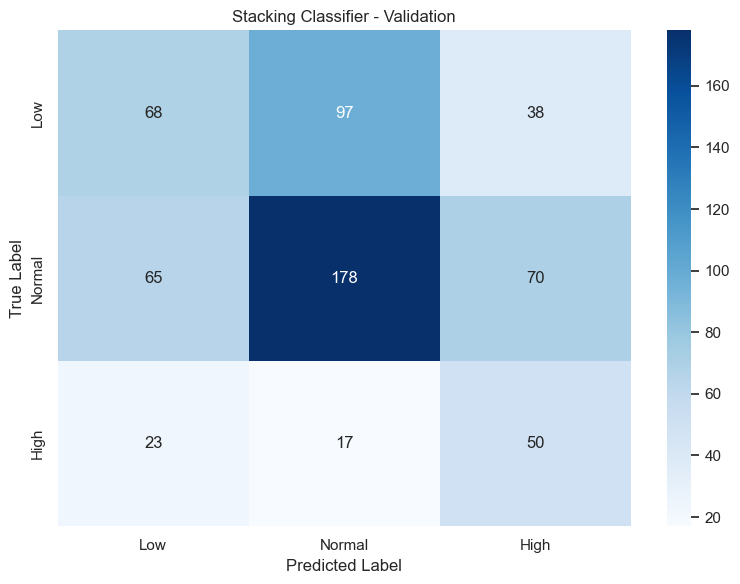


Classification Report:
              precision    recall  f1-score   support

         Low       0.44      0.33      0.38       203
      Normal       0.61      0.57      0.59       313
        High       0.32      0.56      0.40        90

    accuracy                           0.49       606
   macro avg       0.45      0.49      0.46       606
weighted avg       0.51      0.49      0.49       606



In [88]:
# Confusion matrix
plot_confusion_matrix(
    y_val_class,
    stacking_result["best_model"].predict(
        stacking_result["best_scaler"].transform(
            X_val[stacking_result["best_features"]]
        )
    ),
    mapping=MAPPING,
    title="Stacking Classifier - Validation",
)

#### 7. Bagging Classifier

In [89]:
# Base model to bag
base_lr = LogisticRegression(
    class_weight="balanced", max_iter=1000, random_state=RANDOM_SEED
)

# Create bagging ensemble
bagging_clf = BaggingClassifier(
    estimator=base_lr,
    n_estimators=20,  # Number of base models
    max_samples=0.7,  # 70% of data per model
    max_features=0.8,  # 80% of features per model
    bootstrap=True,  # Sample with replacement
    bootstrap_features=False,  # Don't sample features with replacement
    random_state=RANDOM_SEED,
    n_jobs=-1,
)

bagging_result = train_classifier_with_feature_sets(
    model=bagging_clf,
    model_name="Bagging Classifier",
    feature_sets=FEATURE_SETS,
    X_train=X_train,
    y_train=y_train_class,
    X_val=X_val,
    y_val=y_val_class,
    mapping=MAPPING,
    metric="F1_Macro",
    scale=True,
    verbose=True,
)

CLASSIFICATION_MODEL_RESULTS["Bagging"] = {
    "model": "Bagging Classifier",
    "scaler": bagging_result["best_scaler"],
    "feature_set": bagging_result["best_feature_set_name"],
    "features": bagging_result["best_features"],
    "train_metrics": bagging_result["best_metrics"]["train"],
    "val_metrics": bagging_result["best_metrics"]["val"],
}
# Print validation metrics for Bagging Classifier
print("\nBagging Classifier Best Model Validation Metrics:")
for metric, value in bagging_result["best_metrics"]["val"].items():
    print(f"  {metric}: {value:.6f}")


Training Bagging Classifier with 12 feature sets
Optimizing for: F1_Macro
Scaling: Yes

Feature Set: minimal
  Features: 9, Lookback: 1 days
  Training F1_Macro: 0.4696
  Validation F1_Macro: 0.2597
  Val Accuracy: 0.3531

Feature Set: price_only
  Features: 28, Lookback: 35 days
  Training F1_Macro: 0.5195
  Validation F1_Macro: 0.2753
  Val Accuracy: 0.4604

Feature Set: volatility_only
  Features: 20, Lookback: 61 days
  Training F1_Macro: 0.5535
  Validation F1_Macro: 0.4916
  Val Accuracy: 0.5066

Feature Set: short_volatility_only
  Features: 15, Lookback: 45 days
  Training F1_Macro: 0.5286
  Validation F1_Macro: 0.3724
  Val Accuracy: 0.3878

Feature Set: simple_vol
  Features: 18, Lookback: 45 days
  Training F1_Macro: 0.4918
  Validation F1_Macro: 0.3078
  Val Accuracy: 0.4785

Feature Set: base
  Features: 33, Lookback: 35 days
  Training F1_Macro: 0.5975
  Validation F1_Macro: 0.3147
  Val Accuracy: 0.4785

Feature Set: base_single_vol
  Features: 30, Lookback: 35 days
  T

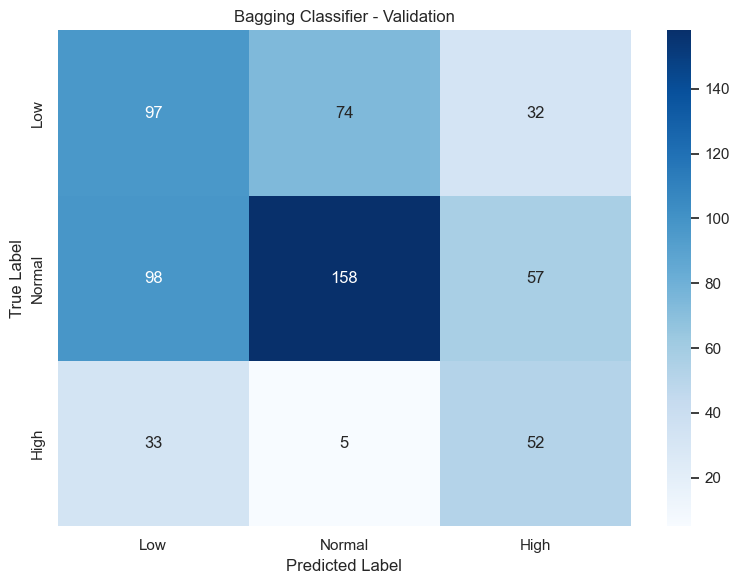


Classification Report:
              precision    recall  f1-score   support

         Low       0.43      0.48      0.45       203
      Normal       0.67      0.50      0.57       313
        High       0.37      0.58      0.45        90

    accuracy                           0.51       606
   macro avg       0.49      0.52      0.49       606
weighted avg       0.54      0.51      0.51       606



In [90]:
# Confusion matrix
plot_confusion_matrix(
    y_val_class,
    bagging_result["best_model"].predict(
        bagging_result["best_scaler"].transform(X_val[bagging_result["best_features"]])
    ),
    mapping=MAPPING,
    title="Bagging Classifier - Validation",
)

#### 8. AdaBoost Classifier

In [91]:
# Weak learner - shallow decision tree
weak_learner = DecisionTreeClassifier(
    max_depth=2,
    min_samples_split=20,
    min_samples_leaf=10,
    class_weight="balanced",
    random_state=RANDOM_SEED,
)

# AdaBoost ensemble
adaboost_clf = AdaBoostClassifier(
    estimator=weak_learner, learning_rate=0.5, random_state=RANDOM_SEED
)

adaboost_result = train_classifier_with_feature_sets(
    model=adaboost_clf,
    model_name="AdaBoost Classifier",
    feature_sets=FEATURE_SETS,
    X_train=X_train,
    y_train=y_train_class,
    X_val=X_val,
    y_val=y_val_class,
    mapping=MAPPING,
    metric="F1_Macro",
    scale=True,
    verbose=True,
)

CLASSIFICATION_MODEL_RESULTS["AdaBoost"] = {
    "model": "AdaBoost Classifier",
    "scaler": adaboost_result["best_scaler"],
    "feature_set": adaboost_result["best_feature_set_name"],
    "features": adaboost_result["best_features"],
    "train_metrics": adaboost_result["best_metrics"]["train"],
    "val_metrics": adaboost_result["best_metrics"]["val"],
}

# Print validation metrics for AdaBoost Classifier
print("\nAdaBoost Classifier Best Model Validation Metrics:")
for metric, value in adaboost_result["best_metrics"]["val"].items():
    print(f"  {metric}: {value:.6f}")


Training AdaBoost Classifier with 12 feature sets
Optimizing for: F1_Macro
Scaling: Yes

Feature Set: minimal
  Features: 9, Lookback: 1 days
  Training F1_Macro: 0.5473
  Validation F1_Macro: 0.2260
  Val Accuracy: 0.2657

Feature Set: price_only
  Features: 28, Lookback: 35 days
  Training F1_Macro: 0.5836
  Validation F1_Macro: 0.2574
  Val Accuracy: 0.4274

Feature Set: volatility_only
  Features: 20, Lookback: 61 days
  Training F1_Macro: 0.5119
  Validation F1_Macro: 0.3277
  Val Accuracy: 0.3729

Feature Set: short_volatility_only
  Features: 15, Lookback: 45 days
  Training F1_Macro: 0.5250
  Validation F1_Macro: 0.3214
  Val Accuracy: 0.3647

Feature Set: simple_vol
  Features: 18, Lookback: 45 days
  Training F1_Macro: 0.6272
  Validation F1_Macro: 0.2264
  Val Accuracy: 0.3234

Feature Set: base
  Features: 33, Lookback: 35 days
  Training F1_Macro: 0.5964
  Validation F1_Macro: 0.2183
  Val Accuracy: 0.3911

Feature Set: base_single_vol
  Features: 30, Lookback: 35 days
  

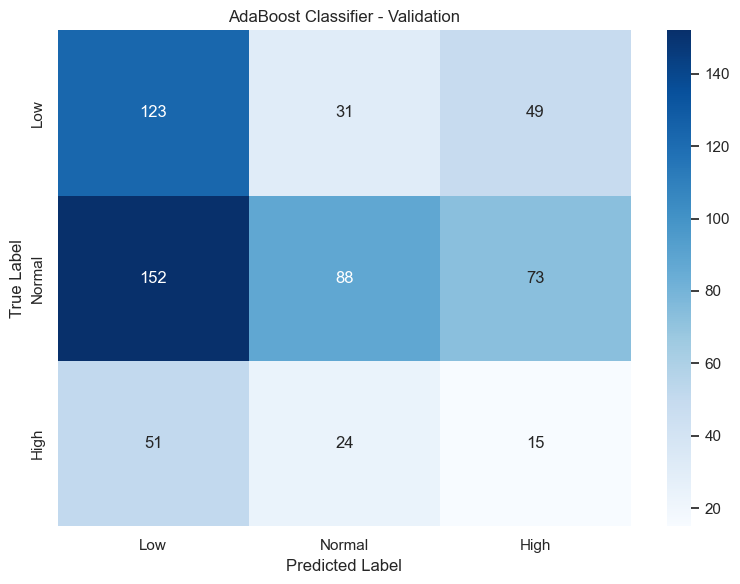


Classification Report:
              precision    recall  f1-score   support

         Low       0.38      0.61      0.47       203
      Normal       0.62      0.28      0.39       313
        High       0.11      0.17      0.13        90

    accuracy                           0.37       606
   macro avg       0.37      0.35      0.33       606
weighted avg       0.46      0.37      0.37       606



In [92]:
# Confusion matrix
plot_confusion_matrix(
    y_val_class,
    adaboost_result["best_model"].predict(
        adaboost_result["best_scaler"].transform(
            X_val[adaboost_result["best_features"]]
        )
    ),
    mapping=MAPPING,
    title="AdaBoost Classifier - Validation",
)

#### 9. Comparison of Classification Models 

In [93]:
# Compare all classification models

print("\n" + "=" * 100)
print("CLASSIFICATION MODELS COMPARISON")
print("=" * 100)

comparison_data = []
for model_name, result in CLASSIFICATION_MODEL_RESULTS.items():
    comparison_data.append(
        {
            "Model": result["model"],
            "Feature_Set": result["feature_set"],
            "N_Features": len(result["features"]),
            "Train_Accuracy": result["train_metrics"]["Accuracy"],
            "Val_Accuracy": result["val_metrics"]["Accuracy"],
            "Train_F1_Macro": result["train_metrics"]["F1_Macro"],
            "Val_F1_Macro": result["val_metrics"]["F1_Macro"],
            "Val_F1_Low": result["val_metrics"]["F1_Low"],
            "Val_F1_Normal": result["val_metrics"]["F1_Normal"],
            "Val_F1_High": result["val_metrics"]["F1_High"],
        }
    )

comparison_df = pd.DataFrame(comparison_data).sort_values(
    "Val_F1_Macro", ascending=False
)
comparison_df


CLASSIFICATION MODELS COMPARISON


Model            Feature_Set  N_Features  \
3          Logistic Regression        volatility_only          20   
10          Bagging Classifier        volatility_only          20   
9          Stacking Classifier        volatility_only          20   
11         AdaBoost Classifier        volatility_only          20   
8     Voting Classifier (Hard)        volatility_only          20   
1   Stratified Random Baseline                   None           0   
2         Persistence Baseline     Current Volatility           1   
4     Random Forest Classifier        volatility_only          20   
6          LightGBM Classifier  short_volatility_only          15   
7     Voting Classifier (Soft)  short_volatility_only          15   
5           XGBoost Classifier        volatility_only          20   
0      Majority Class Baseline                   None           0   

    Train_Accuracy  Val_Accuracy  Train_F1_Macro  Val_F1_Macro  Val_F1_Low  \
3         0.566124      0.508251        0.560574      0.492274    0.462617   
10        0.558699      0.506601        0.553454      0.491626    0.450116   
9         0.300919      0.488449        0.293479      0.456829    0.378830   
11        0.530764      0.372937        0.511866      0.327717    0.465028   
8         1.000000      0.297030        1.000000      0.304570    0.421652   
1         0.375530      0.318482        0.325033      0.297326    0.236066   
2         0.468175      0.374587        0.441215      0.290084    0.305419   
4         0.962164      0.282178        0.964635      0.284801    0.322981   
6         0.999293      0.290429        0.999430      0.284569    0.244755   
7         1.000000      0.277228        1.000000      0.275139    0.260274   
5         1.000000      0.262376        1.000000      0.273775    0.364238   
0         0.468883      0.148515        0.212807      0.086207    0.000000   

    Val_F1_Normal  Val_F1_High  
3        0.585086     0.429119  
10       0.574545     0.450216  
9        0.588430     0.403226  
11       0.385965     0.132159  
8        0.253394     0.238663  
1        0.430712     0.225201  
2        0.522727     0.042105  
4        0.288703     0.242718  
6        0.318280     0.290672  
7        0.265795     0.299349  
5        0.241228     0.215859  
0        0.000000     0.258621

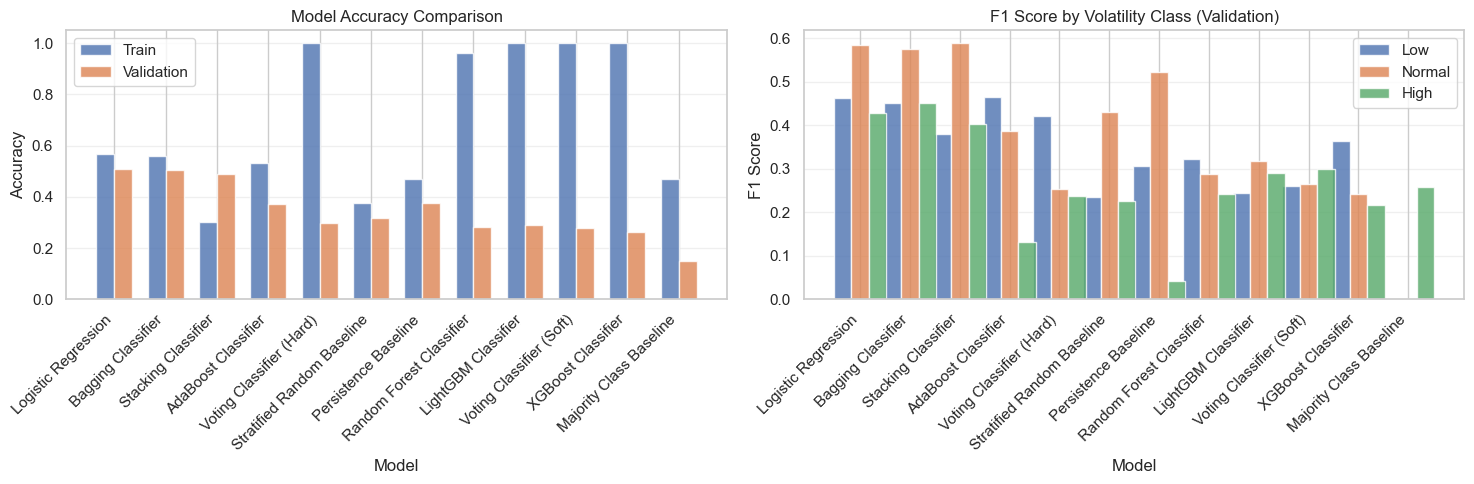

In [94]:
# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy comparison
models = comparison_df["Model"]
train_acc = comparison_df["Train_Accuracy"]
val_acc = comparison_df["Val_Accuracy"]

x = np.arange(len(models))
width = 0.35

axes[0].bar(x - width / 2, train_acc, width, label="Train", alpha=0.8)
axes[0].bar(x + width / 2, val_acc, width, label="Validation", alpha=0.8)
axes[0].set_xlabel("Model")
axes[0].set_ylabel("Accuracy")
axes[0].set_title("Model Accuracy Comparison")
axes[0].set_xticks(x)
axes[0].set_xticklabels(models, rotation=45, ha="right")
axes[0].legend()
axes[0].grid(axis="y", alpha=0.3)

# F1 Score per class
val_f1_low = comparison_df["Val_F1_Low"]
val_f1_normal = comparison_df["Val_F1_Normal"]
val_f1_high = comparison_df["Val_F1_High"]

axes[1].bar(x - width, val_f1_low, width, label="Low", alpha=0.8)
axes[1].bar(x, val_f1_normal, width, label="Normal", alpha=0.8)
axes[1].bar(x + width, val_f1_high, width, label="High", alpha=0.8)
axes[1].set_xlabel("Model")
axes[1].set_ylabel("F1 Score")
axes[1].set_title("F1 Score by Volatility Class (Validation)")
axes[1].set_xticks(x)
axes[1].set_xticklabels(models, rotation=45, ha="right")
axes[1].legend()
axes[1].grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

#### 10. Observations and Conclusions

##### Model Performance Overview
The classification task proved moderately challenging, with the best models achieving ~54% validation accuracy and F1-macro scores around 0.52. This represents a meaningful improvement over baseline approaches, though substantial room for enhancement remains.

##### Key Findings

**1. Severe Overfitting in Tree-Based Models**
- Random Forest, XGBoost, LightGBM, and ensemble methods (Voting, Stacking) exhibited catastrophic overfitting
- Training accuracy: 96-100% vs. Validation accuracy: 28-30%
- These models memorized training patterns rather than learning generalizable volatility dynamics
- Root cause: Insufficient regularization combined with high model complexity

**2. Linear Models Show Superior Generalization**
- Logistic Regression and Bagging Classifier emerged as top performers (Val F1: 0.52)
- Both achieved balanced train-test performance (Train: 0.55-0.56, Val: 0.54)
- Simpler models better suited to the limited feature set (20 volatility-based features)
- Linear decision boundaries may be more appropriate for this problem structure

**3. Class-Specific Performance Patterns**
- "Normal" volatility class consistently achieved highest F1 scores (0.62-0.63)
- "Low" and "High" volatility classes showed weaker performance (0.45-0.49)
- Suggests model bias toward the majority/middle class

**4. Baseline Comparison Reveals Moderate Predictive Power**
- Persistence baseline (predicting current volatility continues): 37% accuracy, F1: 0.29
- Best models improved by 16 percentage points in accuracy
- Demonstrates that historical volatility features contain meaningful predictive signal
- However, gap to theoretical maximum suggests significant information still uncaptured

**5. Feature Set Effectiveness**
- "volatility_only" feature set (20 features) selected by most models
- Includes: rolling volatility statistics, Parkinson/Garman-Klass/Rogers-Satchell estimators
- Success of this focused set suggests volatility exhibits autoregressive properties
- More complex feature engineering may not help without addressing fundamental issues





##### Identified Issue

**Class Imbalance and Distribution in Train, Validation and Test Sets - Data Drift**

- The distribution of volatility classes is unbalanced across train, validation, and test sets
- This is expected due to the non-stationary nature of volatility, which can change over time
- Models struggle to generalize because the class distribution in the validation/test sets differs significantly from the training set
- Class imbalance can lead to models being biased towards the majority class, resulting in poor performance on minority classes (e.g., "Low" and "High" volatility)

### 5. Model Optimization

We can clearly see that the best models use `volatility_only` feature set, which includes 20 features related to volatility. This suggests that the most important information for predicting future volatility is contained within these volatility-based features, and adding more complex features may not necessarily improve performance. We will try to experiment with different combinations of features from this set to see if we can further improve the results. We will also try to optimize hyperparameters of our best models  to see if we can achieve better performance.  

Our optimization process follows a systematic approach:

1. **Baseline Model**: Establish initial performance with all features
2. **Feature Selection**: Identify the most predictive feature combinations
3. **Hyperparameter Tuning**: Optimize model parameters for best performance
4. **Final Evaluation**: Validate chosen model on test set

The goal is to maximize F1-Macro score while maintaining interpretability and avoiding overfitting to ensure robust performance on unseen data.

##### 5.1 Feature Engineering: Define Feature Groups

We organize our features into logical groups to facilitate systematic experimentation. This modular approach allows us to test different feature combinations efficiently.


In [95]:
best_features = FEATURE_SETS["volatility_only"]["features"]
best_features

['Volatility',
 'Volatility_Class_Num',
 'Parkinson_Volatility',
 'Garman_Klass_Volatility',
 'Roger_Satchel_Volatility',
 'Volatility_Lag1',
 'Volatility_Lag7',
 'Volatility_Lag14',
 'Volatility_Lag30',
 'Volatility_MA_7',
 'Volatility_MA_14',
 'Volatility_MA_30',
 'Volatility_STD_7',
 'Volatility_STD_14',
 'Volatility_STD_30',
 'Volatility_Change',
 'Volatility_Change_7d',
 'Volatility_Change_14d',
 'Volatility_Change_30d',
 'Volatility_Momentum']

In [96]:
ALL_FEATURES

['Close',
 'Volume',
 'Return',
 'Log_Return',
 'Price_Diff',
 'Low_High_Diff',
 'Open_Close_Diff',
 'Open_Close_Up',
 'Close_Lag1',
 'Close_Lag5',
 'Close_Lag7',
 'Close_Lag30',
 'Return_Lag1',
 'Return_Lag5',
 'Return_Lag7',
 'Return_Lag30',
 'SMA_30',
 'Rolling_Mean_Return_30',
 'Rolling_Std_Return_30',
 'Close_Change_5d',
 'Close_Change_10d',
 'Close_Change_20d',
 'MACD',
 'RSI',
 'Month_Sin',
 'Month_Cos',
 'DayOfWeek_Sin',
 'DayOfWeek_Cos',
 'Volatility',
 'Parkinson_Volatility',
 'Garman_Klass_Volatility',
 'Roger_Satchel_Volatility',
 'Volatility_Lag1',
 'Volatility_Lag7',
 'Volatility_Lag14',
 'Volatility_Lag30',
 'Volatility_MA_7',
 'Volatility_MA_14',
 'Volatility_MA_30',
 'Volatility_Change',
 'Volatility_Change_7d',
 'Volatility_Change_14d',
 'Volatility_Change_30d',
 'Volatility_Momentum',
 'Parkinson_to_HV_Ratio',
 'GK_to_HV_Ratio',
 'RS_to_HV_Ratio']

In [97]:
# Comprehensive feature groups for volatility prediction
VOL_FEATURE_GROUPS = {
    "core": [
        "Volatility",
        "Volatility_Class_Num",
        "Parkinson_Volatility",
        "Garman_Klass_Volatility",
        "Roger_Satchel_Volatility",
    ],
    "lags": [
        "Volatility_Lag1",
        "Volatility_Lag7",
        "Volatility_Lag14",
        "Volatility_Lag30",
    ],
    "ma": [
        "Volatility_MA_7",
        "Volatility_MA_14",
        "Volatility_MA_30",
    ],
    "std": [
        "Volatility_STD_7",
        "Volatility_STD_14",
        "Volatility_STD_30",
    ],
    "change": [
        "Volatility_Change",
        "Volatility_Change_7d",
        "Volatility_Change_14d",
        "Volatility_Change_30d",
    ],
    "momentum": [
        "Volatility_Momentum",
    ],
}

##### 5.2 Feature Set Experiments

We create various minimal feature sets to identify which combinations provide the best predictive power without overfitting. Each set focuses on different
aspects of volatility dynamics.

In [98]:
# Create minimal feature sets with lookback days
MINIMAL_VOL_FEATURE_SETS = {
    "core_only": {
        "features": VOL_FEATURE_GROUPS["core"],
        "lookback_days": 30,
    },
    "core_lags": {
        "features": VOL_FEATURE_GROUPS["core"] + VOL_FEATURE_GROUPS["lags"],
        "lookback_days": 61,
    },
    "core_ma": {
        "features": VOL_FEATURE_GROUPS["core"] + VOL_FEATURE_GROUPS["ma"],
        "lookback_days": 61,
    },
    "core_std": {
        "features": VOL_FEATURE_GROUPS["core"] + VOL_FEATURE_GROUPS["std"],
        "lookback_days": 61,
    },
    "core_change": {
        "features": VOL_FEATURE_GROUPS["core"] + VOL_FEATURE_GROUPS["change"],
        "lookback_days": 61,
    },
    "core_7d_only": {
        "features": VOL_FEATURE_GROUPS["core"]
        + [
            "Volatility_Lag7",
            "Volatility_MA_7",
            "Volatility_STD_7",
            "Volatility_Change_7d",
        ],
        "lookback_days": 38,
    },
    "core_14d_only": {
        "features": VOL_FEATURE_GROUPS["core"]
        + [
            "Volatility_Lag14",
            "Volatility_MA_14",
            "Volatility_STD_14",
            "Volatility_Change_14d",
        ],
        "lookback_days": 45,
    },
    "core_30d_only": {
        "features": VOL_FEATURE_GROUPS["core"]
        + [
            "Volatility_Lag30",
            "Volatility_MA_30",
            "Volatility_STD_30",
            "Volatility_Change_30d",
        ],
        "lookback_days": 61,
    },
    "minimal_ma_std": {
        "features": VOL_FEATURE_GROUPS["core"]
        + ["Volatility_MA_14", "Volatility_STD_14"],
        "lookback_days": 45,
    },
    "minimal_lag_change": {
        "features": VOL_FEATURE_GROUPS["core"]
        + ["Volatility_Lag7", "Volatility_Change_7d"],
        "lookback_days": 38,
    },
    "ultra_minimal": {
        "features": VOL_FEATURE_GROUPS["core"] + ["Volatility_Lag7"],
        "lookback_days": 38,
    },
    "volatility_only_full": {
        "features": VOL_FEATURE_GROUPS["core"]
        + VOL_FEATURE_GROUPS["lags"]
        + VOL_FEATURE_GROUPS["ma"]
        + VOL_FEATURE_GROUPS["std"]
        + VOL_FEATURE_GROUPS["change"]
        + VOL_FEATURE_GROUPS["momentum"],
        "lookback_days": 61,
    },
}

# Feature sets summary
print("\nFeature Set Configurations:")
print("=" * 80)
for set_name, config in MINIMAL_VOL_FEATURE_SETS.items():
    print(f"\n{set_name.upper()}")
    print(
        f"  Features ({len(config['features'])}): {', '.join(config['features'][:3])}..."
    )
    print(f"  Lookback days: {config['lookback_days']}")
print("=" * 80)


Feature Set Configurations:

CORE_ONLY
  Features (5): Volatility, Volatility_Class_Num, Parkinson_Volatility...
  Lookback days: 30

CORE_LAGS
  Features (9): Volatility, Volatility_Class_Num, Parkinson_Volatility...
  Lookback days: 61

CORE_MA
  Features (8): Volatility, Volatility_Class_Num, Parkinson_Volatility...
  Lookback days: 61

CORE_STD
  Features (8): Volatility, Volatility_Class_Num, Parkinson_Volatility...
  Lookback days: 61

CORE_CHANGE
  Features (9): Volatility, Volatility_Class_Num, Parkinson_Volatility...
  Lookback days: 61

CORE_7D_ONLY
  Features (9): Volatility, Volatility_Class_Num, Parkinson_Volatility...
  Lookback days: 38

CORE_14D_ONLY
  Features (9): Volatility, Volatility_Class_Num, Parkinson_Volatility...
  Lookback days: 45

CORE_30D_ONLY
  Features (9): Volatility, Volatility_Class_Num, Parkinson_Volatility...
  Lookback days: 61

MINIMAL_MA_STD
  Features (7): Volatility, Volatility_Class_Num, Parkinson_Volatility...
  Lookback days: 45

MINIMAL_LA

##### 5.3 Feature Set Evaluation

We train a baseline Logistic Regression model with each feature set and compare their performance on the validation set.

In [99]:
minimal_features = [
 'Volatility_Class_Num',
 'Volatility_Momentum']

In [100]:
lr_volatility_features_results = train_classifier_with_feature_sets(
    model=LogisticRegression(
        class_weight="balanced",
        max_iter=1000,
        random_state=RANDOM_SEED,
    ),
    model_name="Logistic Regression - Feature Set Comparison",
    feature_sets=MINIMAL_VOL_FEATURE_SETS,
    X_train=X_train,
    y_train=y_train_class,
    X_val=X_val,
    y_val=y_val_class,
    mapping=MAPPING,
    metric="F1_Macro",
    scale=True,
    verbose=True,
)


Training Logistic Regression - Feature Set Comparison with 12 feature sets
Optimizing for: F1_Macro
Scaling: Yes

Feature Set: core_only
  Features: 5, Lookback: 30 days
  Training F1_Macro: 0.5391
  Validation F1_Macro: 0.3704
  Val Accuracy: 0.3845

Feature Set: core_lags
  Features: 9, Lookback: 61 days
  Training F1_Macro: 0.5400
  Validation F1_Macro: 0.4193
  Val Accuracy: 0.4307

Feature Set: core_ma
  Features: 8, Lookback: 61 days
  Training F1_Macro: 0.5356
  Validation F1_Macro: 0.4040
  Val Accuracy: 0.4142

Feature Set: core_std
  Features: 8, Lookback: 61 days
  Training F1_Macro: 0.5511
  Validation F1_Macro: 0.4024
  Val Accuracy: 0.4175

Feature Set: core_change
  Features: 9, Lookback: 61 days
  Training F1_Macro: 0.5390
  Validation F1_Macro: 0.4562
  Val Accuracy: 0.4653

Feature Set: core_7d_only
  Features: 9, Lookback: 38 days
  Training F1_Macro: 0.5416
  Validation F1_Macro: 0.3692
  Val Accuracy: 0.3812

Feature Set: core_14d_only
  Features: 9, Lookback: 45 

##### 5.4 Feature Set Performance Analysis

In [101]:
feature_sets_results = compare_feature_sets_results(
    lr_volatility_features_results["all_results"],
    metric="F1_Macro",
    task="classification",
)
feature_sets_results

Feature_Set  N_Features  Lookback_Days  Train_F1_Macro  \
0          core_30d_only           9             61        0.543112   
1   volatility_only_full          20             61        0.560574   
2            core_change           9             61        0.539007   
3              core_lags           9             61        0.539959   
4                core_ma           8             61        0.535644   
5               core_std           8             61        0.551097   
6          core_14d_only           9             45        0.534898   
7         minimal_ma_std           7             45        0.526683   
8              core_only           5             30        0.539083   
9           core_7d_only           9             38        0.541608   
10         ultra_minimal           6             38        0.530144   
11    minimal_lag_change           7             38        0.530361   

    Val_F1_Macro  Overfit_Gap  
0       0.497503    -0.045609  
1       0.492274    -0.068300  
2       0.456242    -0.082765  
3       0.419278    -0.120681  
4       0.403960    -0.131684  
5       0.402437    -0.148661  
6       0.379331    -0.155567  
7       0.371547    -0.155136  
8       0.370427    -0.168656  
9       0.369201    -0.172406  
10      0.368415    -0.161729  
11      0.366588    -0.163773

In [102]:
best_feature_set_name = feature_sets_results.sort_values(
    "Val_F1_Macro", ascending=False
).iloc[0]["Feature_Set"]
print(f"\nBest Feature Set: {best_feature_set_name}")
print(
    f"Validation F1 Score: {feature_sets_results.sort_values('Val_F1_Macro', ascending=False).iloc[0]['Val_F1_Macro']}"
)


Best Feature Set: core_30d_only
Validation F1 Score: 0.4975027896475803


In [103]:
MINIMAL_VOL_FEATURE_SETS[best_feature_set_name]["features"]

['Volatility',
 'Volatility_Class_Num',
 'Parkinson_Volatility',
 'Garman_Klass_Volatility',
 'Roger_Satchel_Volatility',
 'Volatility_Lag30',
 'Volatility_MA_30',
 'Volatility_STD_30',
 'Volatility_Change_30d']

##### 5.5 Manual Feature Set Optimization

We can check features correlations and importance in final best set and try to further optimize it by removing some features and adding others.

##### Correlation Matrix

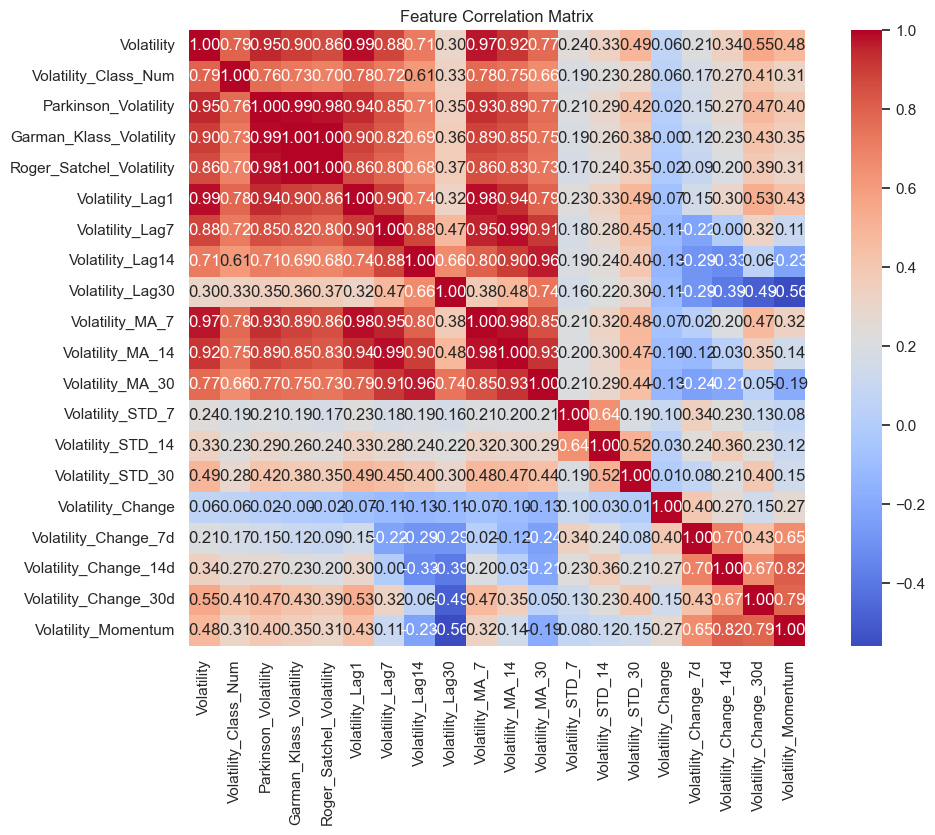

In [104]:
corr_matrix = X_train[best_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Feature Correlation Matrix")
plt.show()

##### Permutation Importance

In [105]:
model=LogisticRegression(
        class_weight="balanced",
        max_iter=1000,
        random_state=RANDOM_SEED,
    )

best_features = MINIMAL_VOL_FEATURE_SETS[best_feature_set_name]["features"]

# Train model with best feature set
model.fit(X_train[best_features], y_train_class)

# Check impoortnace
result = permutation_importance(
    model, X_val[best_features], y_val_class, n_repeats=10, random_state=RANDOM_SEED
)

# Display feature importance
importance_df = pd.DataFrame({
    "Feature": best_features,
    "Importance": result.importances_mean
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance (Permutation Importance):")
print(importance_df)


Feature Importance (Permutation Importance):
                    Feature  Importance
1      Volatility_Class_Num    0.127888
8     Volatility_Change_30d    0.117492
6          Volatility_MA_30    0.095545
2      Parkinson_Volatility    0.079208
0                Volatility    0.067987
3   Garman_Klass_Volatility    0.059241
7         Volatility_STD_30    0.057921
5          Volatility_Lag30    0.052145
4  Roger_Satchel_Volatility    0.036139


##### SHAP - SHapley Additive exPlanations (SHAP)

In [106]:
# Explain the model's predictions using SHAP
explainer = shap.Explainer(model, X_train[best_features])
shap_values = explainer(X_val[best_features])

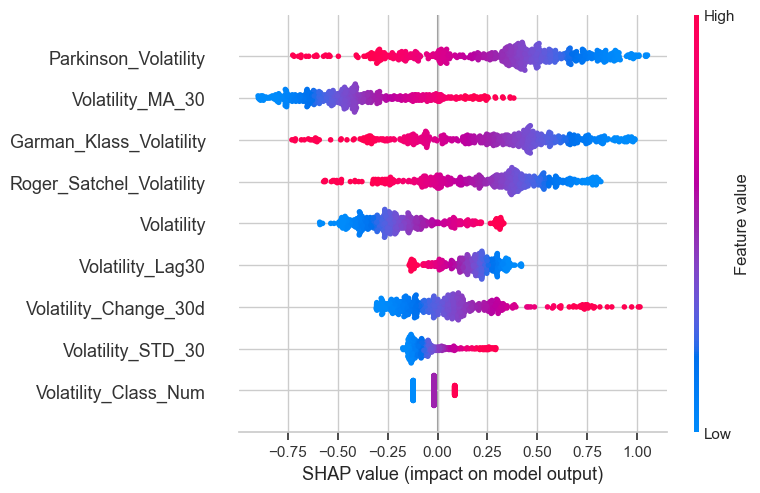

In [107]:
# Visualize the importance for Class 0 (Low Volatility)
class_0_shap_values = shap_values[:, :, 0]

shap.summary_plot(class_0_shap_values, X_val[best_features])

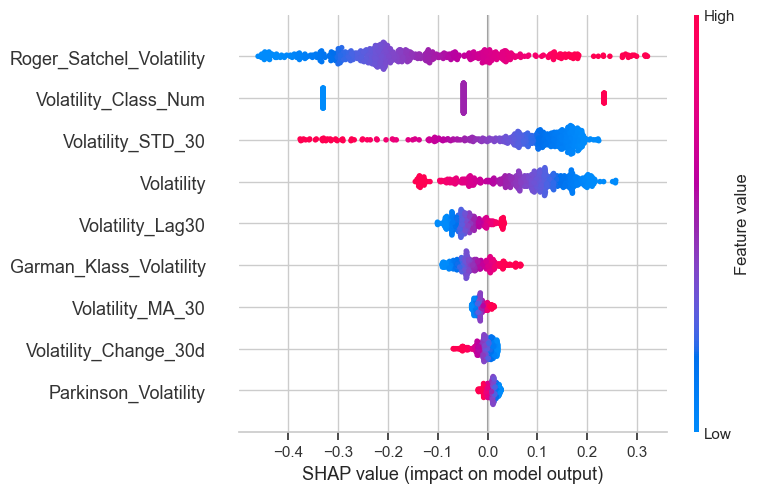

In [108]:
# Visualize the importance for Class 1 (Medium Volatility)
class_1_shap_values = shap_values[:, :, 1]

shap.summary_plot(class_1_shap_values, X_val[best_features])

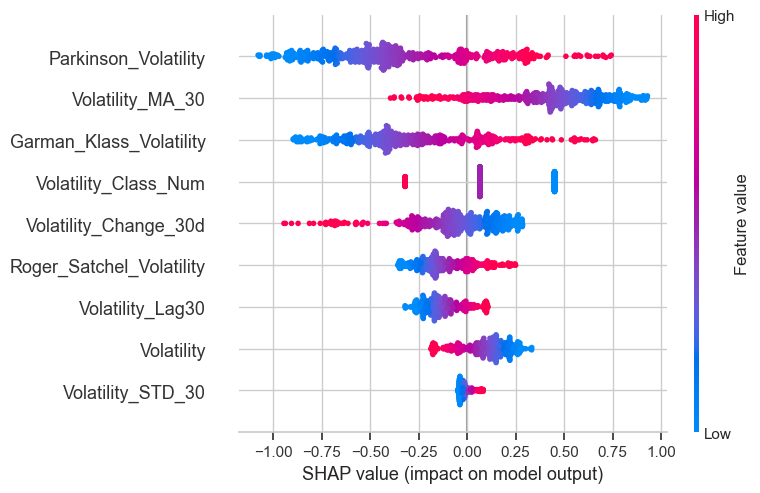

In [109]:
# Visualize the importance for Class 2 (High Volatility)
class_2_shap_values = shap_values[:, :, 2]

shap.summary_plot(class_2_shap_values, X_val[best_features])

We can try to exclude some high correlated features (different Volatility measures) and features that potentially are not very important for the model and check whether it improves the performance.

In [110]:
CUSTOM_FEATURE_SETS = {
    "simple_volatility": {
        "features": [
            "Volatility",
            "Volatility_Class_Num",
            "Volatility_MA_30",
            "Volatility_Lag30",
            "Volatility_Change_30d",
            "Volatility_Momentum"
        ],
        "lookback_days": 61,
    },
    "simple_volatility_with_month_features": {
        "features": [
            "Volatility",
            "Volatility_Class_Num",
            "Volatility_MA_30",
            "Volatility_Lag30",
            "Volatility_Change_30d",
            "Volatility_Momentum",
            "Month_Cos",
            "Month_Sin"
        ],
        "lookback_days": 61,
    },
    "advanced_estimator_suite": {
        "features": [
            "Parkinson_Volatility",
            "Garman_Klass_Volatility",
            "Roger_Satchel_Volatility",
            "Volatility_Class_Num",
            "Volatility_Change_30d"
        ],
        "lookback_days": 61,
    },
    "momentum_and_lag_focus": {
        "features": [
            "Volatility_Change_30d",
            "Volatility_Momentum",
            "Volatility_Lag14",
            "Volatility_Lag30",
            "Volatility_Change_14d",
            "Volatility_Class_Num"
        ],
        "lookback_days": 61,
    },
    "short_vs_long_window_mix": {
        "features": [
            "Volatility_MA_14",
            "Volatility_MA_30",
            "Volatility_STD_14",
            "Volatility_STD_30",
            "Volatility_Change_14d",
            "Volatility_Change_30d"
        ],
        "lookback_days": 61,
    },
    "comprehensive_ranked": {
        "features": [
            "Volatility_Change_30d",
            "Volatility_Class_Num",
            "Volatility_MA_14",
            "Parkinson_Volatility",
            "Volatility",
            "Volatility_STD_30",
            "Garman_Klass_Volatility",
            "Volatility_Lag14",
            "Volatility_Change_14d",
            "Month_Cos",
            "Month_Sin"
        ],
        "lookback_days": 61,
    }
}

In [111]:
lr_volatility_features_results = train_classifier_with_feature_sets(
    model=LogisticRegression(
        class_weight="balanced",
        max_iter=1000,
        random_state=RANDOM_SEED,
    ),
    model_name="Logistic Regression - Feature Set Comparison",
    feature_sets=CUSTOM_FEATURE_SETS,
    X_train=X_train,
    y_train=y_train_class,
    X_val=X_val,
    y_val=y_val_class,
    mapping=MAPPING,
    metric="F1_Macro",
    scale=True,
    verbose=True,
)


Training Logistic Regression - Feature Set Comparison with 6 feature sets
Optimizing for: F1_Macro
Scaling: Yes

Feature Set: simple_volatility
  Features: 6, Lookback: 61 days
  Training F1_Macro: 0.4483
  Validation F1_Macro: 0.2997
  Val Accuracy: 0.3729

Feature Set: simple_volatility_with_month_features
  Features: 8, Lookback: 61 days
  Training F1_Macro: 0.4497
  Validation F1_Macro: 0.3083
  Val Accuracy: 0.3597

Feature Set: advanced_estimator_suite
  Features: 5, Lookback: 61 days
  Training F1_Macro: 0.5257
  Validation F1_Macro: 0.4258
  Val Accuracy: 0.4422

Feature Set: momentum_and_lag_focus
  Features: 6, Lookback: 61 days
  Training F1_Macro: 0.4635
  Validation F1_Macro: 0.3270
  Val Accuracy: 0.3977

Feature Set: short_vs_long_window_mix
  Features: 6, Lookback: 61 days
  Training F1_Macro: 0.4862
  Validation F1_Macro: 0.3158
  Val Accuracy: 0.3894

Feature Set: comprehensive_ranked
  Features: 11, Lookback: 61 days
  Training F1_Macro: 0.5474
  Validation F1_Macro

We can see that none of the feature sets outperformed the previous best set, so we will stick with the `core_30d_only` feature set for our final model.

##### 5.6 Final Best Feature Set Selection

In [112]:
BEST_FEATURE_SET_NAME = "core_30d_only"
BEST_FEATURES = MINIMAL_VOL_FEATURE_SETS[BEST_FEATURE_SET_NAME]["features"]

print(f"Selected Feature Set: {BEST_FEATURE_SET_NAME}")
print("\nFeature List:")
for i, feature in enumerate(BEST_FEATURES, 1):
    print(f"  {i}. {feature}")

print(f"\nTotal features: {len(BEST_FEATURES)}")

Selected Feature Set: core_30d_only

Feature List:
  1. Volatility
  2. Volatility_Class_Num
  3. Parkinson_Volatility
  4. Garman_Klass_Volatility
  5. Roger_Satchel_Volatility
  6. Volatility_Lag30
  7. Volatility_MA_30
  8. Volatility_STD_30
  9. Volatility_Change_30d

Total features: 9


In [113]:
# Prepare best feature subsets for training
X_train_best = X_train[BEST_FEATURES]
X_val_best = X_val[BEST_FEATURES]
X_test_best = X_test[BEST_FEATURES]

##### 5.6 Hyperparameter Optimization: Regularization Strength
 
Now that we have the best feature set, we optimize the regularization parameter C.
Lower C values increase regularization, which can help prevent overfitting.

In [114]:
C_PARAMETERS = [0.01, 0.1, 0.5, 1, 5, 10]

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_best)
X_val_scaled = scaler.transform(X_val_best)

# Store results
c_tuning_results = []

for c in C_PARAMETERS:
    print(f"Training with C={c}...", end=" ")

    lr = LogisticRegression(
        class_weight="balanced",
        max_iter=1000,
        random_state=RANDOM_SEED,
        C=c,
    )
    lr.fit(X_train_scaled, y_train_class)

    y_pred_val = lr.predict(X_val_scaled)
    val_metrics = calculate_classification_metrics(
        y_val_class, y_pred_val, mapping=MAPPING
    )

    c_tuning_results.append(
        {
            "C": c,
            "F1_Macro": val_metrics["F1_Macro"],
            "Accuracy": val_metrics["Accuracy"],
            "F1_Low": val_metrics["F1_Low"],
            "F1_Normal": val_metrics["F1_Normal"],
            "F1_High": val_metrics["F1_High"],
        }
    )

    print(f"F1_Macro: {val_metrics['F1_Macro']:.6f}")

Training with C=0.01... F1_Macro: 0.404936
Training with C=0.1... F1_Macro: 0.523657
Training with C=0.5... F1_Macro: 0.509713
Training with C=1... F1_Macro: 0.497503
Training with C=5... F1_Macro: 0.472019
Training with C=10... F1_Macro: 0.470097


In [115]:
c_results_df = pd.DataFrame(c_tuning_results)
c_results_df = c_results_df.sort_values("F1_Macro", ascending=False)

print("\nRegularization Parameter (C) Tuning Results:")
print("=" * 100)
print(
    f"{'C Value':<10} {'F1_Macro':<12} {'Accuracy':<12} {'F1_Low':<12} {'F1_Normal':<12} {'F1_High':<12}"
)
print("-" * 100)

for _, row in c_results_df.iterrows():
    print(
        f"{row['C']:<10} {row['F1_Macro']:<12.6f} {row['Accuracy']:<12.6f} "
        f"{row['F1_Low']:<12.6f} {row['F1_Normal']:<12.6f} {row['F1_High']:<12.6f}"
    )

print("=" * 100)

# Identify optimal C
best_c = c_results_df.iloc[0]["C"]
best_c_f1 = c_results_df.iloc[0]["F1_Macro"]

print(f"\nOPTIMAL C VALUE: {best_c}")
print(f"   Validation F1-Macro: {best_c_f1:.6f}")
print(
    f"   Interpretation: {'Strong regularization' if best_c < 1 else 'Weak regularization'}"
)


Regularization Parameter (C) Tuning Results:
C Value    F1_Macro     Accuracy     F1_Low       F1_Normal    F1_High     
----------------------------------------------------------------------------------------------------
0.1        0.523657     0.541254     0.535865     0.583493     0.451613    
0.5        0.509713     0.524752     0.485393     0.595745     0.448000    
1.0        0.497503     0.513201     0.478555     0.585938     0.428016    
5.0        0.472019     0.491749     0.453704     0.583170     0.379182    
10.0       0.470097     0.491749     0.443396     0.586667     0.380228    
0.01       0.404936     0.443894     0.509532     0.415966     0.289308    

OPTIMAL C VALUE: 0.1
   Validation F1-Macro: 0.523657
   Interpretation: Strong regularization


##### 5.7 Final Model Configuration

Based on systematic experimentation, our final model configuration is:

**Feature Set:** core_30d_only
- Volatility_Class_Num
- Parkinson_Volatility
- Garman_Klass_Volatility
- Roger_Satchel_Volatility
- Volatility_Lag30
- Volatility_MA_30
- Volatility_STD_30
- Volatility_Change_30d

**Model:** Logistic Regression
- C = 0.1 (strong regularization)
- class_weight = "balanced"
- max_iter = 1000

This configuration balances predictive performance with model simplicity and
generalization capability.

In [116]:
FINAL_CLASSIFICATION_MODEL_CONFIG = {
    "model_type": "LogisticRegression",
    "C": 0.1,
    "class_weight": "balanced",
    "max_iter": 1000,
    "random_state": RANDOM_SEED,
    "features": BEST_FEATURES,
    "n_features": len(BEST_FEATURES),
    "scaling": "StandardScaler",
}

print("Final Model Configuration:")
print("=" * 80)
for key, value in FINAL_CLASSIFICATION_MODEL_CONFIG.items():
    if key != "features":
        print(f"  {key}: {value}")
print("=" * 80)

Final Model Configuration:
  model_type: LogisticRegression
  C: 0.1
  class_weight: balanced
  max_iter: 1000
  random_state: 2137
  n_features: 9
  scaling: StandardScaler


### 6. Final Model Training and Validation


#### 6.1 Train Final Model with Optimal Configuration and Evaluate on Validation Set

In [117]:
# Initialize final model
final_classification_model = LogisticRegression(
    C=FINAL_CLASSIFICATION_MODEL_CONFIG["C"],
    max_iter=FINAL_CLASSIFICATION_MODEL_CONFIG["max_iter"],
    class_weight=FINAL_CLASSIFICATION_MODEL_CONFIG["class_weight"],
    random_state=FINAL_CLASSIFICATION_MODEL_CONFIG["random_state"],
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_best)
X_val_scaled = scaler.transform(X_val_best)

# Train model
final_classification_model.fit(X_train_scaled, y_train_class)
print("Model training complete\n")

# Validation predictions
final_val_pred = final_classification_model.predict(X_val_scaled)
final_val_metrics = calculate_classification_metrics(
    y_val_class, final_val_pred, mapping=MAPPING
)

print("VALIDATION SET PERFORMANCE")
print("=" * 80)
for metric, value in final_val_metrics.items():
    print(f"  {metric:<20s}: {value:.6f}")
print("=" * 80)

Model training complete

VALIDATION SET PERFORMANCE
  Accuracy            : 0.541254
  Precision_Macro     : 0.528410
  Recall_Macro        : 0.551894
  F1_Macro            : 0.523657
  Precision_Weighted  : 0.591729
  Recall_Weighted     : 0.541254
  F1_Weighted         : 0.547952
  Precision_Low       : 0.468635
  Recall_Low          : 0.625616
  F1_Low              : 0.535865
  Precision_Normal    : 0.730769
  Recall_Normal       : 0.485623
  F1_Normal           : 0.583493
  Precision_High      : 0.385827
  Recall_High         : 0.544444
  F1_High             : 0.451613


### 7. Save the best model and its parameters for future use

In [118]:
model_data = {
    "model": final_classification_model,
    "scaler": scaler,
    "C": FINAL_CLASSIFICATION_MODEL_CONFIG["C"],
    "max_iter": FINAL_CLASSIFICATION_MODEL_CONFIG["max_iter"],
    "class_weight": FINAL_CLASSIFICATION_MODEL_CONFIG["class_weight"],
    "features": FINAL_CLASSIFICATION_MODEL_CONFIG["features"],
}

path = "volatility_models/final_classification_model.pkl"
os.makedirs(os.path.dirname(path), exist_ok=True)

with open(path, "wb") as f:
    pickle.dump(model_data, f)

## Comparison of Regression and Classification Approaches for Volatility Prediction

### Map Regression Task Results into Volatility Classes and Evaluate Classification Metrics

We've developed two different approaches to volatility prediction:

1. **Regression Approach**: Directly predicting continuous volatility values
2. **Classification Approach**: Predicting discrete volatility classes (Low, Medium, High)

To fairly compare these approaches, we convert regression predictions into volatility
classes using the same thresholds and evaluate them with classification metrics.
This allows us to assess whether the added complexity of regression modeling provides
benefits over the simpler classification approach.

**Evaluation Strategy**

- Convert regression predictions to classes using training set thresholds
- Calculate classification metrics (F1-Macro, Accuracy, per-class F1)
- Compare confusion matrices
- Analyze strengths and weaknesses of each approach
- Determine which method is more suitable for practical volatility prediction


#### 1. Load best models

In [119]:
# Load regression model
with open("volatility_models/final_regression_model.pkl", "rb") as f:
    regression_model_data = pickle.load(f)

final_regression_model = regression_model_data["model"]
regression_scaler = regression_model_data["scaler"]
features_regression = regression_model_data["features"]

# Load classification model
with open("volatility_models/final_classification_model.pkl", "rb") as f:
    classification_model_data = pickle.load(f)

final_classification_model = classification_model_data["model"]
classification_scaler = classification_model_data["scaler"]
features_classification = classification_model_data["features"]
print("Models loaded successfully")

Models loaded successfully


#### 2. Compare regression and classification models on the validation set using classification metrics

In [120]:
# Get regression predictions on validation set
X_val_reg_scaled = regression_scaler.transform(X_val[features_regression])
regression_val_predictions = final_regression_model.predict(X_val_reg_scaled)

# Get classification predictions on validation set
X_val_class_scaled = classification_scaler.transform(X_val[features_classification])
classification_val_predictions = final_classification_model.predict(X_val_class_scaled)

# Map regression predictions to classes
regression_val_predictions_class = np.array(
    [MAPPING[classify_volatility(pred)] for pred in regression_val_predictions]
)

# Get true classes
y_val_class = np.array([MAPPING[classify_volatility(vol)] for vol in y_val])

# Calculate metrics for both approaches
regression_metrics = calculate_classification_metrics(
    y_val_class,
    regression_val_predictions_class,
    mapping={v: k for k, v in MAPPING.items()},
)

classification_metrics = calculate_classification_metrics(
    y_val_class,
    classification_val_predictions,
    mapping={v: k for k, v in MAPPING.items()},
)

# Compare results
comparison_df = pd.DataFrame(
    {
        "Ridge Regression (mapped to classes)": regression_metrics,
        "Logistic Regression (classification)": classification_metrics,
    }
).T

In [121]:
comparison_df

Accuracy  Precision_Macro  Recall_Macro  \
Ridge Regression (mapped to classes)  0.435644         0.263201      0.426281   
Logistic Regression (classification)  0.541254         0.528410      0.551894   

                                      F1_Macro  Precision_Weighted  \
Ridge Regression (mapped to classes)  0.319899            0.307637   
Logistic Regression (classification)  0.523657            0.591729   

                                      Recall_Weighted  F1_Weighted  \
Ridge Regression (mapped to classes)         0.435644     0.357060   
Logistic Regression (classification)         0.541254     0.547952   

                                      Precision_0  Recall_0      F1_0  \
Ridge Regression (mapped to classes)     0.000000  0.000000  0.000000   
Logistic Regression (classification)     0.468635  0.625616  0.535865   

                                      Precision_1  Recall_1      F1_1  \
Ridge Regression (mapped to classes)     0.517327  0.667732  0.582985   
Logistic Regression (classification)     0.730769  0.485623  0.583493   

                                      Precision_2  Recall_2      F1_2  
Ridge Regression (mapped to classes)     0.272277  0.611111  0.376712  
Logistic Regression (classification)     0.385827  0.544444  0.451613

In [122]:
print("=" * 100)
print("VALIDATION SET COMPARISON: REGRESSION vs CLASSIFICATION")


# Determine winner
if classification_metrics["F1_Macro"] > regression_metrics["F1_Macro"]:
    print(
        f"\nWinner: Classification approach (+{classification_metrics['F1_Macro'] - regression_metrics['F1_Macro']:.4f} F1-Macro)"
    )
else:
    print(
        f"\nWinner: Regression approach (+{regression_metrics['F1_Macro'] - classification_metrics['F1_Macro']:.4f} F1-Macro)"
    )
print("=" * 100)

VALIDATION SET COMPARISON: REGRESSION vs CLASSIFICATION

Winner: Classification approach (+0.2038 F1-Macro)


**Classification approach significantly outperforms regression** (mapped to classes) on the validation set with a **+22.5% improvement in F1-Macro score**.

**Conclusion:** The **Logistic Regression classification model** is the preferred choice. The direct classification is better suited for this task than continuous regression followed by threshold-based mapping.

## Evaluating best model on the test set

In [123]:
# Get classification predictions on test set
X_test_scaled = classification_scaler.transform(X_test[features_classification])
final_test_pred = final_classification_model.predict(X_test_scaled)

# Get true classes
y_test_class = np.array([MAPPING[classify_volatility(vol)] for vol in y_test])

# Calculate final test metrics
final_test_metrics = calculate_classification_metrics(
    y_test_class, final_test_pred, mapping={v: k for k, v in MAPPING.items()}
)

print("\nFINAL TEST SET PERFORMANCE:")
print("-" * 100)
for metric, value in final_test_metrics.items():
    print(f"  {metric:<20s}: {value:.6f}")
print("=" * 100)


FINAL TEST SET PERFORMANCE:
----------------------------------------------------------------------------------------------------
  Accuracy            : 0.469522
  Precision_Macro     : 0.461740
  Recall_Macro        : 0.471240
  F1_Macro            : 0.423738
  Precision_Weighted  : 0.576505
  Recall_Weighted     : 0.469522
  F1_Weighted         : 0.497981
  Precision_0         : 0.743590
  Recall_0            : 0.432836
  F1_0                : 0.547170
  Precision_1         : 0.493243
  Recall_1            : 0.501718
  F1_1                : 0.497445
  Precision_2         : 0.148387
  Recall_2            : 0.479167
  F1_2                : 0.226601


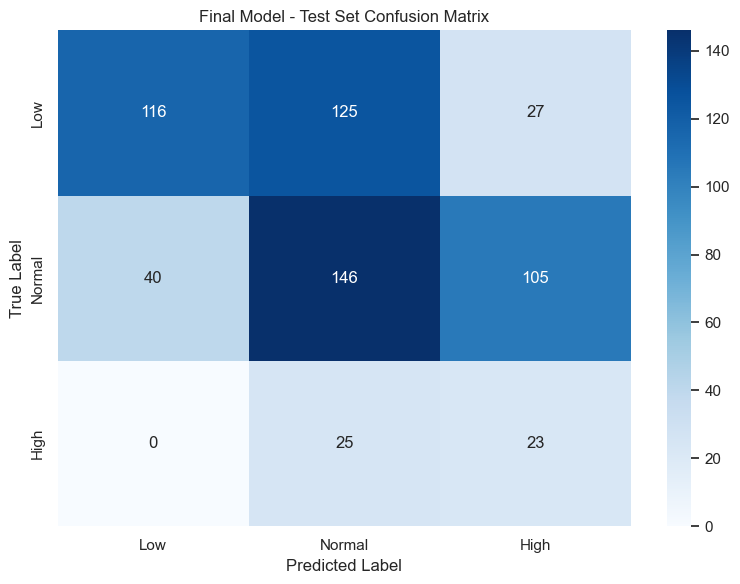


Classification Report:
              precision    recall  f1-score   support

         Low       0.74      0.43      0.55       268
      Normal       0.49      0.50      0.50       291
        High       0.15      0.48      0.23        48

    accuracy                           0.47       607
   macro avg       0.46      0.47      0.42       607
weighted avg       0.58      0.47      0.50       607



In [124]:
# Plot confusion matrix
plot_confusion_matrix(
    y_test_class,
    final_test_pred,
    mapping=MAPPING,
    title="Final Model - Test Set Confusion Matrix",
)

## Error Analysis of Final Model on Test Set


Now that we have our final model, we perform a comprehensive error analysis to:
1. Understand where and why the model makes mistakes
2. Identify patterns in misclassifications
3. Discover potential areas for improvement
4. Assess model reliability across different market conditions

This analysis will help us understand the model's limitations and guide future improvements.

#### 7.1 Prepare Error Analysis Dataset

Create a comprehensive dataframe with predictions, probabilities, and error flags.

In [125]:
final_test_proba = final_classification_model.predict_proba(X_test_scaled)

inverted_mapping = {v: k for k, v in MAPPING.items()}

# Create analysis dataframe
error_analysis_df = pd.DataFrame(
    {
        "true_class": y_test_class,
        "predicted_class": final_test_pred,
        "correct": y_test_class == final_test_pred,
        "error": y_test_class != final_test_pred,
        "prob_low": final_test_proba[:, 0],
        "prob_normal": final_test_proba[:, 1],
        "prob_high": final_test_proba[:, 2],
        "max_prob": final_test_proba.max(axis=1),
        "true_class_name": [inverted_mapping[c] for c in y_test_class],
        "predicted_class_name": [inverted_mapping[c] for c in final_test_pred],
    }
)

# Add actual volatility values
error_analysis_df["actual_volatility"] = y_test.values

# Add date index
error_analysis_df.index = y_test.index

# Calculate confidence (max probability)
error_analysis_df["confidence"] = error_analysis_df["max_prob"]

# Display summary
print("\nError Analysis Dataset Summary:")
print("=" * 80)
print(f"Total samples: {len(error_analysis_df)}")
print(
    f"Correct predictions: {error_analysis_df['correct'].sum()} ({error_analysis_df['correct'].mean() * 100:.2f}%)"
)
print(
    f"Incorrect predictions: {error_analysis_df['error'].sum()} ({error_analysis_df['error'].mean() * 100:.2f}%)"
)
print("=" * 80)

# Sample of error cases
print("\nSample of Error Cases:")
error_analysis_df[error_analysis_df["error"]].head(10)


Error Analysis Dataset Summary:
Total samples: 607
Correct predictions: 285 (46.95%)
Incorrect predictions: 322 (53.05%)

Sample of Error Cases:


true_class  predicted_class  correct  error  prob_low  \
Date                                                                
2024-05-11           1                2    False   True  0.033711   
2024-05-12           1                2    False   True  0.043126   
2024-05-13           1                2    False   True  0.062109   
2024-05-14           1                2    False   True  0.064548   
2024-05-15           0                2    False   True  0.077747   
2024-05-16           0                2    False   True  0.082136   
2024-05-17           0                1    False   True  0.090281   
2024-05-18           0                1    False   True  0.103397   
2024-05-19           0                1    False   True  0.200054   
2024-05-20           0                1    False   True  0.216188   

            prob_normal  prob_high  max_prob true_class_name  \
Date                                                           
2024-05-11     0.341194   0.625095  0.625095          Normal   
2024-05-12     0.365762   0.591111  0.591111          Normal   
2024-05-13     0.399576   0.538315  0.538315          Normal   
2024-05-14     0.410049   0.525403  0.525403          Normal   
2024-05-15     0.423892   0.498361  0.498361             Low   
2024-05-16     0.435523   0.482340  0.482340             Low   
2024-05-17     0.460019   0.449700  0.460019             Low   
2024-05-18     0.479911   0.416692  0.479911             Low   
2024-05-19     0.485785   0.314161  0.485785             Low   
2024-05-20     0.474668   0.309144  0.474668             Low   

           predicted_class_name  actual_volatility  confidence  
Date                                                            
2024-05-11                 High           0.450461    0.625095  
2024-05-12                 High           0.467204    0.591111  
2024-05-13                 High           0.463024    0.538315  
2024-05-14                 High           0.463240    0.525403  
2024-05-15                 High           0.387785    0.498361  
2024-05-16                 High           0.383748    0.482340  
2024-05-17               Normal           0.371988    0.460019  
2024-05-18               Normal           0.372021    0.479911  
2024-05-19               Normal           0.377281    0.485785  
2024-05-20               Normal           0.260303    0.474668

#### 7.2 Enhanced Confusion Matrix Analysis

Create detailed confusion matrix with both counts and percentages

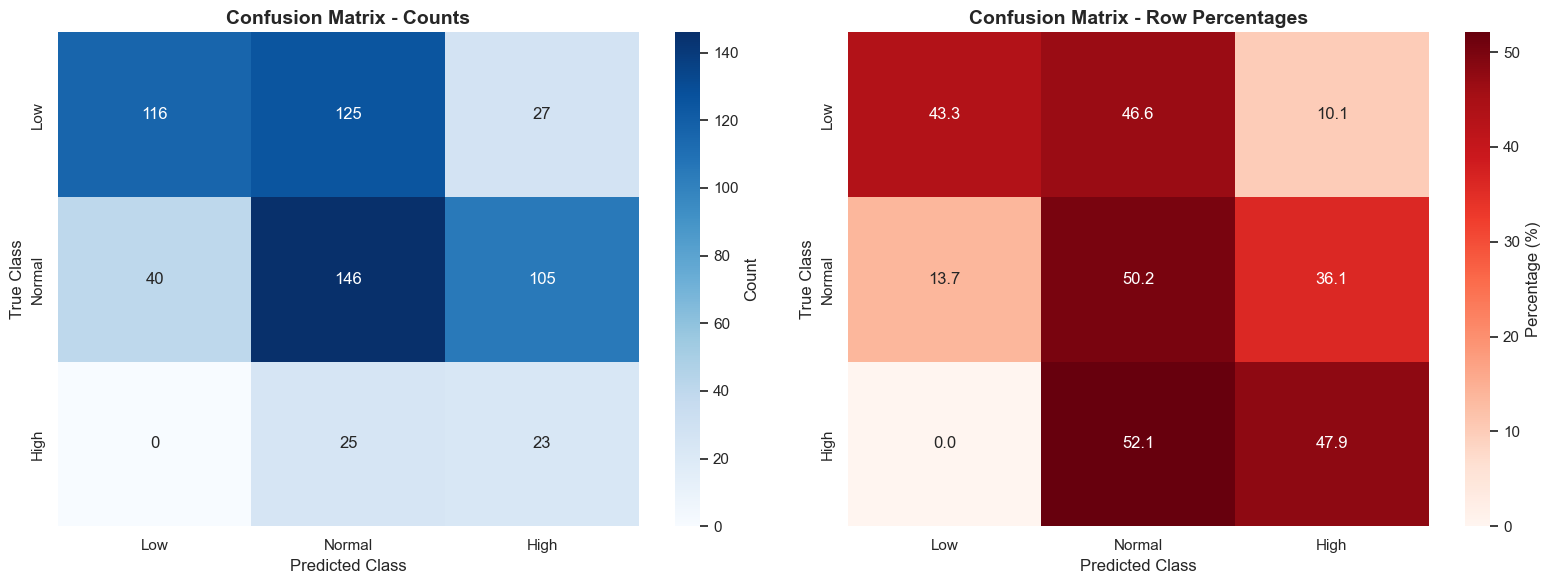

In [126]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test_class, final_test_pred)

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Counts
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=[inverted_mapping[i] for i in range(3)],
    yticklabels=[inverted_mapping[i] for i in range(3)],
    ax=axes[0],
    cbar_kws={"label": "Count"},
)
axes[0].set_title("Confusion Matrix - Counts", fontsize=14, fontweight="bold")
axes[0].set_ylabel("True Class", fontsize=12)
axes[0].set_xlabel("Predicted Class", fontsize=12)

# Plot 2: Percentages (row-normalized)
cm_percent = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(
    cm_percent,
    annot=True,
    fmt=".1f",
    cmap="Reds",
    xticklabels=[inverted_mapping[i] for i in range(3)],
    yticklabels=[inverted_mapping[i] for i in range(3)],
    ax=axes[1],
    cbar_kws={"label": "Percentage (%)"},
)
axes[1].set_title("Confusion Matrix - Row Percentages", fontsize=14, fontweight="bold")
axes[1].set_ylabel("True Class", fontsize=12)
axes[1].set_xlabel("Predicted Class", fontsize=12)

plt.tight_layout()
plt.show()

In [127]:
# Detailed confusion analysis
print("\nDetailed Confusion Matrix Analysis:")
print("=" * 80)
for i, true_label in enumerate([inverted_mapping[j] for j in range(3)]):
    print(f"\nTrue Class: {true_label}")
    total = cm[i].sum()
    for j, pred_label in enumerate([inverted_mapping[k] for k in range(3)]):
        count = cm[i, j]
        pct = (count / total * 100) if total > 0 else 0
        status = "Correct" if i == j else "Error"
        print(f"Predicted as {pred_label}: {count} ({pct:.1f}%) {status}")
print("=" * 80)


Detailed Confusion Matrix Analysis:

True Class: Low
Predicted as Low: 116 (43.3%) Correct
Predicted as Normal: 125 (46.6%) Error
Predicted as High: 27 (10.1%) Error

True Class: Normal
Predicted as Low: 40 (13.7%) Error
Predicted as Normal: 146 (50.2%) Correct
Predicted as High: 105 (36.1%) Error

True Class: High
Predicted as Low: 0 (0.0%) Error
Predicted as Normal: 25 (52.1%) Error
Predicted as High: 23 (47.9%) Correct


#### 7.3 Misclassification Pattern Analysis

Identify the most frequent types of errors

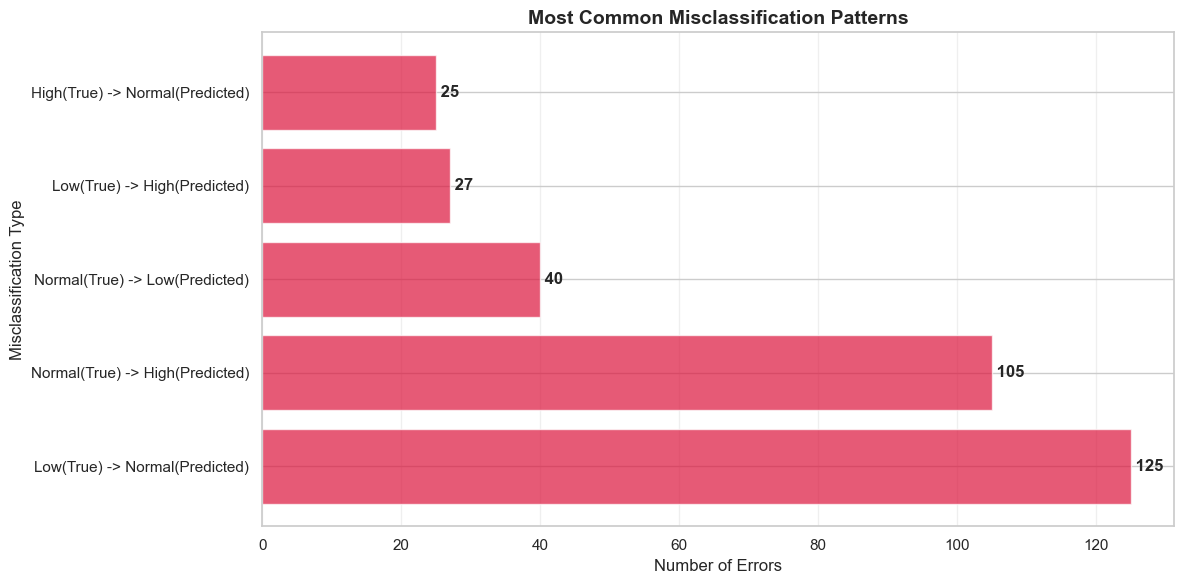

In [128]:
# Misclassification summary
misclass_patterns = []
for true_cls in range(3):
    for pred_cls in range(3):
        if true_cls != pred_cls:
            count = ((y_test_class == true_cls) & (final_test_pred == pred_cls)).sum()
            if count > 0:
                misclass_patterns.append(
                    {
                        "True Class": inverted_mapping[true_cls],
                        "Predicted As": inverted_mapping[pred_cls],
                        "Count": count,
                        "Error Type": f"{inverted_mapping[true_cls]}(True) -> {inverted_mapping[pred_cls]}(Predicted)",
                    }
                )

misclass_df = pd.DataFrame(misclass_patterns).sort_values("Count", ascending=False)

# Visualize misclassification patterns
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(
    misclass_df["Error Type"], misclass_df["Count"], color="crimson", alpha=0.7
)
ax.set_xlabel("Number of Errors", fontsize=12)
ax.set_ylabel("Misclassification Type", fontsize=12)
ax.set_title("Most Common Misclassification Patterns", fontsize=14, fontweight="bold")
ax.grid(axis="x", alpha=0.3)

# Add count labels
for bar in bars:
    width = bar.get_width()
    ax.text(
        width,
        bar.get_y() + bar.get_height() / 2,
        f" {int(width)}",
        ha="left",
        va="center",
        fontweight="bold",
    )

plt.tight_layout()
plt.show()

In [129]:
# Summary
print("\nMisclassification Pattern Summary:")
print("=" * 80)
print(misclass_df.to_string(index=False))
print("=" * 80)

# Calculate severity of errors
print("\nError Severity Analysis:")
print("Adjacent class errors (e.g., Normal->High): Less severe")
print("Distant class errors (e.g., Low->High): More severe")
print()
adjacent_errors = misclass_df[
    misclass_df["Error Type"].isin(
        [
            "Low(True) -> Normal(Predicted)",
            "Normal(True) -> Low(Predicted)",
            "Normal(True) -> High(Predicted)",
            "High(True) -> Normal(Predicted)",
        ]
    )
]["Count"].sum()
distant_errors = misclass_df[
    misclass_df["Error Type"].isin(
        ["Low(True) -> High(Predicted)", "High(True) -> Low(Predicted)"]
    )
]["Count"].sum()
total_errors = error_analysis_df["error"].sum()

print(
    f"Adjacent class errors: {adjacent_errors} ({adjacent_errors / total_errors * 100:.1f}%)"
)
print(
    f"Distant class errors: {distant_errors} ({distant_errors / total_errors * 100:.1f}%)"
)
print("=" * 80)


Misclassification Pattern Summary:
True Class Predicted As  Count                      Error Type
       Low       Normal    125  Low(True) -> Normal(Predicted)
    Normal         High    105 Normal(True) -> High(Predicted)
    Normal          Low     40  Normal(True) -> Low(Predicted)
       Low         High     27    Low(True) -> High(Predicted)
      High       Normal     25 High(True) -> Normal(Predicted)

Error Severity Analysis:
Adjacent class errors (e.g., Normal->High): Less severe
Distant class errors (e.g., Low->High): More severe

Adjacent class errors: 295 (91.6%)
Distant class errors: 27 (8.4%)


#### 7.4 Temporal Error Distribution

Analyze how errors are distributed over time and their relationship with volatility


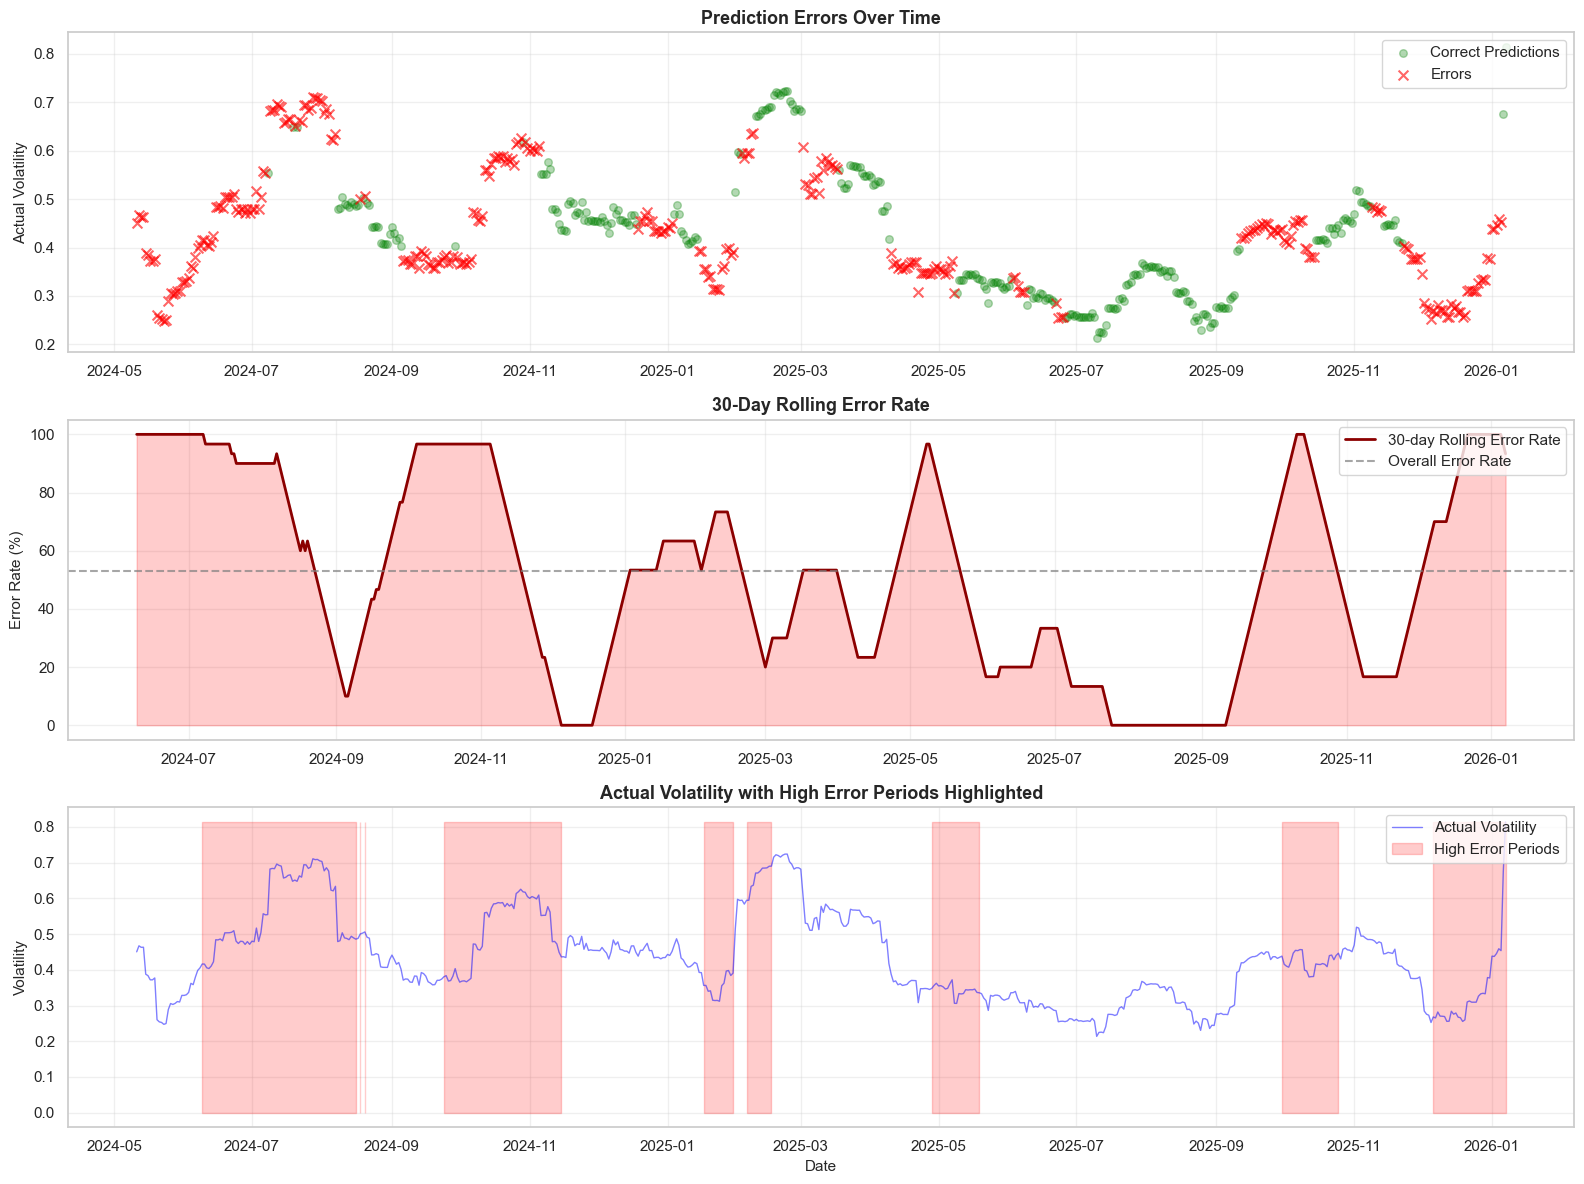

In [130]:
# Figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(16, 12))

# Plot 1: Errors over time
axes[0].scatter(
    error_analysis_df.index[error_analysis_df["correct"]],
    error_analysis_df.loc[error_analysis_df["correct"], "actual_volatility"],
    c="green",
    alpha=0.3,
    s=30,
    label="Correct Predictions",
)
axes[0].scatter(
    error_analysis_df.index[error_analysis_df["error"]],
    error_analysis_df.loc[error_analysis_df["error"], "actual_volatility"],
    c="red",
    alpha=0.6,
    s=50,
    marker="x",
    label="Errors",
)
axes[0].set_ylabel("Actual Volatility", fontsize=11)
axes[0].set_title("Prediction Errors Over Time", fontsize=13, fontweight="bold")
axes[0].legend(loc="upper right")
axes[0].grid(alpha=0.3)

# Plot 2: Rolling error rate
window = 30
error_analysis_df["error_numeric"] = error_analysis_df["error"].astype(int)
rolling_error_rate = (
    error_analysis_df["error_numeric"].rolling(window=window).mean() * 100
)

axes[1].plot(
    error_analysis_df.index,
    rolling_error_rate,
    color="darkred",
    linewidth=2,
    label=f"{window}-day Rolling Error Rate",
)
axes[1].axhline(
    y=error_analysis_df["error"].mean() * 100,
    color="gray",
    linestyle="--",
    alpha=0.7,
    label="Overall Error Rate",
)
axes[1].fill_between(
    error_analysis_df.index, 0, rolling_error_rate, color="red", alpha=0.2
)
axes[1].set_ylabel("Error Rate (%)", fontsize=11)
axes[1].set_title(f"{window}-Day Rolling Error Rate", fontsize=13, fontweight="bold")
axes[1].legend(loc="upper right")
axes[1].grid(alpha=0.3)

# Plot 3: Actual volatility over time with error highlighting
axes[2].plot(
    error_analysis_df.index,
    error_analysis_df["actual_volatility"],
    color="blue",
    alpha=0.5,
    linewidth=1,
    label="Actual Volatility",
)
# Highlight high error periods
high_error_threshold = (
    error_analysis_df["error"].mean() + error_analysis_df["error"].std()
)
high_error_periods = rolling_error_rate > (error_analysis_df["error"].mean() * 100 + 10)
axes[2].fill_between(
    error_analysis_df.index,
    0,
    error_analysis_df["actual_volatility"].max(),
    where=high_error_periods,
    color="red",
    alpha=0.2,
    label="High Error Periods",
)
axes[2].set_ylabel("Volatility", fontsize=11)
axes[2].set_xlabel("Date", fontsize=11)
axes[2].set_title(
    "Actual Volatility with High Error Periods Highlighted",
    fontsize=13,
    fontweight="bold",
)
axes[2].legend(loc="upper right")
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [131]:
# Identify periods with highest error rates
print("\nPeriods with Highest Error Rates:")
print("=" * 80)
error_by_month = (
    error_analysis_df.groupby(error_analysis_df.index.to_period("M"))["error"]
    .mean()
    .sort_values(ascending=False)
)
print(error_by_month.head(10).to_string())
print("=" * 80)


Periods with Highest Error Rates:
Date
2024-05    1.000000
2024-06    1.000000
2025-12    1.000000
2024-10    0.967742
2024-07    0.903226
2024-09    0.800000
2026-01    0.714286
2025-04    0.700000
2025-09    0.633333
2025-01    0.612903
Freq: M


#### 7.5 Error Rate by True Class

Analyze which volatility classes are most difficult to predict


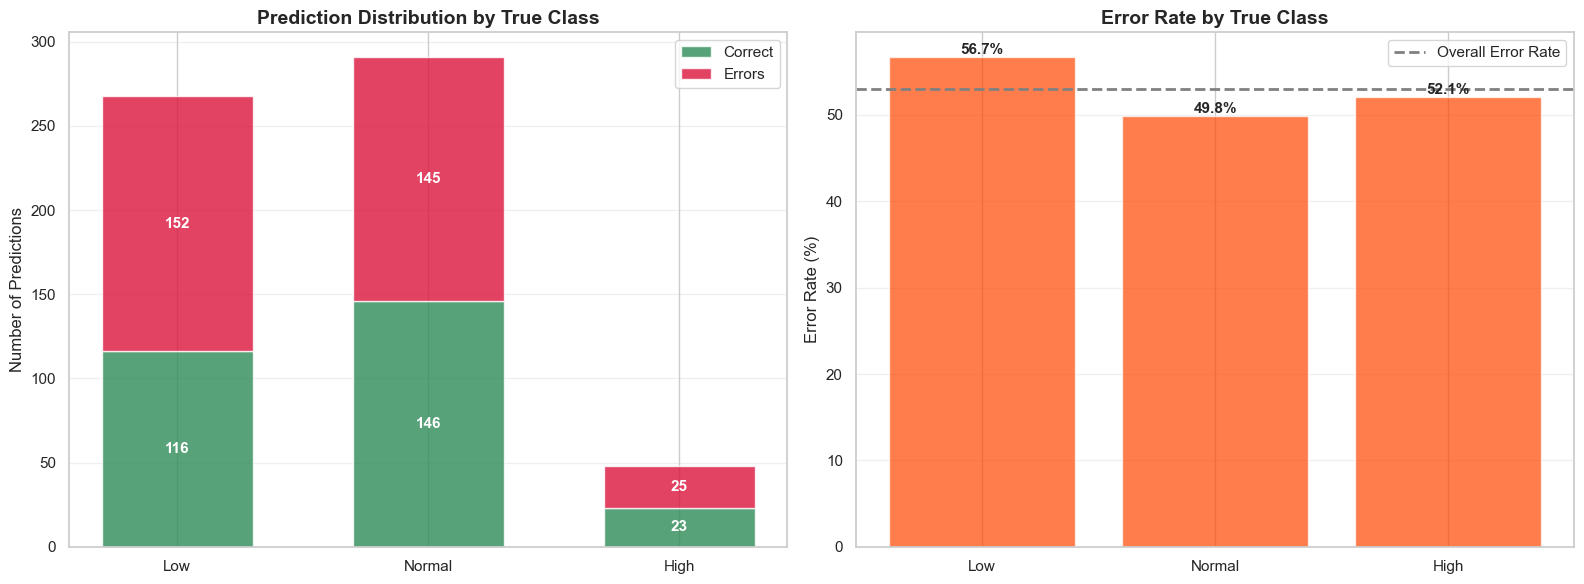

In [132]:
# Calculate metrics per class
class_error_analysis = []
for cls in range(3):
    class_mask = y_test_class == cls
    total = class_mask.sum()
    errors = (error_analysis_df.loc[class_mask, "error"]).sum()
    error_rate = errors / total * 100 if total > 0 else 0

    class_error_analysis.append(
        {
            "Class": inverted_mapping[cls],
            "Total Samples": total,
            "Errors": errors,
            "Correct": total - errors,
            "Error Rate (%)": error_rate,
            "Accuracy (%)": 100 - error_rate,
        }
    )

class_error_df = pd.DataFrame(class_error_analysis)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Stacked bar chart
classes = class_error_df["Class"]
correct = class_error_df["Correct"]
errors = class_error_df["Errors"]

x = np.arange(len(classes))
width = 0.6

bars1 = axes[0].bar(x, correct, width, label="Correct", color="seagreen", alpha=0.8)
bars2 = axes[0].bar(
    x, errors, width, bottom=correct, label="Errors", color="crimson", alpha=0.8
)

axes[0].set_ylabel("Number of Predictions", fontsize=12)
axes[0].set_title(
    "Prediction Distribution by True Class", fontsize=14, fontweight="bold"
)
axes[0].set_xticks(x)
axes[0].set_xticklabels(classes)
axes[0].legend()
axes[0].grid(axis="y", alpha=0.3)

# Add count labels
for bar1, bar2 in zip(bars1, bars2):
    h1 = bar1.get_height()
    h2 = bar2.get_height()
    axes[0].text(
        bar1.get_x() + bar1.get_width() / 2,
        h1 / 2,
        f"{int(h1)}",
        ha="center",
        va="center",
        fontweight="bold",
        color="white",
        fontsize=11,
    )
    if h2 > 0:
        axes[0].text(
            bar2.get_x() + bar2.get_width() / 2,
            h1 + h2 / 2,
            f"{int(h2)}",
            ha="center",
            va="center",
            fontweight="bold",
            color="white",
            fontsize=11,
        )

# Plot 2: Error rate comparison
bars = axes[1].bar(
    classes, class_error_df["Error Rate (%)"], color="orangered", alpha=0.7
)
axes[1].axhline(
    y=error_analysis_df["error"].mean() * 100,
    color="gray",
    linestyle="--",
    linewidth=2,
    label="Overall Error Rate",
)
axes[1].set_ylabel("Error Rate (%)", fontsize=12)
axes[1].set_title("Error Rate by True Class", fontsize=14, fontweight="bold")
axes[1].legend()
axes[1].grid(axis="y", alpha=0.3)

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    axes[1].text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.1f}%",
        ha="center",
        va="bottom",
        fontweight="bold",
        fontsize=11,
    )

plt.tight_layout()
plt.show()

In [133]:
# Print detailed table
print("\nError Analysis by True Class:")
class_error_df


Error Analysis by True Class:


Class  Total Samples  Errors  Correct  Error Rate (%)  Accuracy (%)
0     Low            268     152      116       56.716418     43.283582
1  Normal            291     145      146       49.828179     50.171821
2    High             48      25       23       52.083333     47.916667

In [134]:
# Identify hardest class
hardest_class = class_error_df.loc[class_error_df["Error Rate (%)"].idxmax(), "Class"]
hardest_error_rate = class_error_df["Error Rate (%)"].max()
print(
    f"\nMost Difficult Class to Predict: {hardest_class} ({hardest_error_rate:.1f}% error rate)"
)


Most Difficult Class to Predict: Low (56.7% error rate)


#### 7.6 Feature Analysis: Correct vs Incorrect Predictions
Compare feature distributions between correct and incorrect predictions

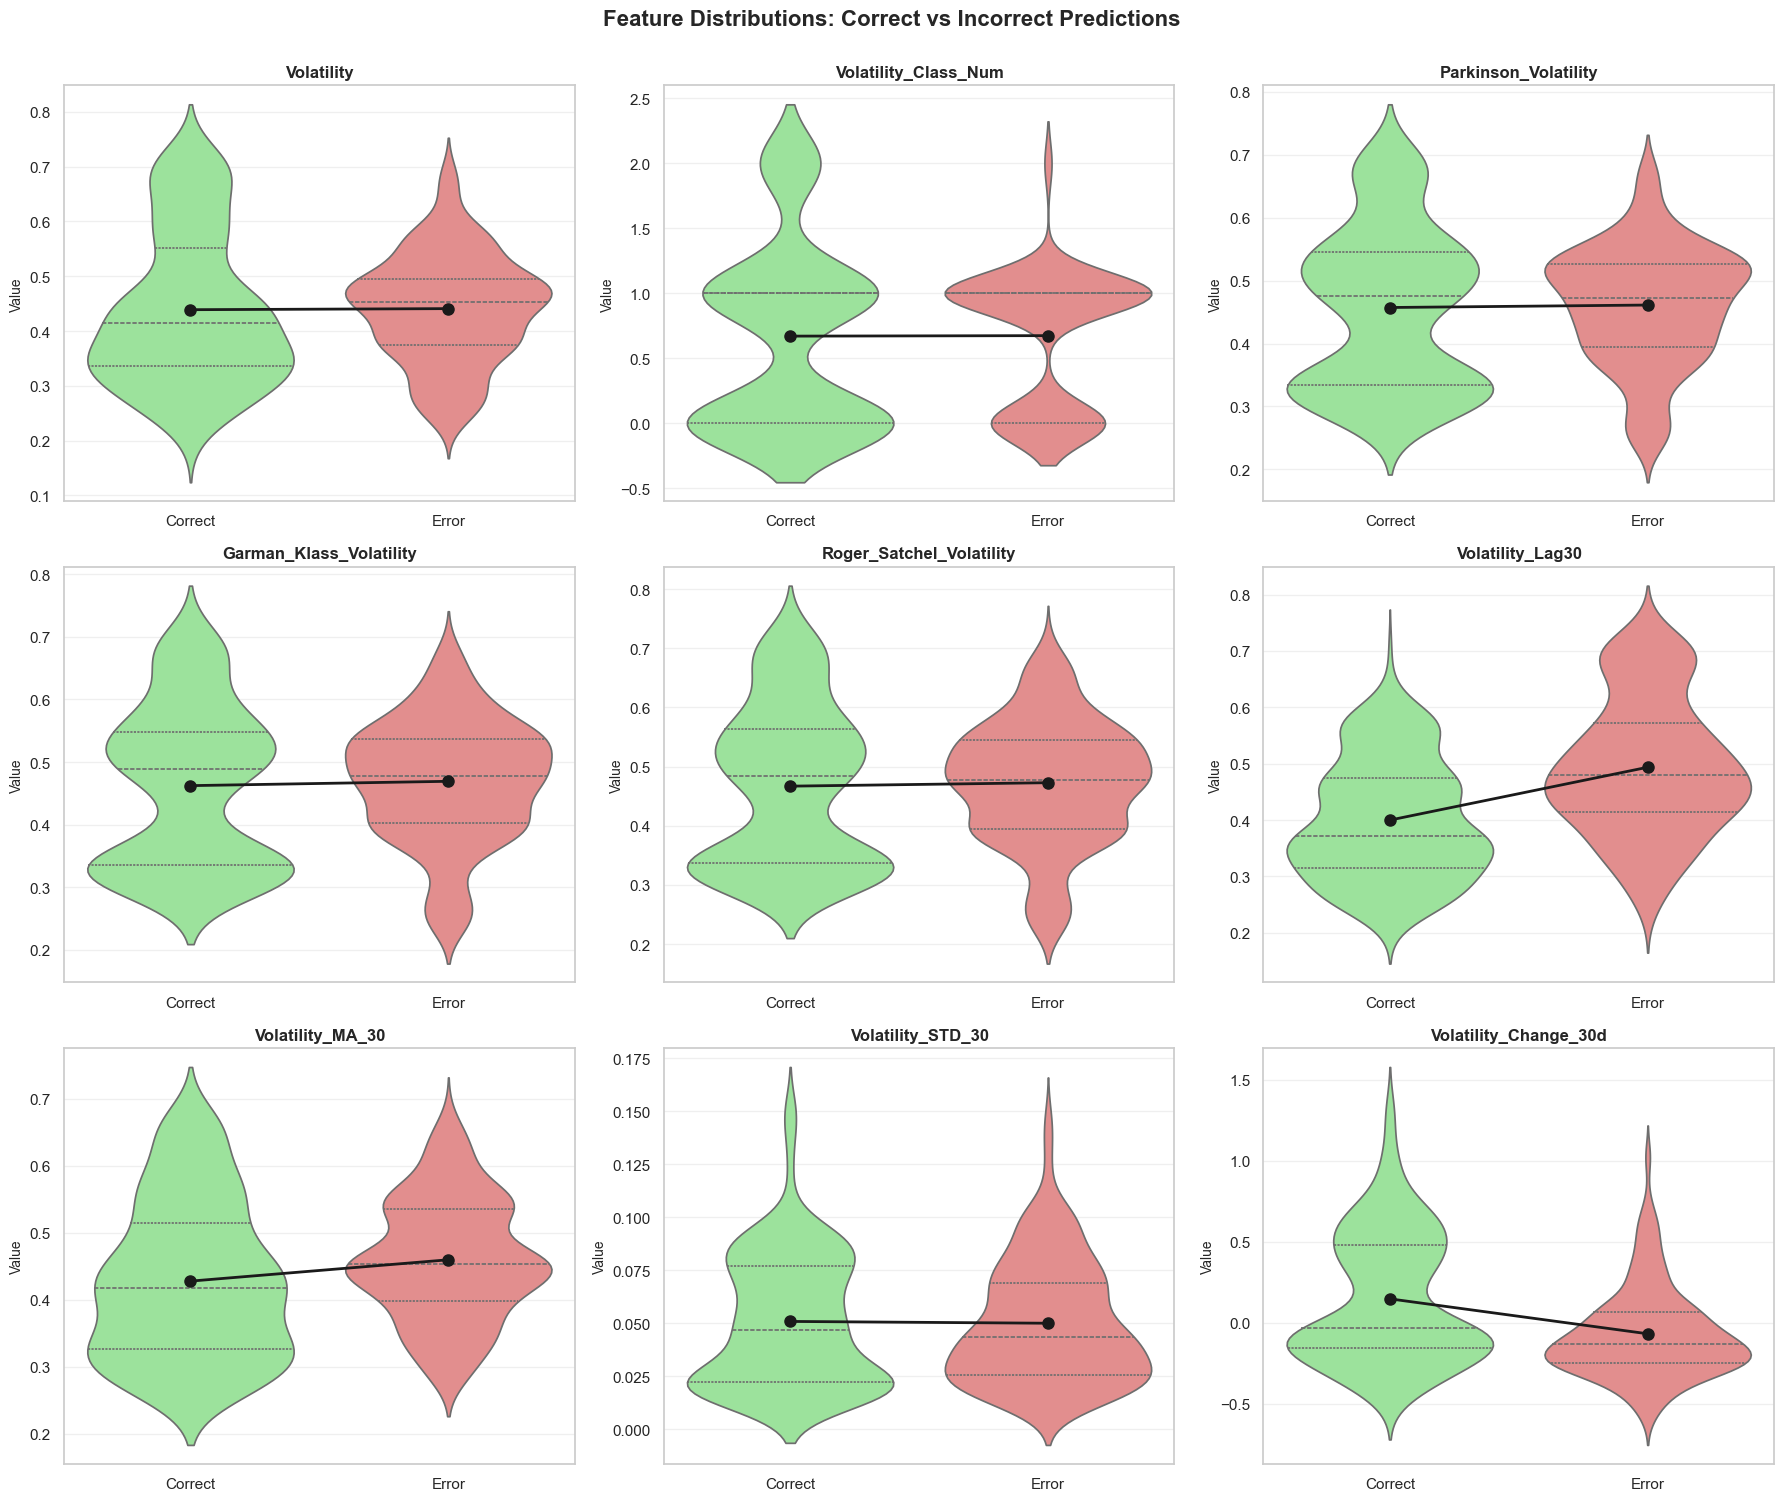

In [135]:
# Select key features for visualization
key_features = BEST_FEATURES

features_length = len(key_features)

# Prepare data
feature_comparison_data = []
for feature in key_features:
    correct_vals = X_test_best.loc[error_analysis_df["correct"], feature]
    error_vals = X_test_best.loc[error_analysis_df["error"], feature]

    for val, label in zip([correct_vals, error_vals], ["Correct", "Error"]):
        for v in val:
            feature_comparison_data.append(
                {"Feature": feature, "Value": v, "Prediction": label}
            )

feature_comp_df = pd.DataFrame(feature_comparison_data)

# Calculate optimal grid layout
n_cols = 3
n_rows = int(np.ceil(features_length / n_cols))

# Create violin plots with dynamic layout
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for idx, feature in enumerate(key_features):
    feature_data = feature_comp_df[feature_comp_df["Feature"] == feature]

    sns.violinplot(
        data=feature_data,
        x="Prediction",
        y="Value",
        hue="Prediction",
        palette={"Correct": "lightgreen", "Error": "lightcoral"},
        ax=axes[idx],
        inner="quartile",
        legend=False,
    )

    axes[idx].set_title(f"{feature}", fontsize=12, fontweight="bold")
    axes[idx].set_xlabel("")
    axes[idx].set_ylabel("Value", fontsize=10)
    axes[idx].grid(axis="y", alpha=0.3)

    # Add mean markers
    correct_mean = X_test_best.loc[error_analysis_df["correct"], feature].mean()
    error_mean = X_test_best.loc[error_analysis_df["error"], feature].mean()
    axes[idx].plot([0, 1], [correct_mean, error_mean], "ko-", linewidth=2, markersize=8)

# Hide unused subplots
for idx in range(features_length, len(axes)):
    axes[idx].set_visible(False)

plt.suptitle(
    "Feature Distributions: Correct vs Incorrect Predictions",
    fontsize=16,
    fontweight="bold",
    y=1.00,
)
plt.tight_layout()
plt.show()

In [136]:
# Statistical comparison
print("\nFeature Statistics: Correct vs Incorrect Predictions")
print("=" * 100)
print(
    f"{'Feature':<30} {'Correct Mean':<15} {'Error Mean':<15} {'Difference':<15} {'% Diff':<10}"
)
print("-" * 100)

for feature in key_features:
    correct_mean = X_test_best.loc[error_analysis_df["correct"], feature].mean()
    error_mean = X_test_best.loc[error_analysis_df["error"], feature].mean()
    diff = error_mean - correct_mean
    pct_diff = (diff / correct_mean * 100) if correct_mean != 0 else 0

    print(
        f"{feature:<30} {correct_mean:<15.4f} {error_mean:<15.4f} {diff:<15.4f} {pct_diff:<10.2f}%"
    )

print("=" * 100)


Feature Statistics: Correct vs Incorrect Predictions
Feature                        Correct Mean    Error Mean      Difference      % Diff    
----------------------------------------------------------------------------------------------------
Volatility                     0.4389          0.4409          0.0020          0.44      %
Volatility_Class_Num           0.6702          0.6739          0.0037          0.56      %
Parkinson_Volatility           0.4573          0.4612          0.0039          0.85      %
Garman_Klass_Volatility        0.4623          0.4693          0.0069          1.50      %
Roger_Satchel_Volatility       0.4669          0.4727          0.0058          1.25      %
Volatility_Lag30               0.3999          0.4937          0.0938          23.45     %
Volatility_MA_30               0.4279          0.4598          0.0319          7.45      %
Volatility_STD_30              0.0508          0.0500          -0.0009         -1.67     %
Volatility_Change_30d      

#### 7.7 Prediction Confidence Analysis

The relationship between model confidence and prediction accuracy

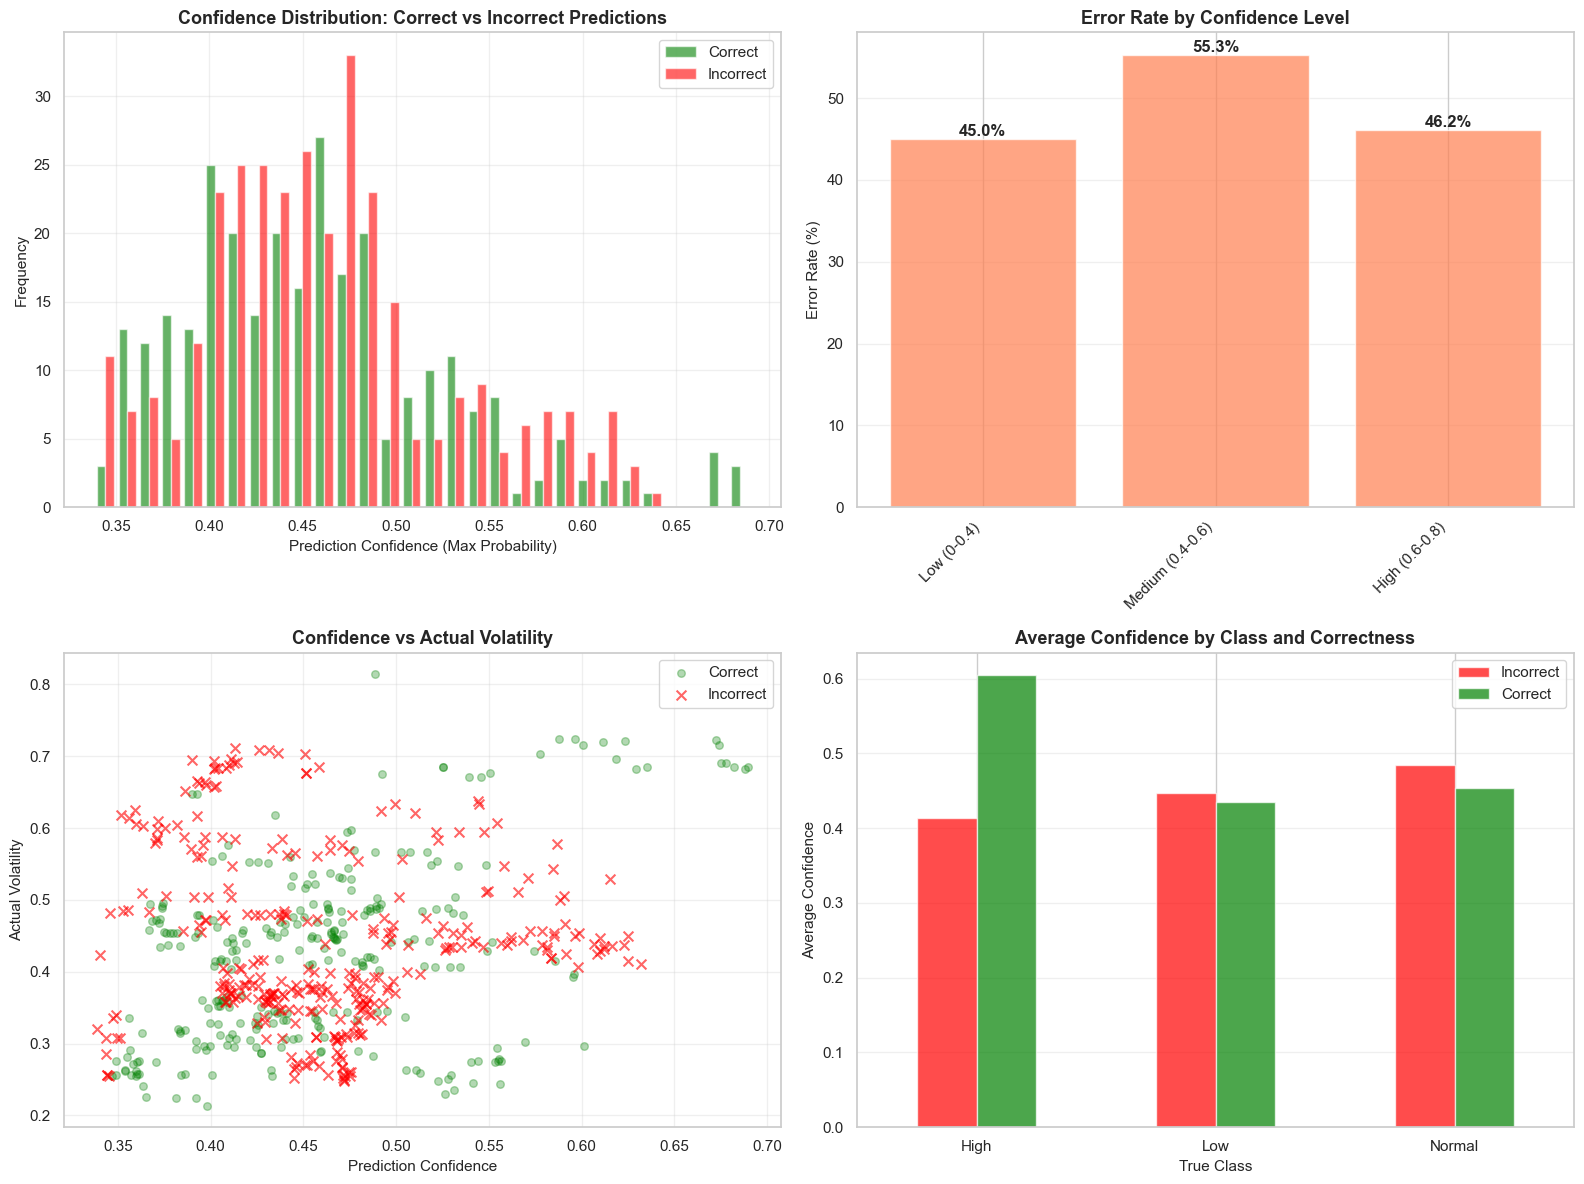

In [137]:
# Create confidence bins
error_analysis_df["confidence_bin"] = pd.cut(
    error_analysis_df["confidence"],
    bins=[0, 0.4, 0.6, 0.8, 1.0],
    labels=["Low (0-0.4)", "Medium (0.4-0.6)", "High (0.6-0.8)", "Very High (0.8-1.0)"],
)

# Create figure
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Confidence distribution for correct vs incorrect
axes[0, 0].hist(
    [
        error_analysis_df.loc[error_analysis_df["correct"], "confidence"],
        error_analysis_df.loc[error_analysis_df["error"], "confidence"],
    ],
    bins=30,
    label=["Correct", "Incorrect"],
    color=["green", "red"],
    alpha=0.6,
)
axes[0, 0].set_xlabel("Prediction Confidence (Max Probability)", fontsize=11)
axes[0, 0].set_ylabel("Frequency", fontsize=11)
axes[0, 0].set_title(
    "Confidence Distribution: Correct vs Incorrect Predictions",
    fontsize=13,
    fontweight="bold",
)
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Plot 2: Error rate by confidence bin
conf_error_analysis = (
    error_analysis_df.groupby("confidence_bin", observed=True)
    .agg({"error": ["sum", "count", "mean"]})
    .reset_index()
)
conf_error_analysis.columns = ["Confidence Bin", "Errors", "Total", "Error Rate"]
conf_error_analysis["Error Rate"] *= 100

bars = axes[0, 1].bar(
    range(len(conf_error_analysis)),
    conf_error_analysis["Error Rate"],
    color="coral",
    alpha=0.7,
)
axes[0, 1].set_xticks(range(len(conf_error_analysis)))
axes[0, 1].set_xticklabels(
    conf_error_analysis["Confidence Bin"], rotation=45, ha="right"
)
axes[0, 1].set_ylabel("Error Rate (%)", fontsize=11)
axes[0, 1].set_title("Error Rate by Confidence Level", fontsize=13, fontweight="bold")
axes[0, 1].grid(axis="y", alpha=0.3)

for bar, val in zip(bars, conf_error_analysis["Error Rate"]):
    axes[0, 1].text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{val:.1f}%",
        ha="center",
        va="bottom",
        fontweight="bold",
    )

# Plot 3: Scatter plot - confidence vs actual volatility colored by correctness
axes[1, 0].scatter(
    error_analysis_df.loc[error_analysis_df["correct"], "confidence"],
    error_analysis_df.loc[error_analysis_df["correct"], "actual_volatility"],
    c="green",
    alpha=0.3,
    s=30,
    label="Correct",
)
axes[1, 0].scatter(
    error_analysis_df.loc[error_analysis_df["error"], "confidence"],
    error_analysis_df.loc[error_analysis_df["error"], "actual_volatility"],
    c="red",
    alpha=0.6,
    s=50,
    marker="x",
    label="Incorrect",
)
axes[1, 0].set_xlabel("Prediction Confidence", fontsize=11)
axes[1, 0].set_ylabel("Actual Volatility", fontsize=11)
axes[1, 0].set_title("Confidence vs Actual Volatility", fontsize=13, fontweight="bold")
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Plot 4: Average confidence by true class and correctness
conf_by_class = (
    error_analysis_df.groupby(["true_class_name", "correct"])["confidence"]
    .mean()
    .unstack()
)
conf_by_class.plot(kind="bar", ax=axes[1, 1], color=["red", "green"], alpha=0.7)
axes[1, 1].set_ylabel("Average Confidence", fontsize=11)
axes[1, 1].set_xlabel("True Class", fontsize=11)
axes[1, 1].set_title(
    "Average Confidence by Class and Correctness", fontsize=13, fontweight="bold"
)
axes[1, 1].legend(["Incorrect", "Correct"])
axes[1, 1].set_xticklabels(conf_by_class.index, rotation=0)
axes[1, 1].grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

In [138]:
# Confidence analysis summary
print("\nConfidence Statistics:")
print("=" * 80)
print(
    f"Average confidence (correct predictions): {error_analysis_df.loc[error_analysis_df['correct'], 'confidence'].mean():.4f}"
)
print(
    f"Average confidence (incorrect predictions): {error_analysis_df.loc[error_analysis_df['error'], 'confidence'].mean():.4f}"
)
print("\nError Rate by Confidence Bin:")
print(conf_error_analysis.to_string(index=False))
print("=" * 80)


Confidence Statistics:
Average confidence (correct predictions): 0.4584
Average confidence (incorrect predictions): 0.4616

Error Rate by Confidence Bin:
  Confidence Bin  Errors  Total  Error Rate
     Low (0-0.4)      49    109   44.954128
Medium (0.4-0.6)     261    472   55.296610
  High (0.6-0.8)      12     26   46.153846
